In [ ]:
import pandas as pd
import numpy as np

# If running on Google Colab, uncomment and use this upload cell:
from google.colab import files
uploaded = files.upload()   # ⬅️ Upload your PredictorData2022.xlsx here

Saving PredictorData2022.xlsx to PredictorData2022.xlsx


## Data process: basic statistics & information & calculate potential beneficial variables

In [ ]:
# ==============================================================
# MFIN705 Term Project: Data Import, Cleaning, and Derived Variables
# ==============================================================

import pandas as pd
import numpy as np

# ---------- 1️⃣ LOAD AND SET FREQUENCY ----------
# You can change "Monthly" to "Quarterly" or "Annual" anytime
freq = "Monthly"   # options: "Monthly", "Quarterly", "Annual"
file_path = "PredictorData2022.xlsx"

df = pd.read_excel(file_path, sheet_name=freq)

# ---------- 2️⃣ CONVERT DATE COLUMN ----------
if "yyyymm" in df.columns:
    df["date"] = pd.to_datetime(df["yyyymm"].astype(str), format="%Y%m")

    # ✅ Shift to month-end (e.g., 199001 → 1990-01-31)
    df["date"] = df["date"] + pd.offsets.MonthEnd(0)
elif "yyyyq" in df.columns:
    # handle quarterly format like 19901 -> 1990Q1
    df["date"] = pd.PeriodIndex(df["yyyyq"].astype(str), freq='Q').to_timestamp(how='end')
elif "year" in df.columns:
    df["date"] = pd.to_datetime(df["year"].astype(str) + "-12-31")
else:
    raise ValueError("No recognizable date column (yyyymm, yyyyq, or year) found.")

df.set_index("date", inplace=True)

# ---------- 3️⃣ BASIC INSPECTION ----------
print("=== Dataset Head ===")
display(df.head())

print("\n=== Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isna().sum())

print("\n=== Summary Statistics ===")
display(df.describe().T)

# ---------- 4️⃣ RECONSTRUCT CORE RATIO VARIABLES ----------
# These columns follow Welch & Goyal (2008) definitions

# d/p : log(dividends) - log(price)
df["d/p"] = np.log(df["D12"]) - np.log(df["Index"])

# d/y : log(dividends) - log(lagged price)
df["d/y"] = np.log(df["D12"]) - np.log(df["Index"].shift(1))

# e/p : log(earnings) - log(price)
df["e/p"] = np.log(df["E12"]) - np.log(df["Index"])

# d/e : log(dividends) - log(earnings)
df["d/e"] = np.log(df["D12"]) - np.log(df["E12"])

# ---------- 5️⃣ BUILD DERIVED VARIABLES (YELLOW BOX BELOW) ----------
# Excess return
df["excess_ret"] = df["CRSP_SPvw"] - df["Rfree"]

# Term Spread
df["term_spread"] = df["lty"] - df["tbl"]

# Default Spread
df["def_spread"] = df["BAA"] - df["AAA"]

# Real T-bill Rate
df["real_tbill"] = df["Rfree"] - df["infl"]     # df["real_tbill"] = df["tbl"] - df["infl"]

# Dividend Yield Change (Δ d/y)
df["dy_change"] = df["d/y"].diff()

# ---------- 7️⃣ FINAL CHECK ----------
print("\n=== Final Dataset Columns ===")
print(df.columns.tolist())

print("\n=== Final Data Sample ===")
display(df.tail(5))

print("\n=== Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isna().sum())

print("\n=== Summary Statistics ===")
display(df.describe().T)


=== Dataset Head ===


yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  \
date                                                                            
1871-01-31  187101   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN       NaN   
1871-02-28  187102   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   
1871-03-31  187103   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   
1871-04-30  187104   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   
1871-05-31  187105   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   

            infl  ltr  corpr  svar  csp  CRSP_SPvw  
date                                                
1871-01-31   NaN  NaN    NaN   NaN  NaN        NaN  
1871-02-28   NaN  NaN    NaN   NaN  NaN        NaN  
1871-03-31   NaN  NaN    NaN   NaN  NaN        NaN  
1871-04-30   NaN  NaN    NaN   NaN  NaN        NaN  
1871-05-31   NaN  NaN    NaN   NaN  NaN        NaN


=== Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 1871-01-31 to 2022-12-31
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyymm     1824 non-null   int64  
 1   Index      1824 non-null   float64
 2   D12        1824 non-null   float64
 3   E12        1824 non-null   float64
 4   b/m        1222 non-null   float64
 5   tbl        1236 non-null   float64
 6   AAA        1248 non-null   float64
 7   BAA        1248 non-null   float64
 8   lty        1248 non-null   float64
 9   ntis       1153 non-null   float64
 10  Rfree      1823 non-null   float64
 11  infl       1319 non-null   float64
 12  ltr        1164 non-null   float64
 13  corpr      1164 non-null   float64
 14  svar       1655 non-null   float64
 15  csp        788 non-null    float64
 16  CRSP_SPvw  1164 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 256.5 KB

=== Missing Values ===
yyyymm          0
Index 

count           mean          std            min            25%  \
yyyymm     1824.0  194656.500000  4388.971726  187101.000000  190878.750000   
Index      1824.0     358.525828   764.190480       2.730000       7.920000   
D12        1824.0       7.282284    13.216269       0.180000       0.423300   
E12        1824.0      17.059570    33.406115       0.160000       0.568950   
b/m        1222.0       0.550079     0.261466       0.120510       0.328985   
tbl        1236.0       0.033287     0.029734       0.000100       0.006350   
AAA        1248.0       0.056501     0.026715       0.021400       0.036100   
BAA        1248.0       0.068216     0.028346       0.029400       0.048175   
lty        1248.0       0.049241     0.027063       0.006200       0.028100   
ntis       1153.0       0.015959     0.025725      -0.055954       0.003558   
Rfree      1823.0       0.002924     0.002143      -0.000600       0.001300   
infl       1319.0       0.002610     0.006433      -0.031579       0.000000   
ltr        1164.0       0.004496     0.024830      -0.112400      -0.007525   
corpr      1164.0       0.004943     0.022118      -0.094900      -0.004600   
svar       1655.0       0.002553     0.005149       0.000000       0.000723   
csp         788.0       0.000364     0.002375      -0.004166      -0.001594   
CRSP_SPvw  1164.0       0.009410     0.054172      -0.287461      -0.016868   

                     50%            75%            max  
yyyymm     194656.500000  198434.250000  202212.000000  
Index          17.835000     170.990000    4766.180000  
D12             0.911650       7.540833      66.922828  
E12             1.513665      14.861675     197.910000  
b/m             0.527069       0.728375       2.028478  
tbl             0.029650       0.050300       0.163000  
AAA             0.049150       0.073000       0.154900  
BAA             0.062400       0.083500       0.171800  
lty             0.041700       0.064100       0.148200  
ntis            0.015946       0.027018       0.177040  
Rfree           0.002900       0.004000       0.013500  
infl            0.002404       0.005473       0.058824  
ltr             0.003000       0.015925       0.152300  
corpr           0.004000       0.013700       0.156000  
svar            0.001241       0.002308       0.073153  
csp            -0.000284       0.002296       0.007688  
CRSP_SPvw       0.013000       0.038778       0.414312


=== Final Dataset Columns ===
['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw', 'd/p', 'd/y', 'e/p', 'd/e', 'excess_ret', 'term_spread', 'def_spread', 'real_tbill', 'dy_change']

=== Final Data Sample ===


yyyymm    Index        D12         E12       b/m     tbl     AAA  \
date                                                                           
2022-08-31  202208  3955.00  64.885405  188.806667  0.227429  0.0263  0.0407   
2022-09-30  202209  3585.62  65.318305  187.080000  0.249478  0.0313  0.0459   
2022-10-31  202210  3871.98  65.853146  182.303333  0.218935  0.0372  0.0510   
2022-11-30  202211  4080.11  66.387987  177.526667  0.207182  0.0415  0.0490   
2022-12-31  202212  3839.50  66.922828  172.750000  0.216199  0.0425  0.0443   

               BAA     lty      ntis  ...  CRSP_SPvw       d/p       d/y  \
date                                  ...                                  
2022-08-31  0.0515  0.0290 -0.009732  ...  -0.040305 -4.110113 -4.153480   
2022-09-30  0.0569  0.0352 -0.011292  ...  -0.091495 -4.005414 -4.103464   
2022-10-31  0.0626  0.0398 -0.015252  ...   0.080248 -4.074094 -3.997259   
2022-11-30  0.0607  0.0389 -0.017011  ...   0.054166 -4.118363 -4.066005   
2022-12-31  0.0559  0.0362 -0.021246  ...  -0.058784 -4.049557 -4.110339   

                 e/p       d/e  excess_ret  term_spread  def_spread  \
date                                                                  
2022-08-31 -3.042012 -1.068101   -0.042205       0.0027      0.0108   
2022-09-30 -2.953150 -1.052264   -0.093395       0.0039      0.0110   
2022-10-31 -3.055849 -1.018245    0.077948       0.0026      0.0116   
2022-11-30 -3.134758 -0.983605    0.051266      -0.0026      0.0117   
2022-12-31 -3.101252 -0.948305   -0.062084      -0.0063      0.0116   

            real_tbill  dy_change  
date                               
2022-08-31    0.002254  -0.080507  
2022-09-30   -0.000251   0.050017  
2022-10-31   -0.001756   0.106204  
2022-11-30    0.003910  -0.068746  
2022-12-31    0.006370  -0.044334  

[5 rows x 26 columns]


=== Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 1871-01-31 to 2022-12-31
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yyyymm       1824 non-null   int64  
 1   Index        1824 non-null   float64
 2   D12          1824 non-null   float64
 3   E12          1824 non-null   float64
 4   b/m          1222 non-null   float64
 5   tbl          1236 non-null   float64
 6   AAA          1248 non-null   float64
 7   BAA          1248 non-null   float64
 8   lty          1248 non-null   float64
 9   ntis         1153 non-null   float64
 10  Rfree        1823 non-null   float64
 11  infl         1319 non-null   float64
 12  ltr          1164 non-null   float64
 13  corpr        1164 non-null   float64
 14  svar         1655 non-null   float64
 15  csp          788 non-null    float64
 16  CRSP_SPvw    1164 non-null   float64
 17  d/p          1824 non-null   float64
 18  d/y          182

count           mean          std            min            25%  \
yyyymm       1824.0  194656.500000  4388.971726  187101.000000  190878.750000   
Index        1824.0     358.525828   764.190480       2.730000       7.920000   
D12          1824.0       7.282284    13.216269       0.180000       0.423300   
E12          1824.0      17.059570    33.406115       0.160000       0.568950   
b/m          1222.0       0.550079     0.261466       0.120510       0.328985   
tbl          1236.0       0.033287     0.029734       0.000100       0.006350   
AAA          1248.0       0.056501     0.026715       0.021400       0.036100   
BAA          1248.0       0.068216     0.028346       0.029400       0.048175   
lty          1248.0       0.049241     0.027063       0.006200       0.028100   
ntis         1153.0       0.015959     0.025725      -0.055954       0.003558   
Rfree        1823.0       0.002924     0.002143      -0.000600       0.001300   
infl         1319.0       0.002610     0.006433      -0.031579       0.000000   
ltr          1164.0       0.004496     0.024830      -0.112400      -0.007525   
corpr        1164.0       0.004943     0.022118      -0.094900      -0.004600   
svar         1655.0       0.002553     0.005149       0.000000       0.000723   
csp           788.0       0.000364     0.002375      -0.004166      -0.001594   
CRSP_SPvw    1164.0       0.009410     0.054172      -0.287461      -0.016868   
d/p          1824.0      -3.246278     0.455575      -4.523640      -3.488928   
d/y          1823.0      -3.242792     0.452791      -4.530894      -3.484913   
e/p          1824.0      -2.690391     0.383204      -4.836478      -2.911840   
d/e          1824.0      -0.555887     0.316824      -1.244209      -0.752329   
excess_ret   1164.0       0.006748     0.054271      -0.287761      -0.019785   
term_spread  1236.0       0.015972     0.012869      -0.036500       0.006775   
def_spread   1248.0       0.011715     0.006883       0.003200       0.007100   
real_tbill   1319.0       0.000116     0.006451      -0.058524      -0.002500   
dy_change    1822.0      -0.000698     0.048492      -0.363758      -0.027244   

                       50%            75%            max  
yyyymm       194656.500000  198434.250000  202212.000000  
Index            17.835000     170.990000    4766.180000  
D12               0.911650       7.540833      66.922828  
E12               1.513665      14.861675     197.910000  
b/m               0.527069       0.728375       2.028478  
tbl               0.029650       0.050300       0.163000  
AAA               0.049150       0.073000       0.154900  
BAA               0.062400       0.083500       0.171800  
lty               0.041700       0.064100       0.148200  
ntis              0.015946       0.027018       0.177040  
Rfree             0.002900       0.004000       0.013500  
infl              0.002404       0.005473       0.058824  
ltr               0.003000       0.015925       0.152300  
corpr             0.004000       0.013700       0.156000  
svar              0.001241       0.002308       0.073153  
csp              -0.000284       0.002296       0.007688  
CRSP_SPvw         0.013000       0.038778       0.414312  
d/p              -3.163466      -2.926912      -1.873246  
d/y              -3.159039      -2.922345      -1.912904  
e/p              -2.701838      -2.443114      -1.670063  
d/e              -0.559391      -0.388745       1.379530  
excess_ret        0.010078       0.035775       0.413312  
term_spread       0.016000       0.025225       0.045500  
def_spread        0.009400       0.014200       0.056400  
real_tbill        0.000388       0.002900       0.036304  
dy_change        -0.002682       0.023713       0.340265

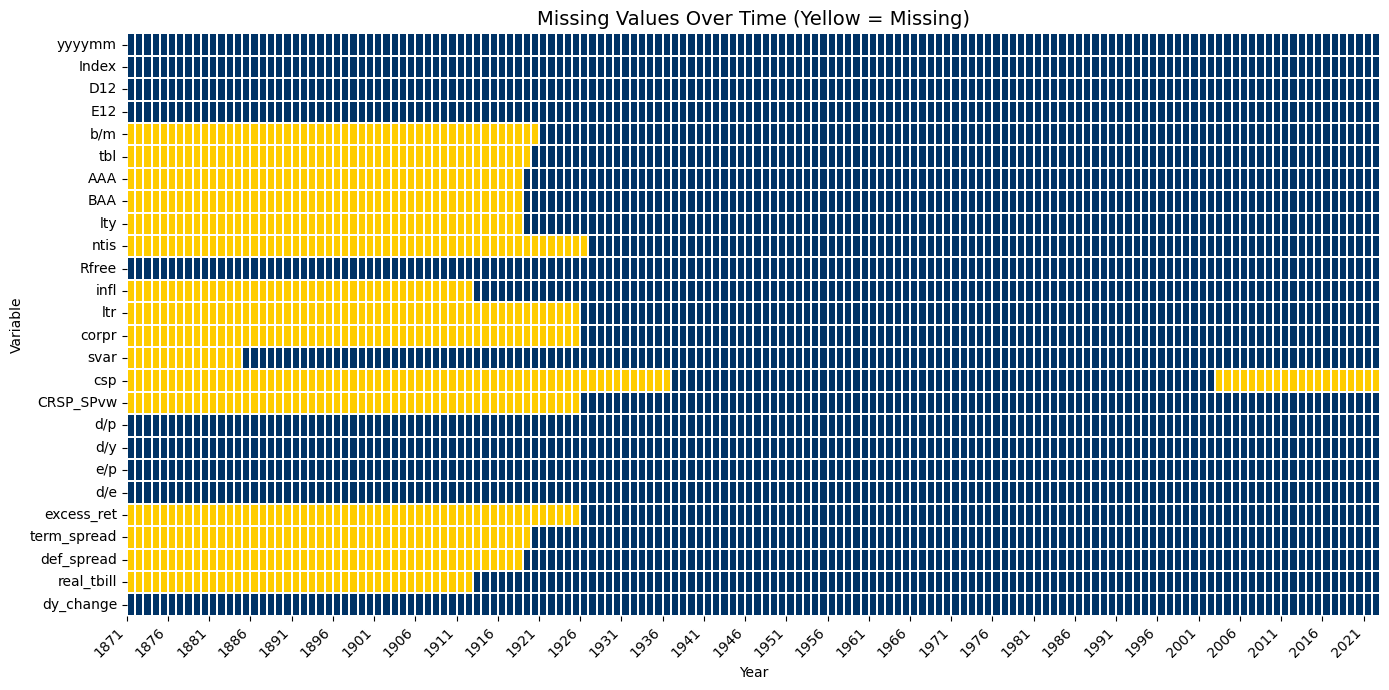

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================================================
# 7️⃣ Visualize Missing Values Over Time (Clean Year Axis)
# ==============================================================

# Resample to yearly frequency for clarity
missing_yearly = df.isna().astype(int).resample("YE").mean()

# Extract year as integer for the x-axis labels
missing_yearly.index = missing_yearly.index.year

plt.figure(figsize=(14, 7))
ax = sns.heatmap(
    missing_yearly.T,
    cmap=["#003366", "#ffcc00"],  # Blue = available, Yellow = missing
    cbar=False,
    linewidths=0.2,
)

# Formatting
ax.set_title("Missing Values Over Time (Yellow = Missing)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Variable")

# Set yearly ticks (every 5 years for readability)
step = 5
years = missing_yearly.index[::step]
ax.set_xticks(range(0, len(missing_yearly.index), step))
ax.set_xticklabels(years, rotation=45, ha="right")

plt.tight_layout()
plt.show()


## Drop Periods without excess return

In [ ]:
# ---------- 6️⃣ DROP PERIODS WITHOUT EXCESS RETURN ----------
# We can only model when dependent variable is available
initial_rows = len(df)
df = df.dropna(subset=["excess_ret"])
dropped_rows = initial_rows - len(df)

print(f"\nDropped {dropped_rows} rows (no valid excess return). "
      f"Final sample starts at {df.index.min().strftime('%Y-%m')} "
      f"and ends at {df.index.max().strftime('%Y-%m')}.")
print("\n=== Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isna().sum())

print("\n=== Summary Statistics ===")
display(df.describe().T)



Dropped 660 rows (no valid excess return). Final sample starts at 1926-01 and ends at 2022-12.

=== Info ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1164 entries, 1926-01-31 to 2022-12-31
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yyyymm       1164 non-null   int64  
 1   Index        1164 non-null   float64
 2   D12          1164 non-null   float64
 3   E12          1164 non-null   float64
 4   b/m          1164 non-null   float64
 5   tbl          1164 non-null   float64
 6   AAA          1164 non-null   float64
 7   BAA          1164 non-null   float64
 8   lty          1164 non-null   float64
 9   ntis         1153 non-null   float64
 10  Rfree        1164 non-null   float64
 11  infl         1164 non-null   float64
 12  ltr          1164 non-null   float64
 13  corpr        1164 non-null   float64
 14  svar         1164 non-null   float64
 15  csp          788 non-null    float64
 16  CRSP

count           mean          std            min            25%  \
yyyymm       1164.0  197406.500000  2801.205654  192601.000000  195003.750000   
Index        1164.0     558.088480   897.351106       4.430000      22.857500   
D12          1164.0      11.216422    15.197851       0.440000       1.177500   
E12          1164.0      26.429630    38.812192       0.410000       2.380000   
b/m          1164.0       0.550862     0.267303       0.120510       0.324424   
tbl          1164.0       0.032935     0.030492       0.000100       0.003800   
AAA          1164.0       0.056694     0.027623       0.021400       0.034875   
BAA          1164.0       0.067858     0.029255       0.029400       0.047400   
lty          1164.0       0.049524     0.027967       0.006200       0.027400   
ntis         1153.0       0.015959     0.025725      -0.055954       0.003558   
Rfree        1164.0       0.002663     0.002510      -0.000600       0.000300   
infl         1164.0       0.002429     0.005283      -0.020548       0.000000   
ltr          1164.0       0.004496     0.024830      -0.112400      -0.007525   
corpr        1164.0       0.004943     0.022118      -0.094900      -0.004600   
svar         1164.0       0.002902     0.005971       0.000072       0.000692   
csp           788.0       0.000364     0.002375      -0.004166      -0.001594   
CRSP_SPvw    1164.0       0.009410     0.054172      -0.287461      -0.016868   
d/p          1164.0      -3.405065     0.476415      -4.523640      -3.844694   
d/y          1164.0      -3.400142     0.474426      -4.530894      -3.834631   
e/p          1164.0      -2.757226     0.420805      -4.836478      -2.984775   
d/e          1164.0      -0.647839     0.326177      -1.244209      -0.869382   
excess_ret   1164.0       0.006748     0.054271      -0.287761      -0.019785   
term_spread  1164.0       0.016590     0.012931      -0.036500       0.007600   
def_spread   1164.0       0.011164     0.006747       0.003200       0.007000   
real_tbill   1164.0       0.000233     0.005280      -0.058524      -0.002032   
dy_change    1164.0      -0.000939     0.054835      -0.363758      -0.031123   

                       50%            75%            max  
yyyymm       197406.500000  199809.250000  202212.000000  
Index            98.945000     914.982500    4766.180000  
D12               3.515000      15.736167      66.922828  
E12               7.893330      34.339167     197.910000  
b/m               0.527069       0.736653       2.028478  
tbl               0.028350       0.050500       0.163000  
AAA               0.046800       0.074525       0.154900  
BAA               0.060250       0.083900       0.171800  
lty               0.040700       0.067025       0.148200  
ntis              0.015946       0.027018       0.177040  
Rfree             0.002200       0.004200       0.013500  
infl              0.002413       0.005098       0.058824  
ltr               0.003000       0.015925       0.152300  
corpr             0.004000       0.013700       0.156000  
svar              0.001266       0.002490       0.073153  
csp              -0.000284       0.002296       0.007688  
CRSP_SPvw         0.013000       0.038778       0.414312  
d/p              -3.371427      -3.038245      -1.873246  
d/y              -3.362590      -3.031557      -1.912904  
e/p              -2.808545      -2.473394      -1.774952  
d/e              -0.639157      -0.504060       1.379530  
excess_ret        0.010078       0.035775       0.413312  
term_spread       0.016900       0.025600       0.045500  
def_spread        0.009100       0.012925       0.056400  
real_tbill        0.000348       0.002701       0.022848  
dy_change        -0.004490       0.025382       0.340265

##  Visualize Missing Values Over Time

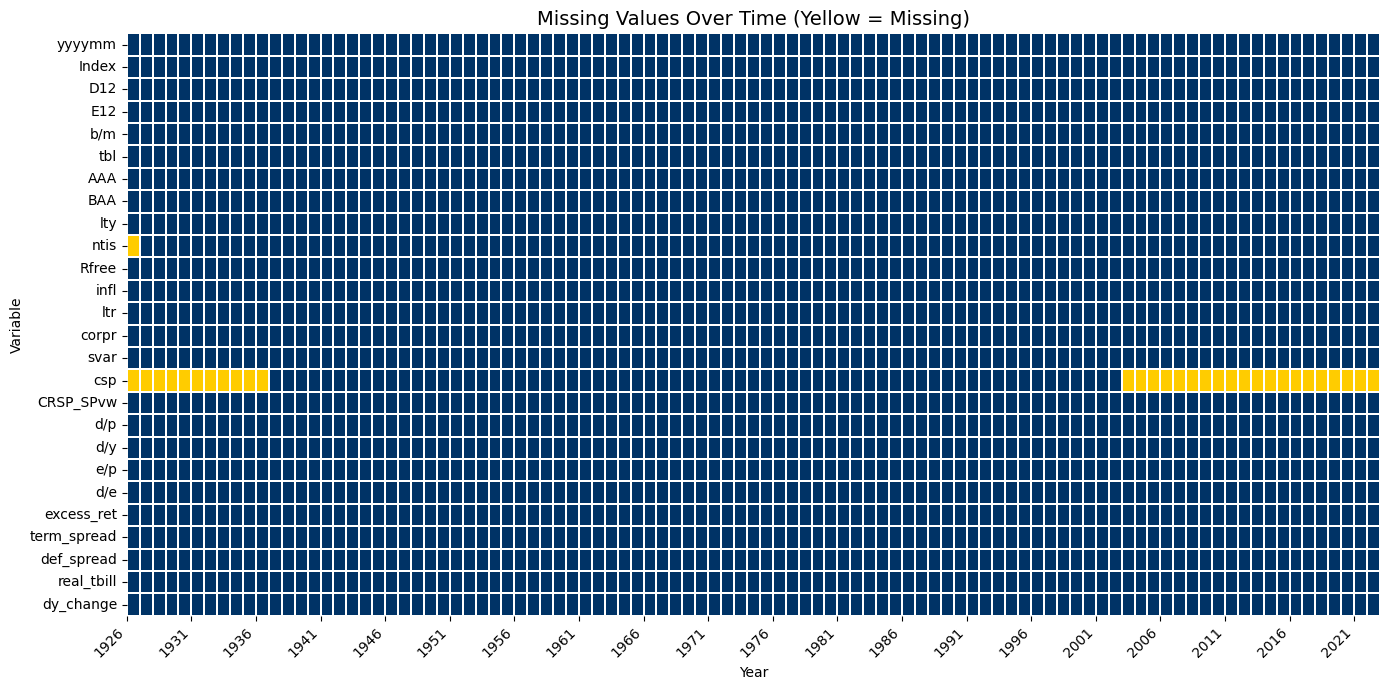

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================================================
# 7️⃣ Visualize Missing Values Over Time (Clean Year Axis)
# ==============================================================

# Resample to yearly frequency for clarity
missing_yearly = df.isna().astype(int).resample("YE").mean()

# Extract year as integer for the x-axis labels
missing_yearly.index = missing_yearly.index.year

plt.figure(figsize=(14, 7))
ax = sns.heatmap(
    missing_yearly.T,
    cmap=["#003366", "#ffcc00"],  # Blue = available, Yellow = missing
    cbar=False,
    linewidths=0.2,
)

# Formatting
ax.set_title("Missing Values Over Time (Yellow = Missing)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Variable")

# Set yearly ticks (every 5 years for readability)
step = 5
years = missing_yearly.index[::step]
ax.set_xticks(range(0, len(missing_yearly.index), step))
ax.set_xticklabels(years, rotation=45, ha="right")

plt.tight_layout()
plt.show()


## Create visualization DataFrame (no missing values)

Visualization sample period: 1937-05-31 → 2002-12-31
Remaining observations: 788


<Figure size 1600x1200 with 0 Axes>

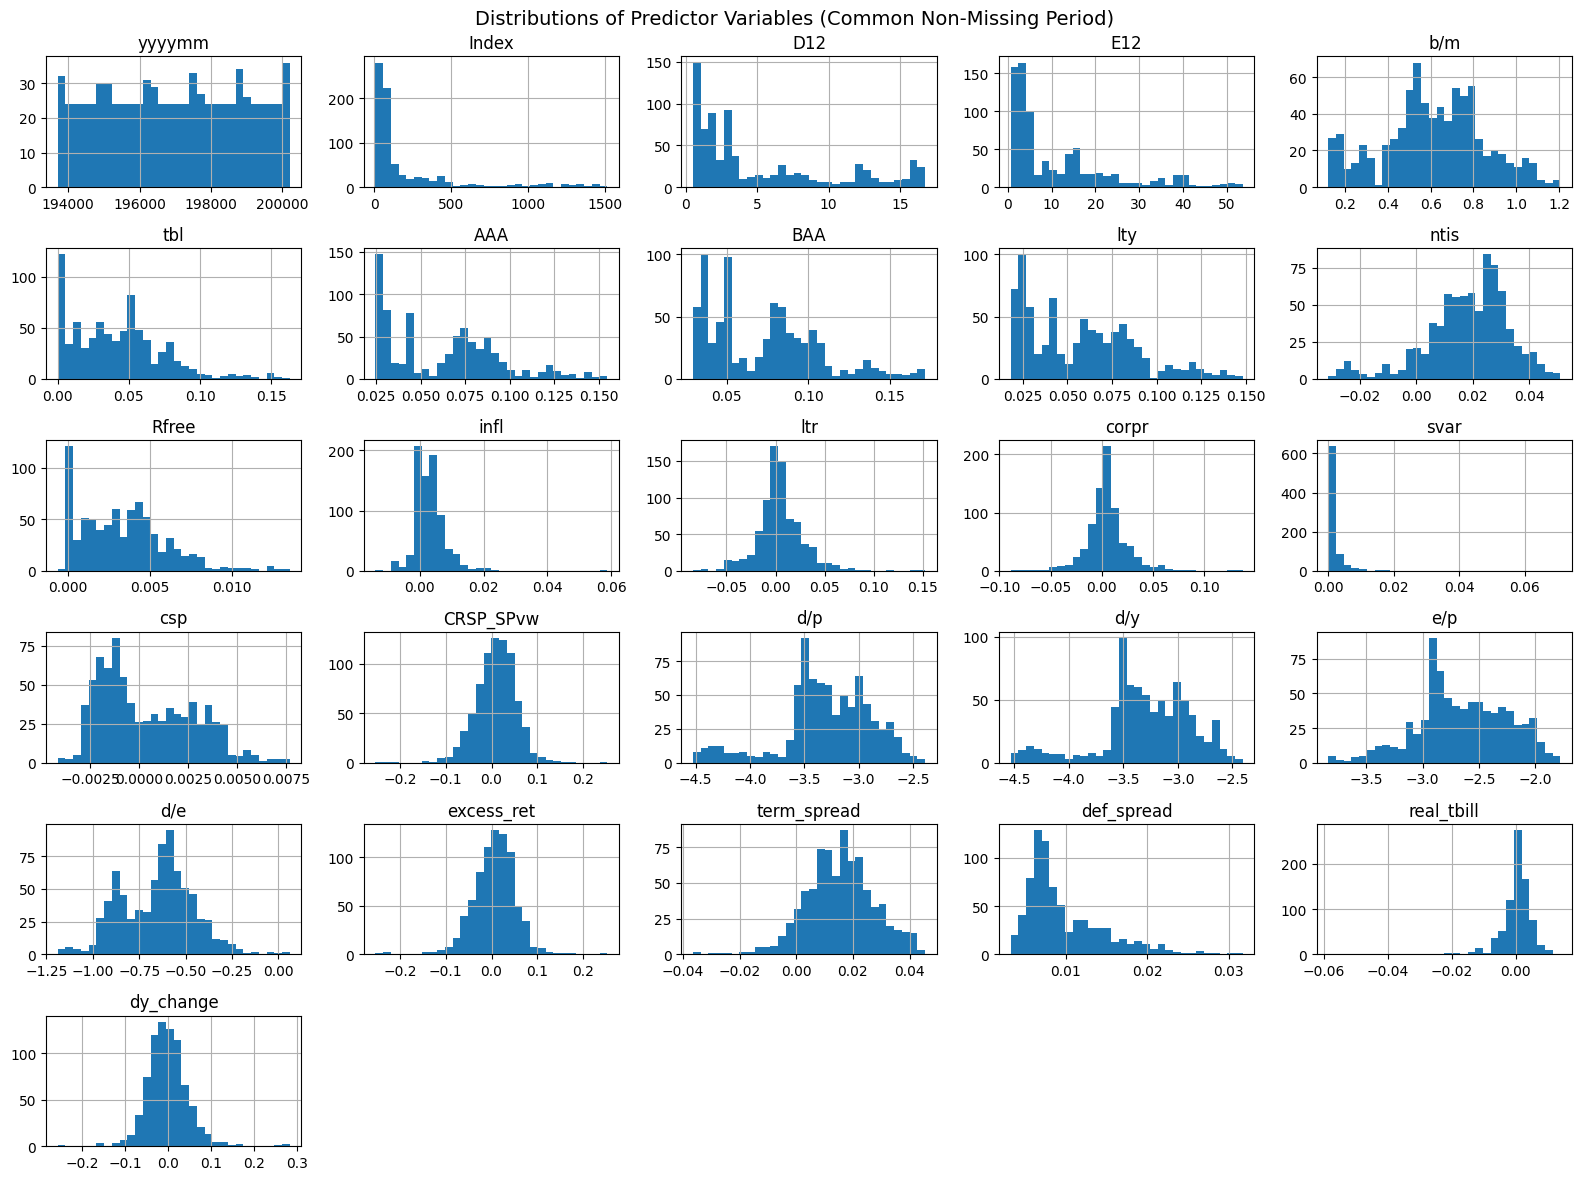

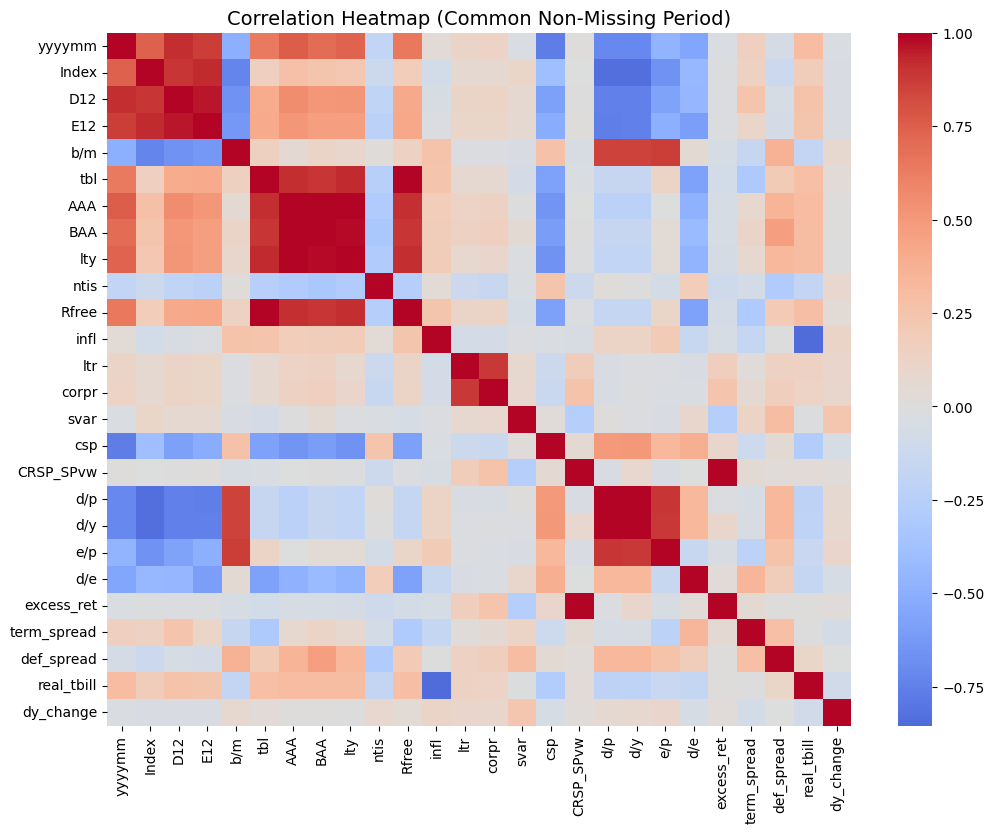

=== Correlation of CSP with Other Variables ===


Correlation
csp             1.000000
d/y             0.501068
d/p             0.496011
d/e             0.389109
e/p             0.328057
b/m             0.273217
ntis            0.248873
excess_ret      0.095203
CRSP_SPvw       0.062316
def_spread      0.054882
svar            0.028631
infl           -0.027408
dy_change      -0.044415
term_spread    -0.113817
ltr            -0.116728
corpr          -0.130588
real_tbill     -0.287887
Index          -0.394410
E12            -0.520702
tbl            -0.583011
Rfree          -0.587353
D12            -0.591115
BAA            -0.601867
AAA            -0.650444
lty            -0.657265
yyyymm         -0.761538

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# Create visualization DataFrame (no missing values)
# ==============================================================

df_viz = df.copy()

# Drop all rows where any variable is missing — ensures common sample period
df_viz = df_viz.dropna(subset=df_viz.columns, how='any')

print(f"Visualization sample period: {df_viz.index[0].date()} → {df_viz.index[-1].date()}")
print(f"Remaining observations: {len(df_viz)}")

# ==============================================================
# 1️⃣ Histogram of distributions
# ==============================================================

num_cols = df_viz.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 12))
df_viz[num_cols].hist(bins=30, figsize=(16, 12), layout=(6, 5))
plt.suptitle("Distributions of Predictor Variables (Common Non-Missing Period)", fontsize=14)
plt.tight_layout()
plt.show()

# ==============================================================
# 2️⃣ Correlation Heatmap
# ==============================================================

plt.figure(figsize=(12, 9))
corr = df_viz[num_cols].corr()

# --- Plot the heatmap ---
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Common Non-Missing Period)", fontsize=14)
plt.show()

# ==============================================================
# 🔍 Correlation of CSP with all other variables
# ==============================================================

if "csp" in corr.columns:
    csp_corr = corr["csp"].sort_values(ascending=False)
    print("=== Correlation of CSP with Other Variables ===")
    display(csp_corr.to_frame("Correlation"))
else:
    print("⚠️ Variable 'csp' not found in the dataset (likely dropped or missing).")



## Drop csp and have final clean data

In [ ]:
# ==============================================================
# ✅ Drop csp and have final clean data
# ==============================================================

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 1️⃣ Drop 'csp' and rows with any missing values
df_clean = df.drop(columns=["csp"], errors="ignore").dropna().copy()

# 2️⃣ Print resulting time horizon and sample size
print(f"Cleaned dataset date range: {df_clean.index[0].date()} → {df_clean.index[-1].date()}")
print(f"Remaining observations: {len(df_clean):,}")
print("Columns:", df_clean.columns)

Cleaned dataset date range: 1926-12-31 → 2022-12-31
Remaining observations: 1,153
Columns: Index(['yyyymm', 'Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty',
       'ntis', 'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'CRSP_SPvw', 'd/p',
       'd/y', 'e/p', 'd/e', 'excess_ret', 'term_spread', 'def_spread',
       'real_tbill', 'dy_change'],
      dtype='object')


## Prepare Lagged Predictor Set

In [ ]:
# =============================================================================
# FINAL STEP: LAGGING & EXPORTING
# =============================================================================
import pandas as pd

# 1. Define the COMPLETE list of predictors to lag
predictors_to_lag = [
    # Valuation Ratios
    "d/p", "d/y", "e/p", "b/m",

    # Spreads & Rates (Derived)
    "def_spread", "term_spread", "real_tbill", "dy_change",

    # Macro / Volatility / Issuance
    "ntis", "svar", "infl", "Rfree",

    # Raw Yields & Bond Returns
    "tbl", "AAA", "BAA", "lty", "ltr", "corpr"
]

# 2. Create the Lagged DataFrame
df_lag = pd.DataFrame()

# --- A. Identifiers (Date & yyyymm) ---
# Ensure we keep the yyyymm column.
# If it's in the index, we extract it. If it's a column, we copy it.
if 'yyyymm' in df.columns:
    df_lag['yyyymm'] = df['yyyymm']
else:
    # If df.index is DateTime, create yyyymm from it
    df_lag['yyyymm'] = df.index.strftime('%Y%m').astype(int)

# --- B. The Target (Do NOT Shift) ---
df_lag["excess_ret"] = df["excess_ret"]

# --- C. Portfolio Weighting Var (Do NOT Shift) ---
df_lag["svar_realized"] = df["svar"]

# --- D. The Predictors (SHIFT by 1 Month) ---
# Logic: To predict returns at Time T, we must use Data from Time T-1
print("Creating Lags...")
for col in predictors_to_lag:
    if col in df.columns:
        df_lag[f"{col}_lag1"] = df[col].shift(1)
    else:
        print(f"Warning: {col} not found in dataframe, skipping.")

# 3. Final Cleaning
# Drop rows with NaNs (created by the lag or missing historical data)
df_lag = df_lag.dropna()

# 4. Sanity Checks
print(f"Final Dataset Range: {df_lag.index[0].date()} to {df_lag.index[-1].date()}")
print(f"Total Observations:  {len(df_lag)}")
print("\nColumns ready for modeling:")
print(df_lag.columns.tolist())

# 5. Export
#df_lag.to_csv("705_mode_ready_data.csv")
#print("\nSUCCESS: '705_mode_ready_data.csv' has been saved (with yyyymm).")
print("Columns:", df_lag.columns)
print(df_lag.head())

Creating Lags...
Final Dataset Range: 1927-01-31 to 2022-12-31
Total Observations:  1152

Columns ready for modeling:
['yyyymm', 'excess_ret', 'svar_realized', 'd/p_lag1', 'd/y_lag1', 'e/p_lag1', 'b/m_lag1', 'def_spread_lag1', 'term_spread_lag1', 'real_tbill_lag1', 'dy_change_lag1', 'ntis_lag1', 'svar_lag1', 'infl_lag1', 'Rfree_lag1', 'tbl_lag1', 'AAA_lag1', 'BAA_lag1', 'lty_lag1', 'ltr_lag1', 'corpr_lag1']
Columns: Index(['yyyymm', 'excess_ret', 'svar_realized', 'd/p_lag1', 'd/y_lag1',
       'e/p_lag1', 'b/m_lag1', 'def_spread_lag1', 'term_spread_lag1',
       'real_tbill_lag1', 'dy_change_lag1', 'ntis_lag1', 'svar_lag1',
       'infl_lag1', 'Rfree_lag1', 'tbl_lag1', 'AAA_lag1', 'BAA_lag1',
       'lty_lag1', 'ltr_lag1', 'corpr_lag1'],
      dtype='object')
            yyyymm  excess_ret  svar_realized  d/p_lag1  d/y_lag1  e/p_lag1  \
date                                                                          
1927-01-31  192701   -0.005410       0.000470 -2.973012 -2.956570 -2.386

# BENCHMARK CALCULATION

In [ ]:
import pandas as pd
import numpy as np

# ==============================================================================
# BENCHMARK CALCULATION (Directly from Memory - Monthly & Yearly)
# ==============================================================================

# 1. Define Test Period
TEST_START_DATE = "1991-01-01"

# Check if df_lag exists in memory
if 'df_lag' not in locals():
    print("Error: 'df_lag' not found. Please run the 'Lagging & Exporting' cell first.")
else:
    # 2. Isolate Test Period
    df_test = df_lag.loc[TEST_START_DATE:]

    print(f"Benchmark Period: {df_test.index[0].date()} to {df_test.index[-1].date()}")
    print(f"Observations:     {len(df_test)} months")

    # ---------------------------------------------------------
    # PART A: MONTHLY DATA (The Standard Benchmark)
    # ---------------------------------------------------------
    market_excess_ret = df_test['excess_ret']

    # Monthly Stats
    monthly_mean = market_excess_ret.mean()
    monthly_std = market_excess_ret.std()
    monthly_sharpe = monthly_mean / monthly_std

    # Annualized Stats (Standard Industry Convention)
    # Multiply Mean by 12, Volatility by sqrt(12)
    annualized_return = monthly_mean * 12
    annualized_vol = monthly_std * np.sqrt(12)
    annualized_sharpe = monthly_sharpe * np.sqrt(12)


    # ---------------------------------------------------------
    # 4. FINAL REPORT
    # ---------------------------------------------------------
    print("\n" + "="*50)
    print(f"OFFICIAL BENCHMARK REPORT (1991-2022)")
    print("="*50)

    print("\n--- MONTHLY DATA (Annualized) ---")
    print(f"Annualized Return:      {annualized_return:.2%}")
    print(f"Annualized Volatility:  {annualized_vol:.2%}")
    print(f"BENCHMARK SHARPE RATIO: {annualized_sharpe:.4f}  <-- Target to Beat")


    print("="*50)

    # Save the Annualized Sharpe (Standard) to file
    with open("benchmark_score.txt", "w") as f:
        f.write(str(annualized_sharpe))
    print(f"Benchmark score ({annualized_sharpe:.4f}) saved to text file.")

Benchmark Period: 1991-01-31 to 2022-12-31
Observations:     384 months

OFFICIAL BENCHMARK REPORT (1991-2022)

--- MONTHLY DATA (Annualized) ---
Annualized Return:      8.63%
Annualized Volatility:  14.81%
BENCHMARK SHARPE RATIO: 0.5826  <-- Target to Beat
Benchmark score (0.5826) saved to text file.


# OLS_Diagnostics_and_Modeling

Potential Predictors (18):
['d/p_lag1', 'd/y_lag1', 'e/p_lag1', 'b/m_lag1', 'def_spread_lag1', 'term_spread_lag1', 'real_tbill_lag1', 'dy_change_lag1', 'ntis_lag1', 'svar_lag1', 'infl_lag1', 'Rfree_lag1', 'tbl_lag1', 'AAA_lag1', 'BAA_lag1', 'lty_lag1', 'ltr_lag1', 'corpr_lag1']

Training Data: 1927-01-31 to 1990-12-31 (768 obs)

--- SUMMARY STATISTICS (Training Predictors) ---
                  count      mean       std       min       25%       50%  \
d/p_lag1          768.0 -3.136795  0.294362 -3.645175 -3.376597 -3.161565   
d/y_lag1          768.0 -3.132641  0.291041 -3.639772 -3.370870 -3.157065   
e/p_lag1          768.0 -2.573640  0.320917 -3.250014 -2.845104 -2.629362   
b/m_lag1          768.0  0.688533  0.221701  0.221124  0.529113  0.667378   
def_spread_lag1   768.0  0.011995  0.007726  0.003200  0.006900  0.009500   
term_spread_lag1  768.0  0.014063  0.011952 -0.036500  0.006475  0.015200   
real_tbill_lag1   768.0  0.000360  0.005862 -0.058524 -0.001657  0.000425   
dy_c

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


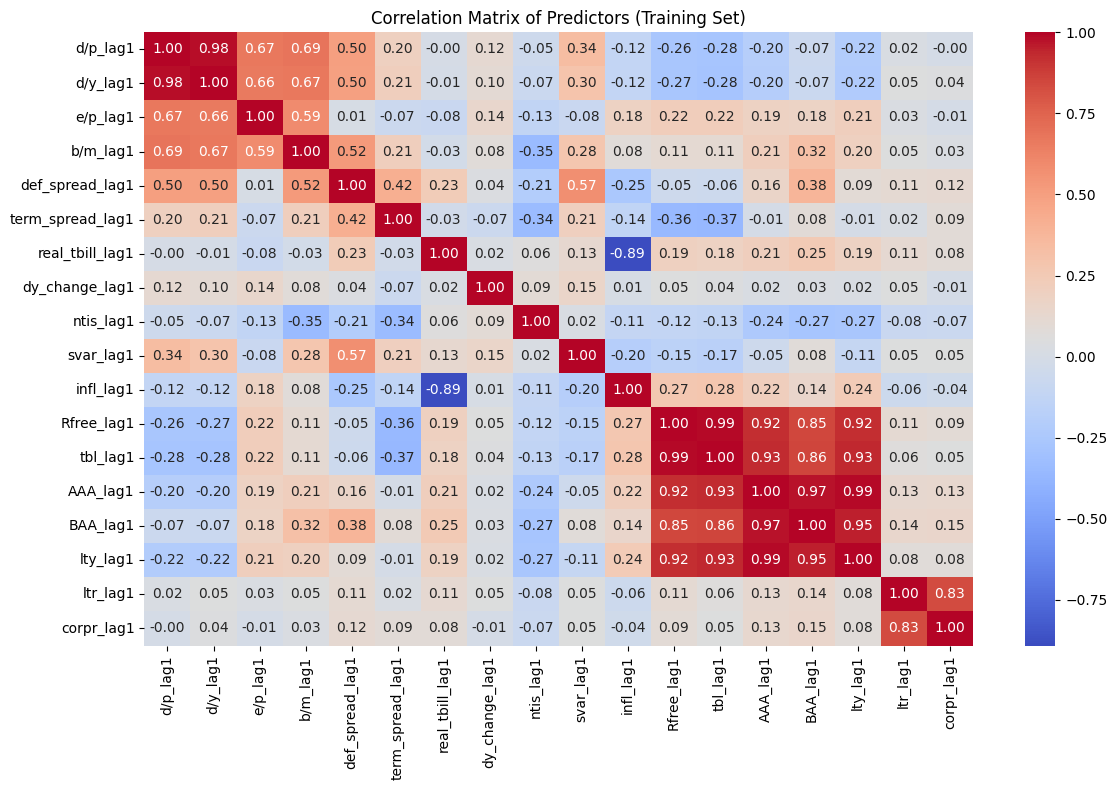

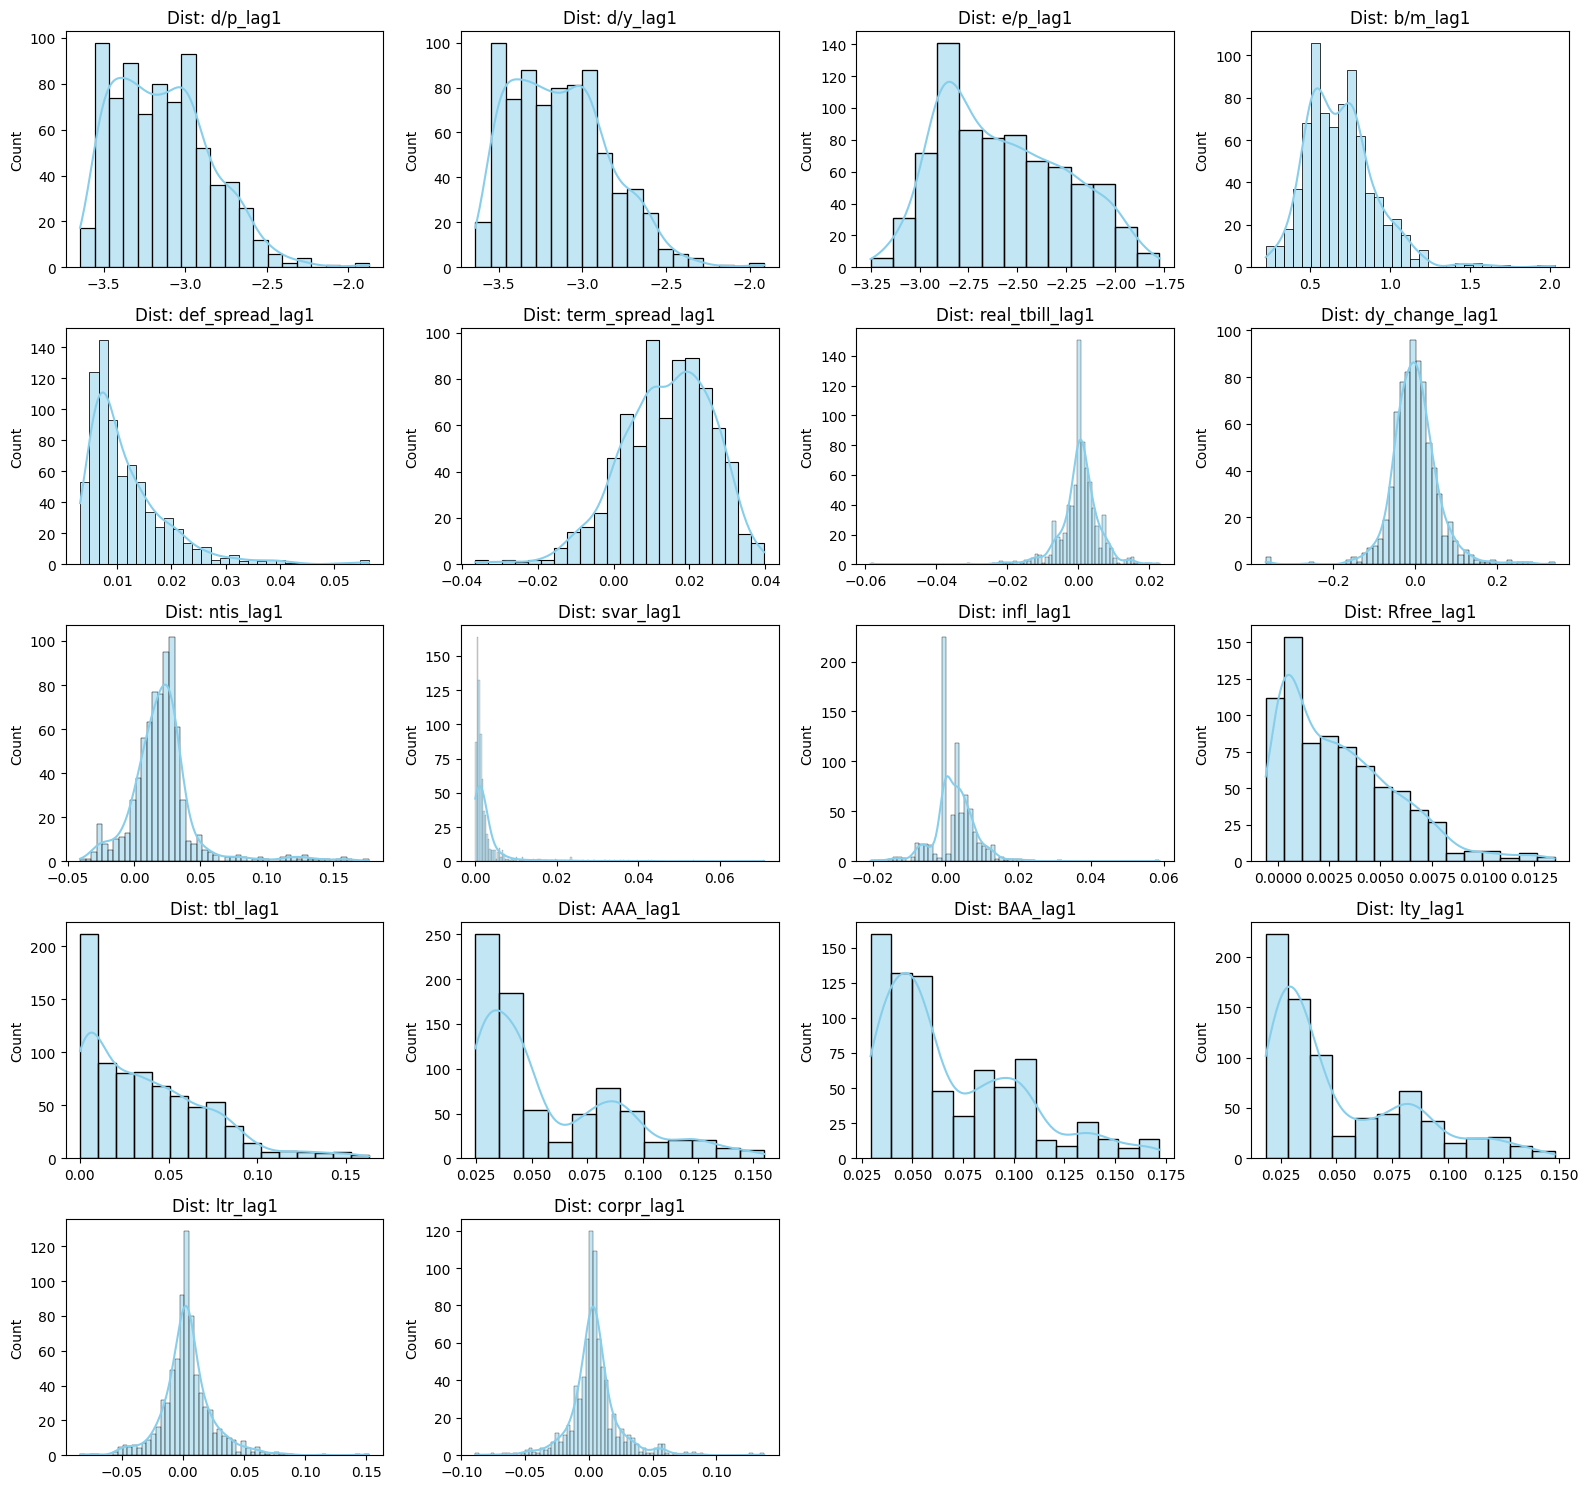


--- 2. STATIONARITY CHECK (ADF Test) ---
excess_ret      : ADF Statistic: -7.2511 | p-value: 0.0000
d/p_lag1        : ADF Statistic: -2.6418 | p-value: 0.0847
   >> WARNING: d/p_lag1 might be Non-Stationary (Random Walk).
d/y_lag1        : ADF Statistic: -2.6632 | p-value: 0.0806
   >> WARNING: d/y_lag1 might be Non-Stationary (Random Walk).
e/p_lag1        : ADF Statistic: -3.2491 | p-value: 0.0173
b/m_lag1        : ADF Statistic: -4.2411 | p-value: 0.0006
def_spread_lag1 : ADF Statistic: -2.6618 | p-value: 0.0809
   >> WARNING: def_spread_lag1 might be Non-Stationary (Random Walk).


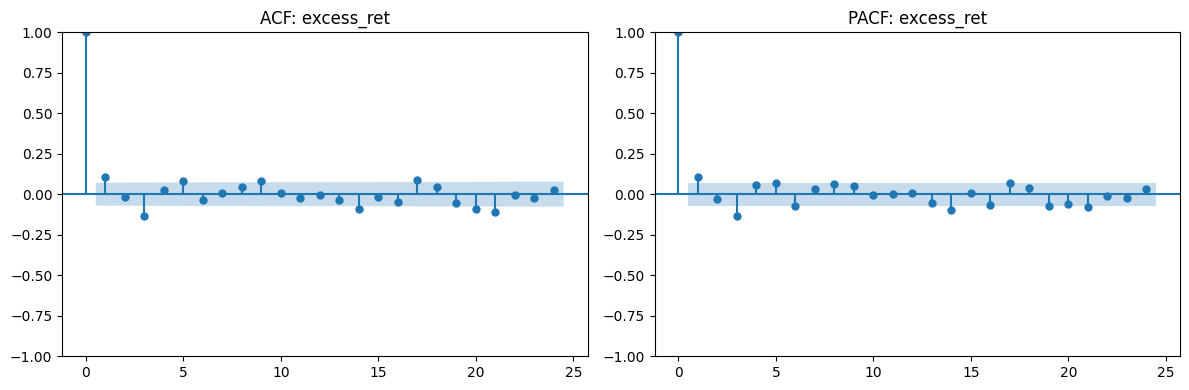



--- ARIMA Model Selection: AIC / BIC / LB-Test ---

ARIMA Model Comparison:
    Order          AIC          BIC  LB p(12)
(1, 0, 0) -2158.858344 -2144.926975   0.00258
(1, 0, 2) -2158.529455 -2135.310506   0.00380
(2, 0, 1) -2158.280134 -2135.061186   0.01191
(2, 0, 0) -2157.571009 -2138.995850   0.00496
(1, 0, 1) -2157.053268 -2138.478109   0.00314


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ==============================================================================
# 1. SETUP & SPLIT
# ==============================================================================
# We perform diagnostics ONLY on the Training Data to avoid look-ahead bias.
TEST_START_DATE = "1991-01-01"
target_col = "excess_ret"

# Define Potential Predictors (All Lagged Variables)
# We exclude 'svar_realized' because it's not a predictor, and 'yyyymm'
potential_predictors = [c for c in df_lag.columns if c.endswith("_lag1")]

print(f"Potential Predictors ({len(potential_predictors)}):")
print(potential_predictors)

# Split Data
train_df = df_lag.loc[: "1990-12-31"]
test_df  = df_lag.loc[TEST_START_DATE:]

print(f"\nTraining Data: {train_df.index[0].date()} to {train_df.index[-1].date()} ({len(train_df)} obs)")

# ==============================================================================
# 2. DIAGNOSTICS (On Training Data Only)
# ==============================================================================

# --- A0. Summary Statistics ---
print("\n--- SUMMARY STATISTICS (Training Predictors) ---")
print(train_df[potential_predictors].describe().T)
# .T keeps your variables in rows for better readability

# --- A. VIF (Multicollinearity Check) ---
print("\n--- 1. VIF CHECK (Multicollinearity) ---")
X_train = sm.add_constant(train_df[potential_predictors])

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)

print(vif_data)
print("\nNOTE: If VIF > 5 or 10, consider dropping the variable.")

# --- B. Correlation Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[potential_predictors].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictors (Training Set)")
plt.tight_layout()
plt.show()

# --- C. Distribution Analysis ---
n_cols = 4
n_rows = int(np.ceil(len(potential_predictors) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(potential_predictors):
    sns.histplot(train_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Dist: {col}")
    axes[i].set_xlabel("")

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# --- D. Time Series Properties (ACF/PACF/ADF) ---
print("\n--- 2. STATIONARITY CHECK (ADF Test) ---")
vars_to_check = [target_col] + potential_predictors[:5]  # check target + first 5 predictors

for col in vars_to_check:
    res = adfuller(train_df[col].dropna())
    print(f"{col:15} : ADF Statistic: {res[0]:.4f} | p-value: {res[1]:.4f}")
    if res[1] > 0.05:
        print(f"   >> WARNING: {col} might be Non-Stationary (Random Walk).")

# ACF/PACF Plots for Target
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(train_df[target_col], lags=24, ax=ax[0], title=f"ACF: {target_col}")
plot_pacf(train_df[target_col], lags=24, ax=ax[1], title=f"PACF: {target_col}")
plt.tight_layout()
plt.show()
# ==============================================================================
# 3. ARIMA Model Selection (AIC / BIC / LB-Test)  — FIXED VERSION
# ==============================================================================

import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

warnings.filterwarnings("ignore")

print("\n\n--- ARIMA Model Selection: AIC / BIC / LB-Test ---")

orders_to_test = [
    (1, 0, 0),
    (2, 0, 0),
    (1, 0, 1),
    (2, 0, 1),
    (1, 0, 2)
]

results = []
y = train_df[target_col].dropna()

for order in orders_to_test:
    try:
        model = ARIMA(y, order=order).fit()
        aic = float(model.aic)
        bic = float(model.bic)

        # Ljung–Box test (proper extraction)
        lb = acorr_ljungbox(model.resid, lags=[12], return_df=True)
        lb_p = float(lb["lb_pvalue"].iloc[0])

        results.append({
            "Order": order,
            "AIC": aic,
            "BIC": bic,
            "LB p(12)": lb_p
        })

    except Exception as e:
        print(f"Order {order} failed: {e}")

results_df = pd.DataFrame(results)
results_df["LB p(12)"] = results_df["LB p(12)"].astype(float).round(5)

print("\nARIMA Model Comparison:")
print(results_df.sort_values("AIC").to_string(index=False))



In [ ]:
# ==============================================================================
# RECOMPUTE VIF USING SELECTED 7 VARIABLES
# ==============================================================================

# Selected variables (7 predictors)
selected_predictors = [
    "e/p_lag1",
    "b/m_lag1",
    "ntis_lag1",
    "svar_lag1",
    "infl_lag1",
    "dy_change_lag1",
    "term_spread_lag1"
]

print("\nSelected Predictors (7):")
print(selected_predictors)

# Keep training set only (avoid look-ahead bias)
X_train_selected = train_df[selected_predictors].copy()

# Add constant for VIF computation
X_train_selected_const = sm.add_constant(X_train_selected)

# Compute VIF
vif_data_sel = pd.DataFrame()
vif_data_sel["Variable"] = X_train_selected_const.columns
vif_data_sel["VIF"] = [
    variance_inflation_factor(X_train_selected_const.values, i)
    for i in range(X_train_selected_const.shape[1])
]

# Sort by VIF
vif_data_sel = vif_data_sel.sort_values("VIF", ascending=False)

print("\n--- VIF for Selected Predictors ---")
print(vif_data_sel)
print("\nNOTE: VIF < 5 is generally acceptable. VIF < 10 acceptable in macro data.")



Selected Predictors (7):
['e/p_lag1', 'b/m_lag1', 'ntis_lag1', 'svar_lag1', 'infl_lag1', 'dy_change_lag1', 'term_spread_lag1']

--- VIF for Selected Predictors ---
           Variable         VIF
0             const  205.056095
2          b/m_lag1    2.205297
1          e/p_lag1    1.862665
4         svar_lag1    1.335596
3         ntis_lag1    1.327158
7  term_spread_lag1    1.258899
5         infl_lag1    1.102568
6    dy_change_lag1    1.065881

NOTE: VIF < 5 is generally acceptable. VIF < 10 acceptable in macro data.



--- 4. RUNNING EXPANDING WINDOW OLS FORECAST ---

=== OLS FORECAST RESULTS (1991–2022) ===
OOS R²:          -0.0471
MSE:             0.001909
MAE:             0.033230
RMSE:            0.043694
Sharpe (ann.):   0.3168

--- Residual Diagnostics ---
Breusch–Godfrey (12 lags): p = 0.0001
Breusch–Pagan Test: p = 0.0000
>> BG Test: Evidence of autocorrelation in residuals.
>> BP Test: Evidence of heteroskedasticity.


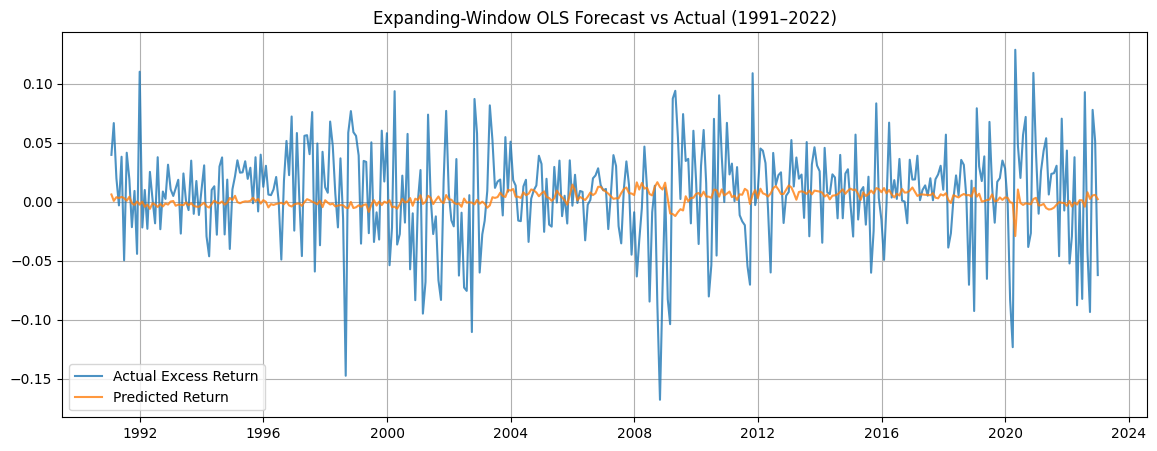

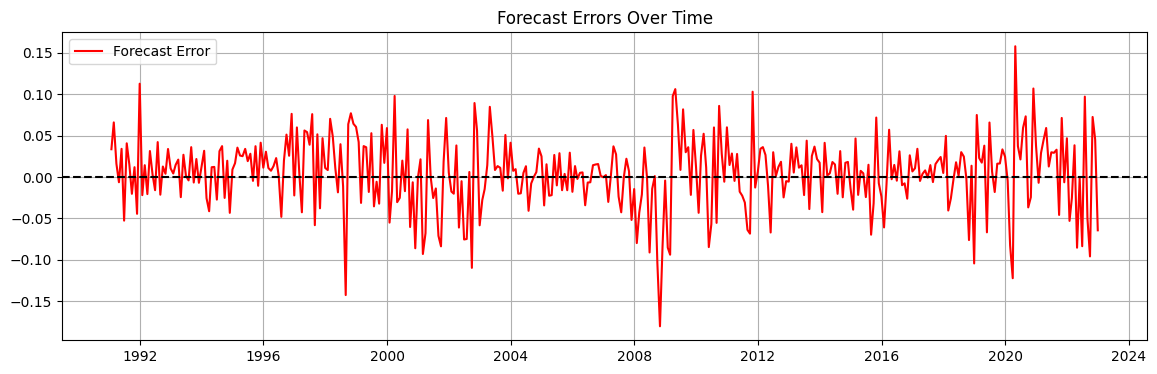

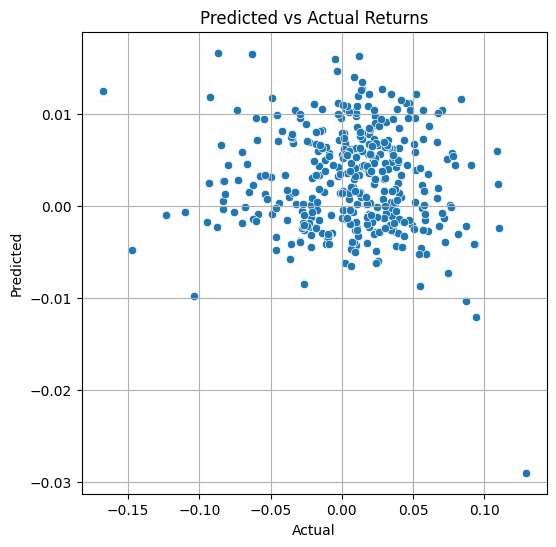


=== Last Window OLS Summary (Full Model) ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.890
Date:                Sat, 22 Nov 2025   Prob (F-statistic):            0.00536
Time:                        02:25:25   Log-Likelihood:                 1727.7
No. Observations:                1151   AIC:                            -3439.
Df Residuals:                    1143   BIC:                            -3399.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

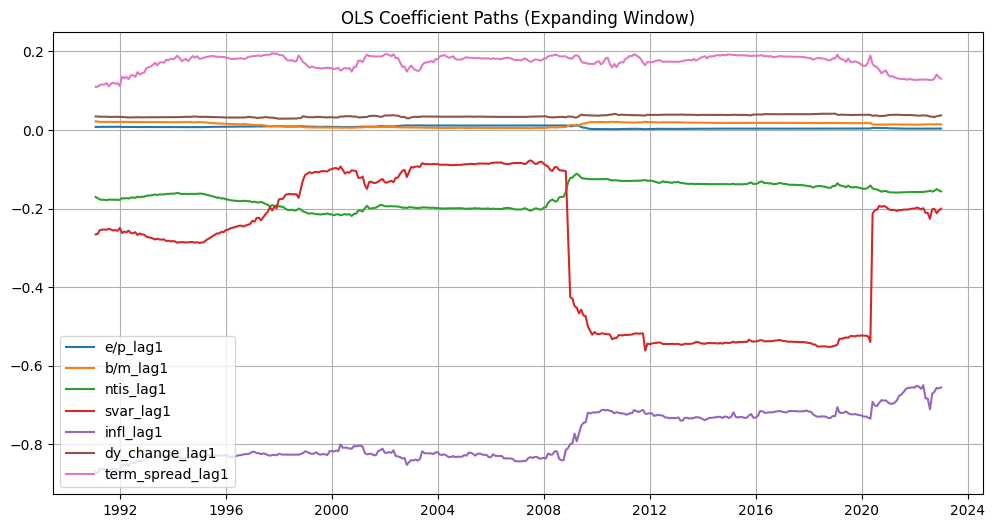

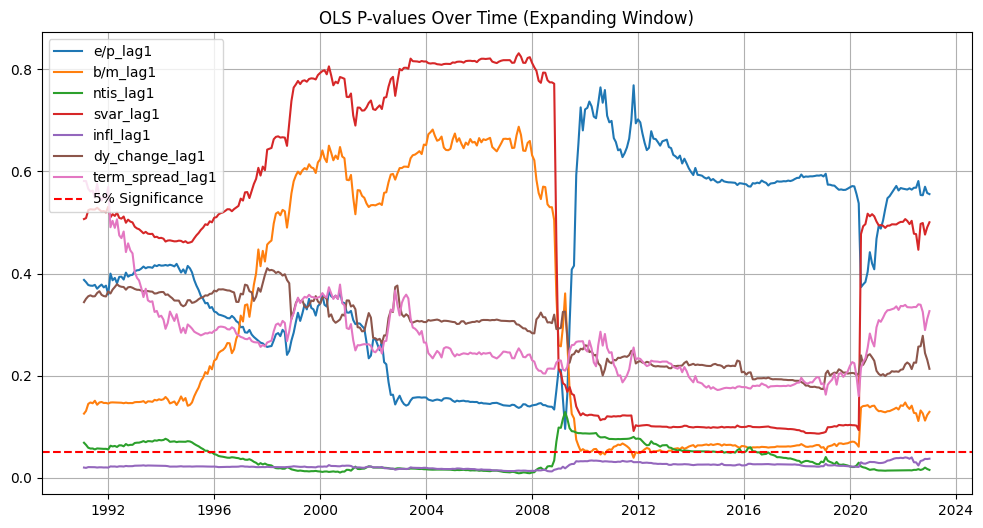

In [ ]:
# ==============================================================================
# 4. EXPANDING WINDOW OLS FORECAST (UPGRADED)
# ==============================================================================
print("\n--- 4. RUNNING EXPANDING WINDOW OLS FORECAST ---")

from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan

train_end_idx = df_lag.index.get_loc(train_df.index[-1])

preds, actuals, dates = [], [], []
vol_for_weights = []
residuals_all = []   # for diagnostics

for t in range(train_end_idx, len(df_lag) - 1):

    # --- A. Expanding Training Window ---
    curr_train = df_lag.iloc[: t + 1]

    # --- B. Fit OLS ---
    X = sm.add_constant(curr_train[selected_predictors])
    y = curr_train[target_col]

    model = sm.OLS(y, X).fit()

    # --- C. Predict Next Period ---
    X_next = df_lag.iloc[[t + 1]][selected_predictors]
    X_next = sm.add_constant(X_next, has_constant='add')
    pred_ret = model.predict(X_next)[0]

    # --- D. Save Results ---
    preds.append(pred_ret)
    actuals.append(df_lag.iloc[t + 1][target_col])
    dates.append(df_lag.index[t + 1])
    vol_for_weights.append(df_lag.iloc[t + 1]['svar_lag1'])

    # Residual for diagnostics
    residuals_all.append(model.resid.iloc[-1])

# Create Results DataFrame
results_ols = pd.DataFrame({
    "Actual": actuals,
    "Predicted": preds,
    "Vol_Lag1": vol_for_weights
}, index=dates)

# ==============================================================================
# 5. EVALUATION METRICS
# ==============================================================================

# --- Out-of-Sample R² ---
r2_oos = 1 - np.mean((results_ols['Actual'] - results_ols['Predicted'])**2) / np.var(results_ols['Actual'])

# --- MSE / MAE / RMSE ---
mse = mean_squared_error(results_ols['Actual'], results_ols['Predicted'])
mae = mean_absolute_error(results_ols['Actual'], results_ols['Predicted'])
rmse = np.sqrt(mse)

# --- Sharpe Ratio Strategy ---
gamma = 3.0
weights = (1 / gamma) * (results_ols['Predicted'] / results_ols['Vol_Lag1'])
weights = weights.clip(-1.5, 1.5)
strategy_ret = weights * results_ols['Actual']
sharpe_annualized = (strategy_ret.mean() / strategy_ret.std()) * np.sqrt(12)

print("\n=== OLS FORECAST RESULTS (1991–2022) ===")
print(f"OOS R²:          {r2_oos:.4f}")
print(f"MSE:             {mse:.6f}")
print(f"MAE:             {mae:.6f}")
print(f"RMSE:            {rmse:.6f}")
print(f"Sharpe (ann.):   {sharpe_annualized:.4f}")
print("=========================================")

# ==============================================================================
# 6. RESIDUAL DIAGNOSTICS (BG + BP)
# ==============================================================================
print("\n--- Residual Diagnostics ---")
residuals = np.array(residuals_all)

# BG Test (Autocorrelation)
bg_stat, bg_pvalue, _, _ = acorr_breusch_godfrey(model, nlags=12)
print(f"Breusch–Godfrey (12 lags): p = {bg_pvalue:.4f}")

# BP Test (Heteroskedasticity)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch–Pagan Test: p = {bp_pvalue:.4f}")

# Interpretation printed automatically
if bg_pvalue < 0.05:
    print(">> BG Test: Evidence of autocorrelation in residuals.")
else:
    print(">> BG Test: No autocorrelation detected.")

if bp_pvalue < 0.05:
    print(">> BP Test: Evidence of heteroskedasticity.")
else:
    print(">> BP Test: No heteroskedasticity detected.")


# ==============================================================================
# 7. PLOTS
# ==============================================================================

# --- Forecast vs Actual ---
plt.figure(figsize=(14,5))
plt.plot(results_ols['Actual'], label="Actual Excess Return", alpha=0.8)
plt.plot(results_ols['Predicted'], label="Predicted Return", alpha=0.8)
plt.title("Expanding-Window OLS Forecast vs Actual (1991–2022)")
plt.legend()
plt.grid()
plt.show()

# --- Error Plot ---
plt.figure(figsize=(14,4))
plt.plot(results_ols['Actual'] - results_ols['Predicted'], label="Forecast Error", color="red")
plt.axhline(0, color='black', linestyle='--')
plt.title("Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# --- Scatter Plot: Predicted vs Actual ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_ols['Actual'], y=results_ols['Predicted'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Returns")
plt.grid()
plt.show()

# ==============================================================================
# 8. Extract OLS Coefficients, t-stats, and p-values Over Time
# ==============================================================================

coef_records = []
pval_records = []
tstat_records = []

for t in range(train_end_idx, len(df_lag) - 1):

    curr_train = df_lag.iloc[: t + 1]

    X = sm.add_constant(curr_train[selected_predictors])
    y = curr_train[target_col]
    model = sm.OLS(y, X).fit()

    coef_records.append(model.params)
    pval_records.append(model.pvalues)
    tstat_records.append(model.tvalues)

# Convert to DataFrame (aligned with dates)
coef_df = pd.DataFrame(coef_records, index=dates)
pval_df = pd.DataFrame(pval_records, index=dates)
tstat_df = pd.DataFrame(tstat_records, index=dates)

print("\n=== Last Window OLS Summary (Full Model) ===")
print(model.summary())


# ==============================================================================
# 9. Plot Coefficient Paths
# ==============================================================================

plt.figure(figsize=(12, 6))
for col in selected_predictors:
    plt.plot(coef_df.index, coef_df[col], label=col)

plt.title("OLS Coefficient Paths (Expanding Window)")
plt.legend()
plt.grid()
plt.show()


# ==============================================================================
# 10. Plot P-values Over Time
# ==============================================================================

plt.figure(figsize=(12, 6))
for col in selected_predictors:
    plt.plot(pval_df.index, pval_df[col], label=col)

plt.axhline(0.05, color="red", linestyle="--", label="5% Significance")
plt.title("OLS P-values Over Time (Expanding Window)")
plt.legend()
plt.grid()
plt.show()


# no clip


--- RUNNING ROLLING WINDOW OLS FORECAST (NO-CLIP + CLIP) ---

=== ROLLING OLS RESULTS (RAW WEIGHTS) ===
OOS R²:        -0.1978
MSE:           0.002134
MAE:           0.034206
RMSE:          0.046199
Sharpe (ann.): 0.3463

--- Residual Diagnostics (Rolling OLS) ---
Breusch–Godfrey (12 lags): p = 0.1101
Breusch–Pagan: p = 0.0105


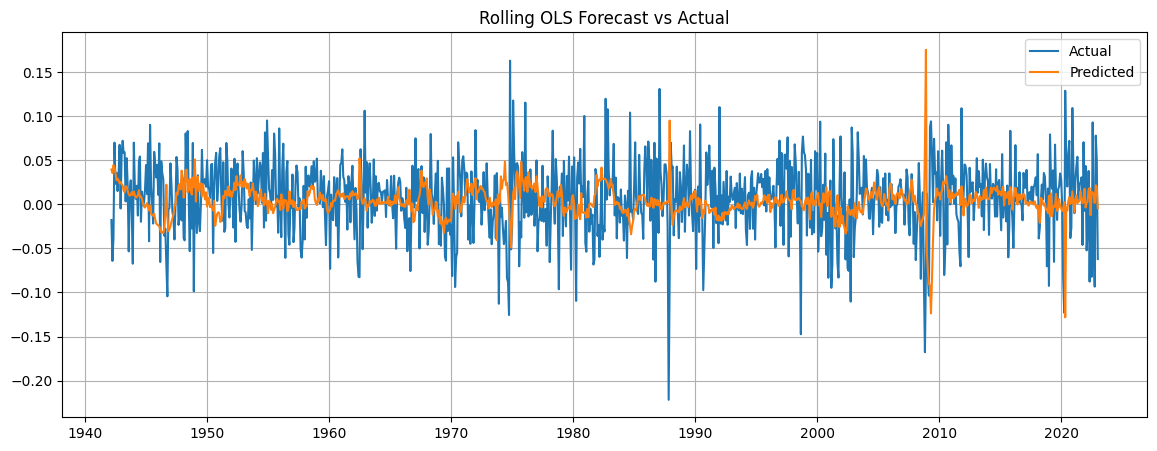

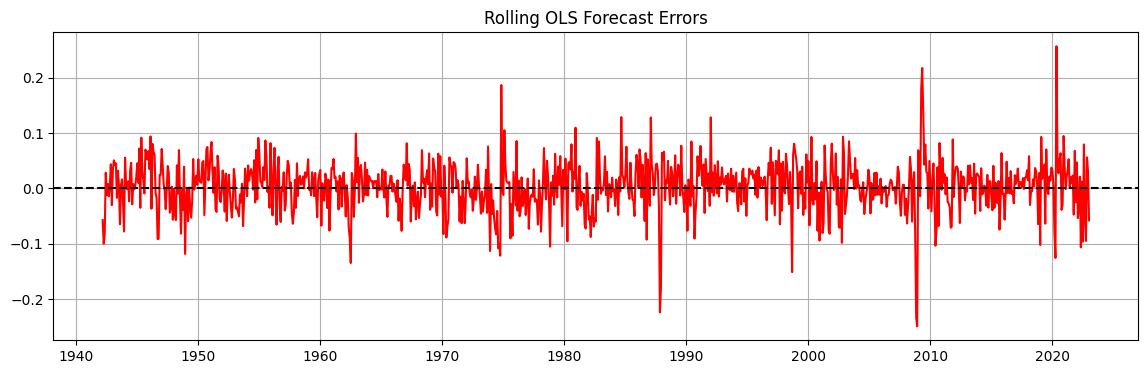

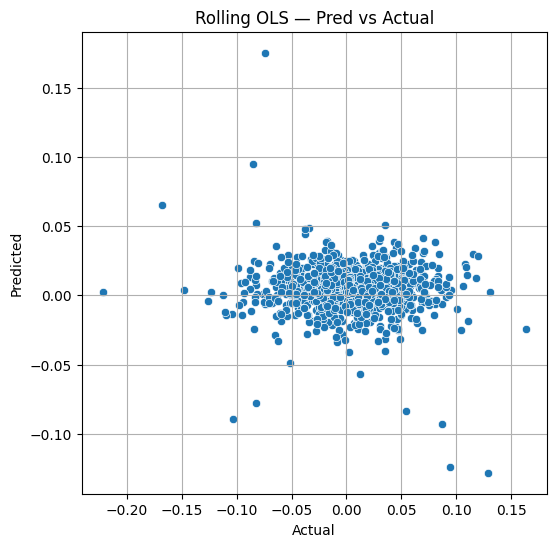


=== Last Rolling Window OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.128
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           0.000321
Time:                        02:25:39   Log-Likelihood:                 310.03
No. Observations:                 180   AIC:                            -604.1
Df Residuals:                     172   BIC:                            -578.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

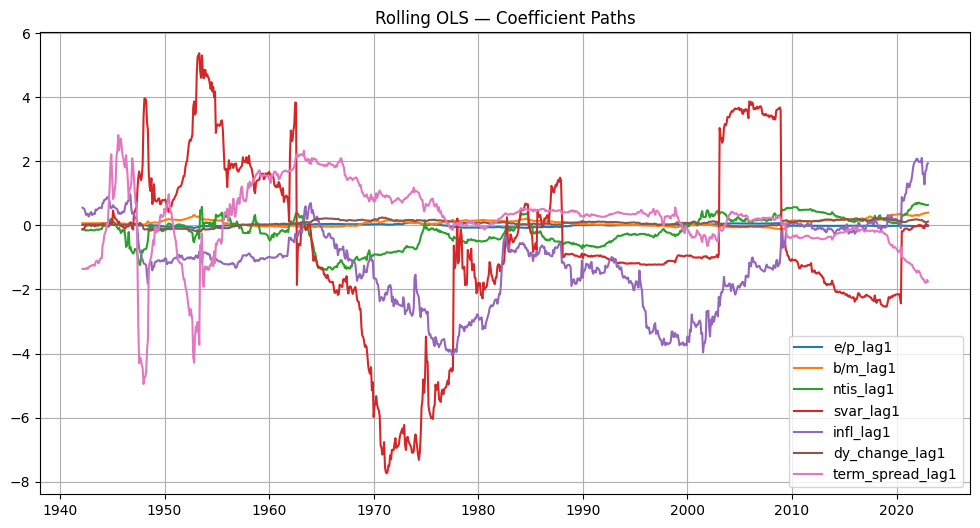

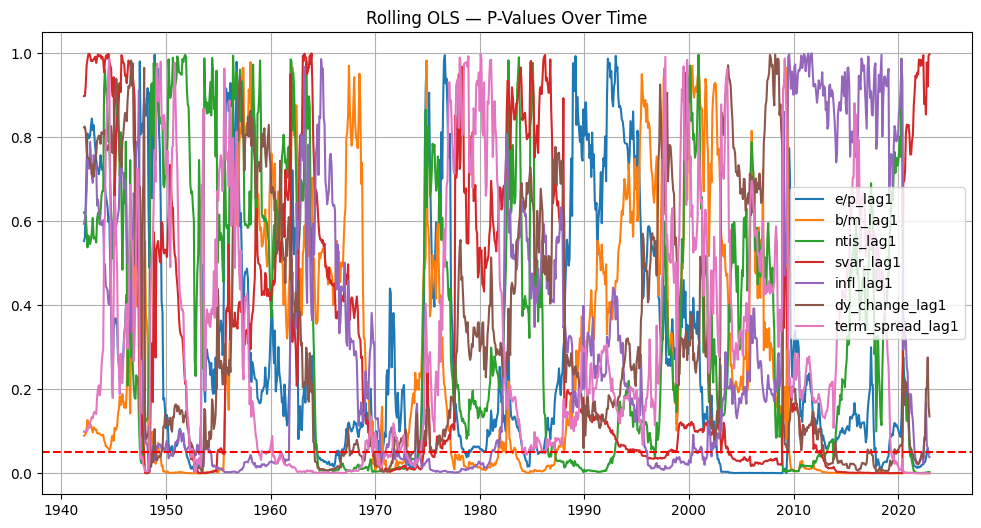

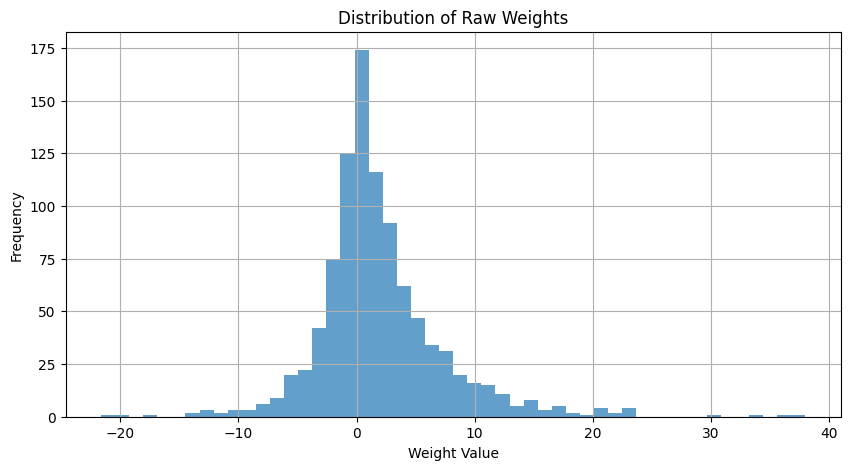


=== Raw Weight Extremes ===
Weights > 1.5 :   431 (44.39%)
Weights < -1.5:   178 (18.33%)
Total weights:    971

=== Sharpe Ratio Comparison ===
Raw weights Sharpe:      0.3463
Clipped weights Sharpe:  0.4576


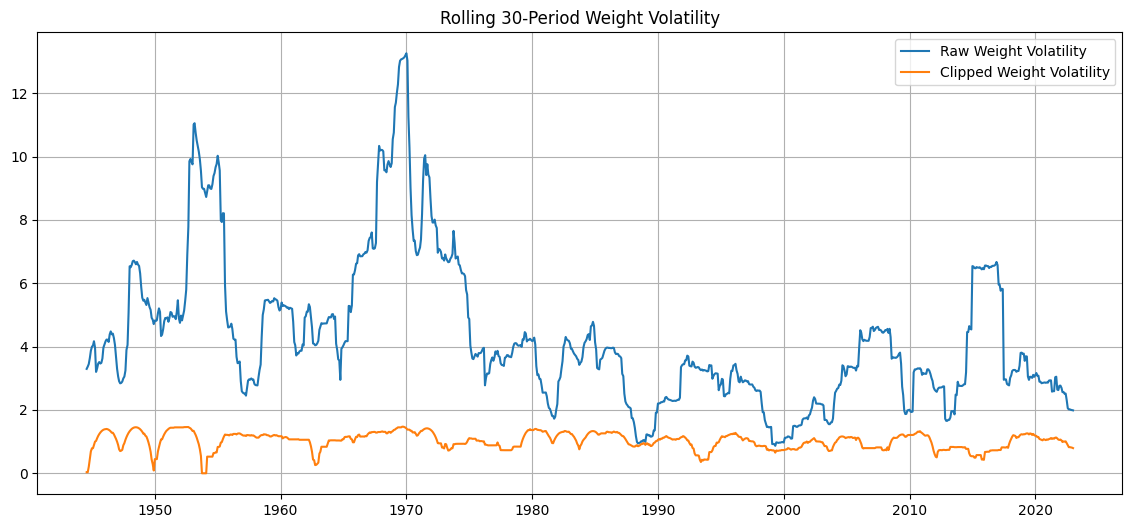

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# ============================================
# 0. PARAMETERS
# ============================================
WINDOW = 180
gamma = 3.0

print("\n--- RUNNING ROLLING WINDOW OLS FORECAST (NO-CLIP + CLIP) ---")

preds, actuals, dates = [], [], []
vol_for_weights = []
residuals_all = []


# ============================================
# 1. Rolling OLS
# ============================================
for t in range(WINDOW, len(df_lag)-1):

    train = df_lag.iloc[t-WINDOW:t]

    X = sm.add_constant(train[selected_predictors])
    y = train[target_col]
    model = sm.OLS(y, X).fit()

    # predict next period
    X_next = df_lag.iloc[[t+1]][selected_predictors]
    X_next = sm.add_constant(X_next, has_constant='add')
    pred = model.predict(X_next)[0]

    preds.append(pred)
    actuals.append(df_lag.iloc[t+1][target_col])
    dates.append(df_lag.index[t+1])
    vol_for_weights.append(df_lag.iloc[t+1]["svar_lag1"])

    residuals_all.append(model.resid.iloc[-1])


# ============================================
# 2. Build DataFrame
# ============================================
results_ols_roll = pd.DataFrame({
    "Actual": actuals,
    "Predicted": preds,
    "Vol_Lag1": vol_for_weights
}, index=dates)


# ============================================
# 3. Compute NO-CLIP weights and clipped weights
# ============================================

# raw (unclipped) weights
results_ols_roll["Weight_Raw"] = (1/gamma) * (
    results_ols_roll["Predicted"] / results_ols_roll["Vol_Lag1"]
)

# clipped weights
results_ols_roll["Weight_Clipped"] = results_ols_roll["Weight_Raw"].clip(-1.5, 1.5)


# choose which one is used for the main report (use raw)
weights = results_ols_roll["Weight_Raw"]


# ============================================
# 4. Compute strategy return + metrics (raw)
# ============================================
strategy_ret = weights * results_ols_roll["Actual"]
sharpe_ann = (strategy_ret.mean() / strategy_ret.std()) * np.sqrt(12)

mse = mean_squared_error(results_ols_roll["Actual"], results_ols_roll["Predicted"])
mae = mean_absolute_error(results_ols_roll["Actual"], results_ols_roll["Predicted"])
rmse = np.sqrt(mse)

# OOS R2
r2_oos = 1 - np.mean((results_ols_roll["Actual"] - results_ols_roll["Predicted"])**2) / \
                np.var(results_ols_roll["Actual"])


print("\n=== ROLLING OLS RESULTS (RAW WEIGHTS) ===")
print(f"OOS R²:        {r2_oos:.4f}")
print(f"MSE:           {mse:.6f}")
print(f"MAE:           {mae:.6f}")
print(f"RMSE:          {rmse:.6f}")
print(f"Sharpe (ann.): {sharpe_ann:.4f}")


# ============================================
# 5. Diagnostics
# ============================================

print("\n--- Residual Diagnostics (Rolling OLS) ---")
bg_stat, bg_pvalue, _, _ = acorr_breusch_godfrey(model, nlags=12)
print(f"Breusch–Godfrey (12 lags): p = {bg_pvalue:.4f}")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch–Pagan: p = {bp_pvalue:.4f}")


# ============================================
# 6. Plot Actual vs Predicted
# ============================================
plt.figure(figsize=(14,5))
plt.plot(results_ols_roll["Actual"], label="Actual")
plt.plot(results_ols_roll["Predicted"], label="Predicted")
plt.title("Rolling OLS Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()


# ============================================
# 7. Forecast Errors
# ============================================
plt.figure(figsize=(14,4))
plt.plot(results_ols_roll["Actual"] - results_ols_roll["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Rolling OLS Forecast Errors")
plt.grid(); plt.show()


# ============================================
# 8. Pred vs Actual scatter
# ============================================
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_ols_roll["Actual"], y=results_ols_roll["Predicted"])
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Rolling OLS — Pred vs Actual")
plt.grid(); plt.show()


# ============================================
# 9. Coefficient paths
# ============================================
coef_records, pval_records, tstat_records, coef_dates = [], [], [], []

for t in range(WINDOW, len(df_lag)-1):

    train = df_lag.iloc[t-WINDOW:t]
    X = sm.add_constant(train[selected_predictors])
    y = train[target_col]
    model = sm.OLS(y, X).fit()

    coef_records.append(model.params)
    pval_records.append(model.pvalues)
    tstat_records.append(model.tvalues)
    coef_dates.append(df_lag.index[t+1])

coef_df = pd.DataFrame(coef_records, index=coef_dates)
pval_df = pd.DataFrame(pval_records, index=coef_dates)
tstat_df = pd.DataFrame(tstat_records, index=coef_dates)

print("\n=== Last Rolling Window OLS Summary ===")
print(model.summary())


plt.figure(figsize=(12,6))
for col in selected_predictors:
    plt.plot(coef_df.index, coef_df[col], label=col)
plt.title("Rolling OLS — Coefficient Paths")
plt.legend(); plt.grid(); plt.show()


plt.figure(figsize=(12,6))
for col in selected_predictors:
    plt.plot(pval_df.index, pval_df[col], label=col)
plt.axhline(0.05, color="red", linestyle="--")
plt.title("Rolling OLS — P-Values Over Time")
plt.legend(); plt.grid(); plt.show()


# ==========================================================
# 10. EXTRA ANALYSIS: Distribution, extremes, Sharpe compare,
#     rolling volatility of weights
# ==========================================================

# histogram
plt.figure(figsize=(10,5))
plt.hist(results_ols_roll["Weight_Raw"], bins=50, alpha=0.7)
plt.title("Distribution of Raw Weights")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# extremes
exceed_pos = (results_ols_roll["Weight_Raw"] > 1.5).sum()
exceed_neg = (results_ols_roll["Weight_Raw"] < -1.5).sum()
total = len(results_ols_roll)

print("\n=== Raw Weight Extremes ===")
print(f"Weights > 1.5 :   {exceed_pos} ({exceed_pos/total:.2%})")
print(f"Weights < -1.5:   {exceed_neg} ({exceed_neg/total:.2%})")
print(f"Total weights:    {total}")

# Sharpe: raw vs clipped
strategy_ret_raw = results_ols_roll["Weight_Raw"] * results_ols_roll["Actual"]
sharpe_raw = (strategy_ret_raw.mean() / strategy_ret_raw.std()) * np.sqrt(12)

strategy_ret_clipped = results_ols_roll["Weight_Clipped"] * results_ols_roll["Actual"]
sharpe_clipped = (strategy_ret_clipped.mean() / strategy_ret_clipped.std()) * np.sqrt(12)

print("\n=== Sharpe Ratio Comparison ===")
print(f"Raw weights Sharpe:      {sharpe_raw:.4f}")
print(f"Clipped weights Sharpe:  {sharpe_clipped:.4f}")

# rolling vol
roll_window = 30
results_ols_roll["WeightVol_Raw"] = results_ols_roll["Weight_Raw"].rolling(roll_window).std()
results_ols_roll["WeightVol_Clipped"] = results_ols_roll["Weight_Clipped"].rolling(roll_window).std()

plt.figure(figsize=(14,6))
plt.plot(results_ols_roll.index, results_ols_roll["WeightVol_Raw"], label="Raw Weight Volatility")
plt.plot(results_ols_roll.index, results_ols_roll["WeightVol_Clipped"], label="Clipped Weight Volatility")
plt.title(f"Rolling {roll_window}-Period Weight Volatility")
plt.legend()
plt.grid()
plt.show()



--- RUNNING ROLLING WINDOW OLS FORECAST ---

=== ROLLING OLS RESULTS ===
OOS R²:        -0.1978
MSE:           0.002134
MAE:           0.034206
RMSE:          0.046199
Sharpe (ann.): 0.4576

--- Residual Diagnostics (Rolling OLS) ---
Breusch–Godfrey (12 lags): p = 0.1101
Breusch–Pagan: p = 0.0105


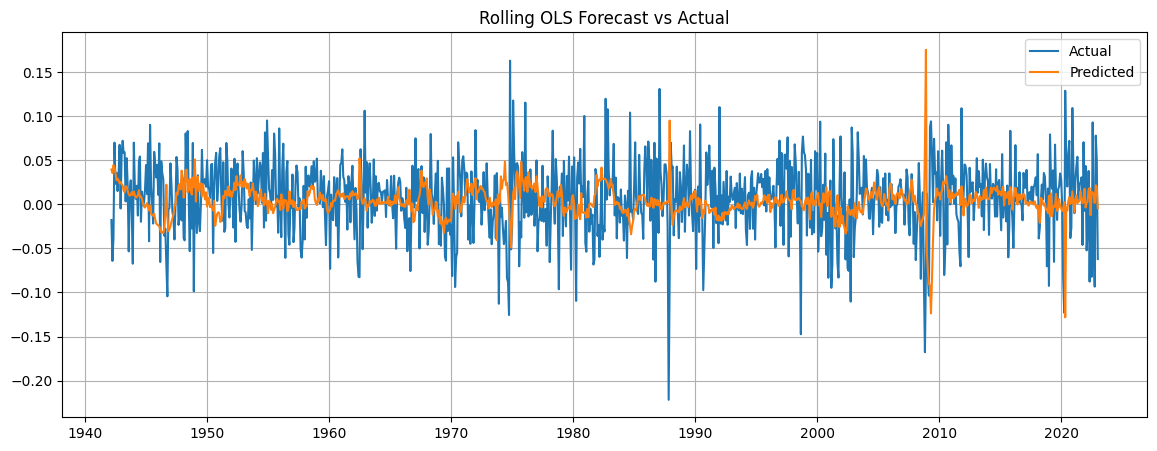

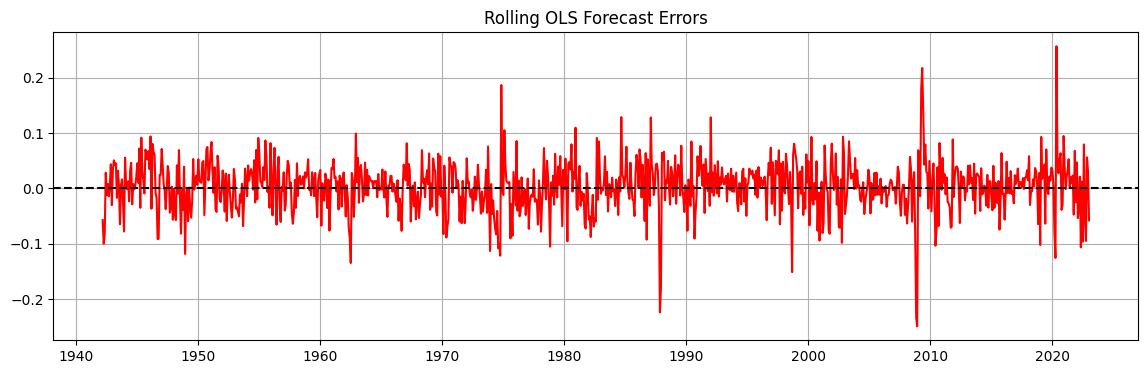

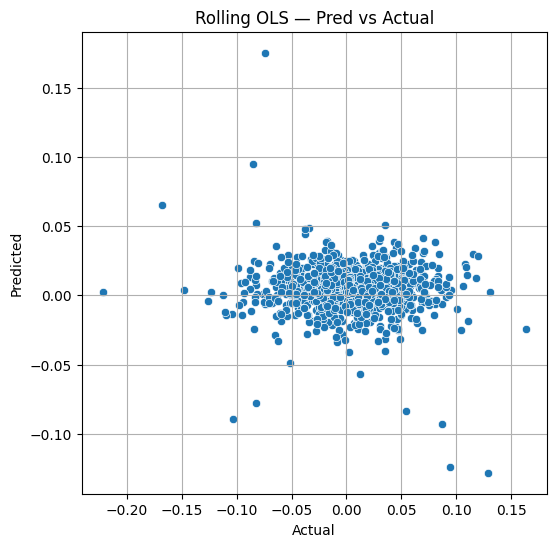


=== Last Rolling Window OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.128
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           0.000321
Time:                        02:25:57   Log-Likelihood:                 310.03
No. Observations:                 180   AIC:                            -604.1
Df Residuals:                     172   BIC:                            -578.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

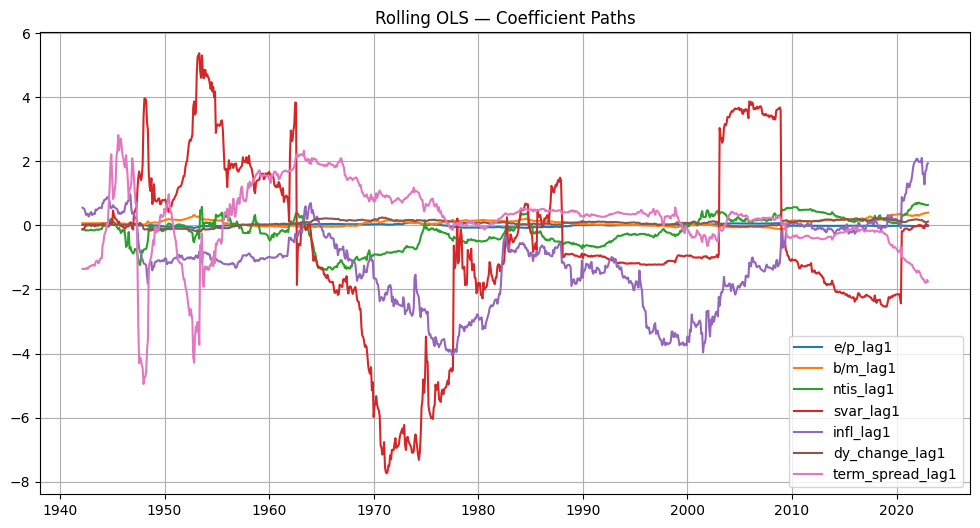

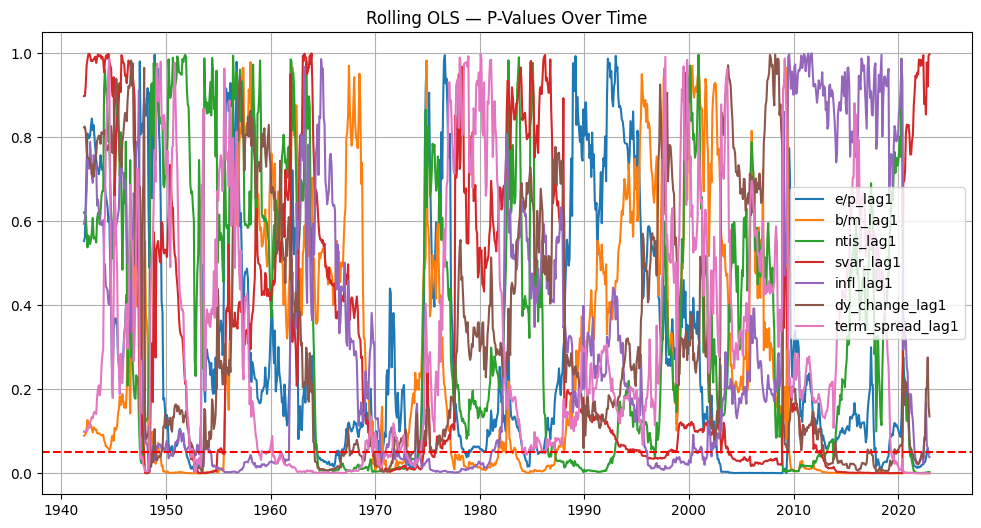

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan
from sklearn.metrics import mean_squared_error, mean_absolute_error

WINDOW = 180   # or 120 / 240 (your choice)

print("\n--- RUNNING ROLLING WINDOW OLS FORECAST ---")

preds, actuals, dates = [], [], []
vol_for_weights = []
residuals_all = []

for t in range(WINDOW, len(df_lag)-1):

    # Rolling window
    train = df_lag.iloc[t-WINDOW:t]

    # OLS fit
    X = sm.add_constant(train[selected_predictors])
    y = train[target_col]
    model = sm.OLS(y, X).fit()

    # Predict next period
    X_next = df_lag.iloc[[t+1]][selected_predictors]
    X_next = sm.add_constant(X_next, has_constant='add')
    pred = model.predict(X_next)[0]

    # Store
    preds.append(pred)
    actuals.append(df_lag.iloc[t+1][target_col])
    dates.append(df_lag.index[t+1])
    vol_for_weights.append(df_lag.iloc[t+1]['svar_lag1'])

    # diagnostic residual
    residuals_all.append(model.resid.iloc[-1])

# DataFrame
results_ols_roll = pd.DataFrame({
    "Actual": actuals,
    "Predicted": preds,
    "Vol_Lag1": vol_for_weights
}, index=dates)
# R2
r2_oos = 1 - np.mean((results_ols_roll["Actual"] - results_ols_roll["Predicted"])**2) / \
                np.var(results_ols_roll["Actual"])

# Errors
mse = mean_squared_error(results_ols_roll["Actual"], results_ols_roll["Predicted"])
mae = mean_absolute_error(results_ols_roll["Actual"], results_ols_roll["Predicted"])
rmse = np.sqrt(mse)

# Sharpe ratio strategy
gamma = 3.0
weights = (1/gamma) * (results_ols_roll["Predicted"] / results_ols_roll["Vol_Lag1"])
weights = weights.clip(-1.5, 1.5)

strategy_ret = weights * results_ols_roll["Actual"]
sharpe_ann = (strategy_ret.mean() / strategy_ret.std()) * np.sqrt(12)

print("\n=== ROLLING OLS RESULTS ===")
print(f"OOS R²:        {r2_oos:.4f}")
print(f"MSE:           {mse:.6f}")
print(f"MAE:           {mae:.6f}")
print(f"RMSE:          {rmse:.6f}")
print(f"Sharpe (ann.): {sharpe_ann:.4f}")
print("\n--- Residual Diagnostics (Rolling OLS) ---")

bg_stat, bg_pvalue, _, _ = acorr_breusch_godfrey(model, nlags=12)
print(f"Breusch–Godfrey (12 lags): p = {bg_pvalue:.4f}")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch–Pagan: p = {bp_pvalue:.4f}")
plt.figure(figsize=(14,5))
plt.plot(results_ols_roll["Actual"], label="Actual")
plt.plot(results_ols_roll["Predicted"], label="Predicted")
plt.title("Rolling OLS Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_ols_roll["Actual"] - results_ols_roll["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Rolling OLS Forecast Errors")
plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_ols_roll["Actual"], y=results_ols_roll["Predicted"])
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Rolling OLS — Pred vs Actual")
plt.grid(); plt.show()
coef_records = []
pval_records = []
tstat_records = []
coef_dates = []

for t in range(WINDOW, len(df_lag)-1):

    train = df_lag.iloc[t-WINDOW:t]

    X = sm.add_constant(train[selected_predictors])
    y = train[target_col]
    model = sm.OLS(y, X).fit()

    coef_records.append(model.params)
    pval_records.append(model.pvalues)
    tstat_records.append(model.tvalues)
    coef_dates.append(df_lag.index[t+1])

coef_df = pd.DataFrame(coef_records, index=coef_dates)
pval_df = pd.DataFrame(pval_records, index=coef_dates)
tstat_df = pd.DataFrame(tstat_records, index=coef_dates)

print("\n=== Last Rolling Window OLS Summary ===")
print(model.summary())
plt.figure(figsize=(12,6))
for col in selected_predictors:
    plt.plot(coef_df.index, coef_df[col], label=col)
plt.title("Rolling OLS — Coefficient Paths")
plt.legend(); plt.grid(); plt.show()
plt.figure(figsize=(12,6))
for col in selected_predictors:
    plt.plot(pval_df.index, pval_df[col], label=col)
plt.axhline(0.05, color="red", linestyle="--")
plt.title("Rolling OLS — P-Values Over Time")
plt.legend(); plt.grid(); plt.show()


# PCA + OLS


=== PCA Variance Decomposition (Training Sample Only) ===
    PC  Explained_Var_%  Cum_Explained_Var_%
0  PC1        27.107871            27.107871
1  PC2        20.736725            47.844596
2  PC3        17.922948            65.767543
3  PC4        11.941519            77.709063
4  PC5        10.569296            88.278359
5  PC6         7.966038            96.244397
6  PC7         3.755603           100.000000


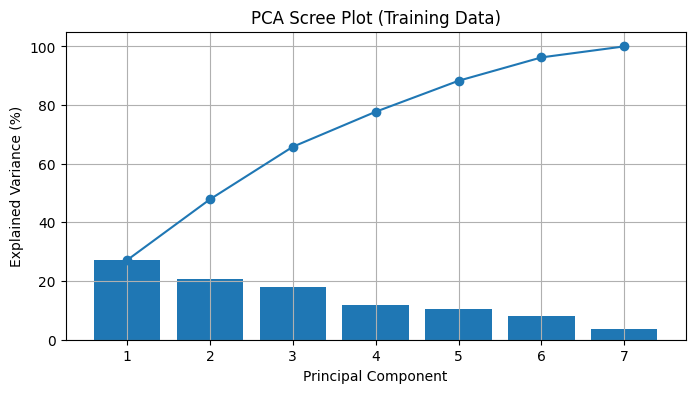


=== PCA Loadings (Training Data) ===
     e/p_lag1  b/m_lag1  ntis_lag1  svar_lag1  infl_lag1  dy_change_lag1  \
PC1  0.486113  0.645220  -0.436763   0.204319   0.121760        0.097806   
PC2  0.428752  0.035123   0.103056  -0.491892   0.529360        0.080748   
PC3  0.177810  0.126219   0.477490   0.437337  -0.215880        0.638055   
PC4 -0.355993 -0.241930  -0.283282   0.032490   0.534151        0.624280   
PC5 -0.175338  0.108500   0.209359   0.614700   0.574428       -0.425638   
PC6  0.215442 -0.023725   0.637166  -0.190996   0.207500       -0.029231   
PC7 -0.586822  0.704032   0.201393  -0.331122   0.002724        0.071080   

     term_spread_lag1  
PC1          0.300808  
PC2         -0.524994  
PC3         -0.281910  
PC4          0.241644  
PC5         -0.157042  
PC6          0.683118  
PC7         -0.068688  


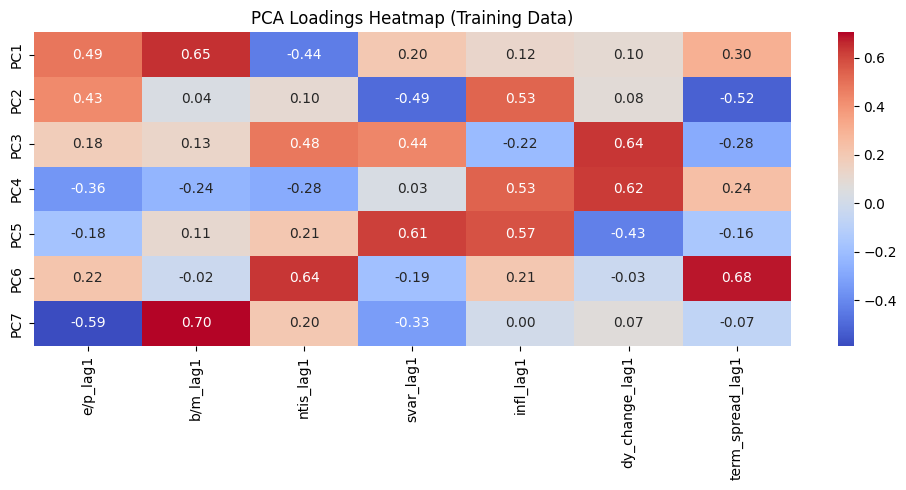

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan
# ==============================================================================
# PCA ON TRAINING DATA (STATIC) – VARIANCE & LOADINGS
# ==============================================================================

X_train_raw = train_df[selected_predictors].copy()

# Standardize predictors (very important before PCA)
scaler_full = StandardScaler().fit(X_train_raw)
X_train_scaled = scaler_full.transform(X_train_raw)

# Fit PCA using ALL 7 predictors
pca_full = PCA(n_components=len(selected_predictors)).fit(X_train_scaled)

explained_var = pca_full.explained_variance_ratio_
cum_explained_var = explained_var.cumsum()

pca_info = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "Explained_Var_%": explained_var * 100,
    "Cum_Explained_Var_%": cum_explained_var * 100
})

print("\n=== PCA Variance Decomposition (Training Sample Only) ===")
print(pca_info)

# Scree plot
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_var)+1), explained_var*100)
plt.plot(range(1, len(explained_var)+1), cum_explained_var*100, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("PCA Scree Plot (Training Data)")
plt.grid()
plt.show()

# PCA loadings (components)
loadings = pd.DataFrame(
    pca_full.components_,
    columns=selected_predictors,
    index=[f"PC{i+1}" for i in range(len(selected_predictors))]
)
print("\n=== PCA Loadings (Training Data) ===")
print(loadings)

plt.figure(figsize=(10,5))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("PCA Loadings Heatmap (Training Data)")
plt.tight_layout()
plt.show()


In [ ]:
# ==============================================================================
# EXPANDING WINDOW PCA + OLS FORECAST
# ==============================================================================

n_components_pca = 3   # change if you want more / fewer PCs

print(f"\n--- RUNNING EXPANDING WINDOW PCA+OLS with {n_components_pca} PCs ---")

train_end_idx = df_lag.index.get_loc(train_df.index[-1])

preds_pca, actuals_pca, dates_pca = [], [], []
vol_for_weights_pca = []
residuals_all_pca = []
coef_records_pca, pval_records_pca = [], []

for t in range(train_end_idx, len(df_lag) - 1):

    # A. Expanding training window
    curr_train = df_lag.iloc[: t + 1]
    X_raw = curr_train[selected_predictors]
    y = curr_train[target_col]

    # B. Standardize within current window (no look-ahead)
    scaler = StandardScaler().fit(X_raw)
    X_scaled = scaler.transform(X_raw)

    # C. PCA within current window
    pca = PCA(n_components=n_components_pca).fit(X_scaled)
    Z_train = pca.transform(X_scaled)   # PC scores

    # D. OLS on PCs
    X_ols = sm.add_constant(Z_train)
    model_pca = sm.OLS(y, X_ols).fit()

    # E. Prepare next-period data
    X_next_raw = df_lag.iloc[[t + 1]][selected_predictors]
    X_next_scaled = scaler.transform(X_next_raw)
    Z_next = pca.transform(X_next_scaled)
    X_next_ols = sm.add_constant(Z_next, has_constant="add")

    # F. Predict next month's excess return
    pred_ret = model_pca.predict(X_next_ols)[0]

    preds_pca.append(pred_ret)
    actuals_pca.append(df_lag.iloc[t + 1][target_col])
    dates_pca.append(df_lag.index[t + 1])
    vol_for_weights_pca.append(df_lag.iloc[t + 1]["svar_lag1"])

    residuals_all_pca.append(model_pca.resid.iloc[-1])
    coef_records_pca.append(model_pca.params)
    pval_records_pca.append(model_pca.pvalues)

# Results DataFrame
results_pca = pd.DataFrame({
    "Actual": actuals_pca,
    "Predicted": preds_pca,
    "Vol_Lag1": vol_for_weights_pca
}, index=dates_pca)



--- RUNNING EXPANDING WINDOW PCA+OLS with 3 PCs ---



=== PCA+OLS FORECAST RESULTS (1991–2022) ===
OOS R²:          -0.0261
MSE:             0.001871
MAE:             0.033181
RMSE:            0.043253
Sharpe (ann.):   0.4815

--- PCA+OLS Residual Diagnostics (last window model) ---
Breusch–Godfrey (12 lags) p-value: 0.0001
Breusch–Pagan p-value:             0.0000
>> BG: Evidence of autocorrelation (expected for returns).
>> BP: Evidence of heteroskedasticity (expected for returns).


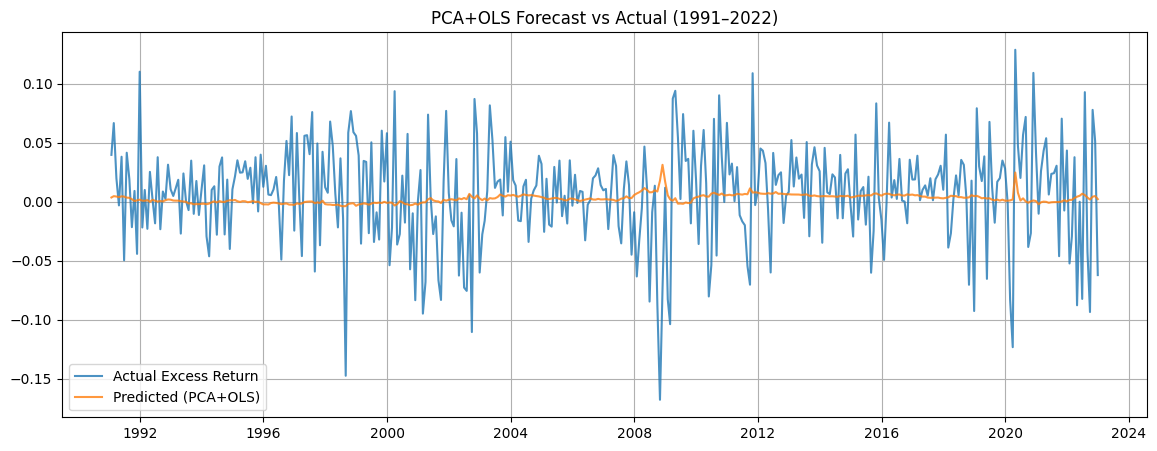

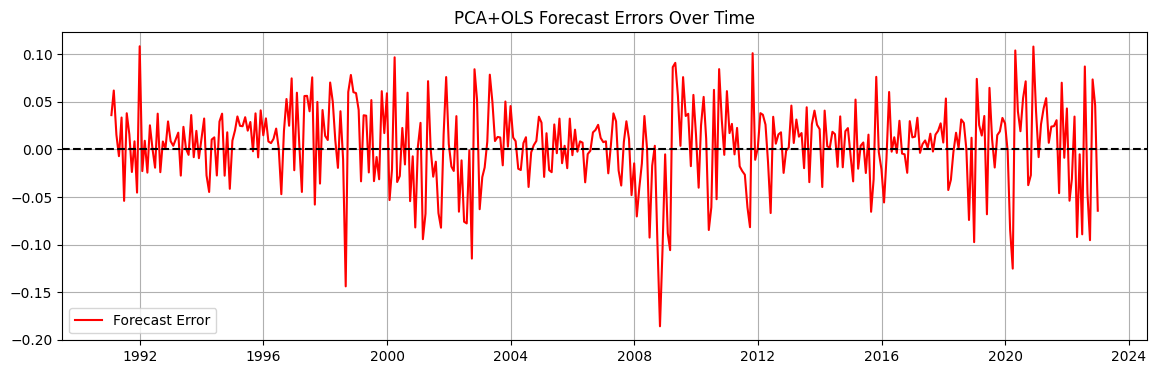

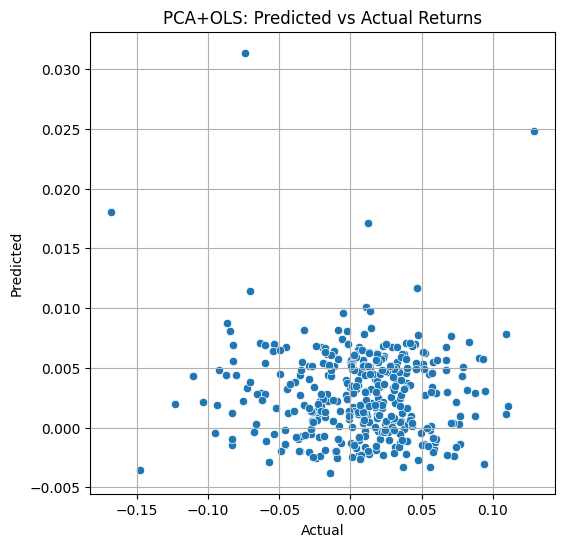


=== Last Window PCA+OLS Summary (on PCs) ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.184
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00588
Time:                        20:25:20   Log-Likelihood:                 1723.8
No. Observations:                1151   AIC:                            -3440.
Df Residuals:                    1147   BIC:                            -3419.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

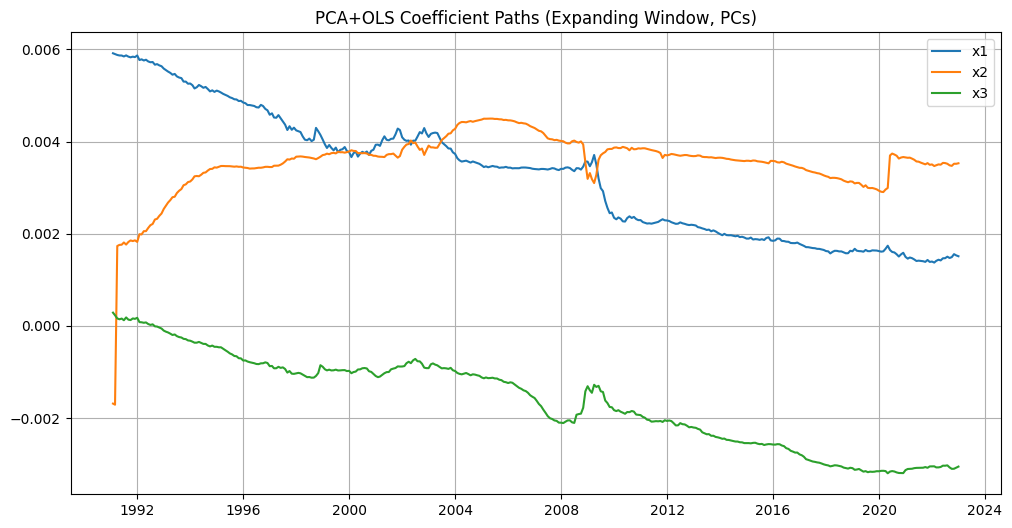

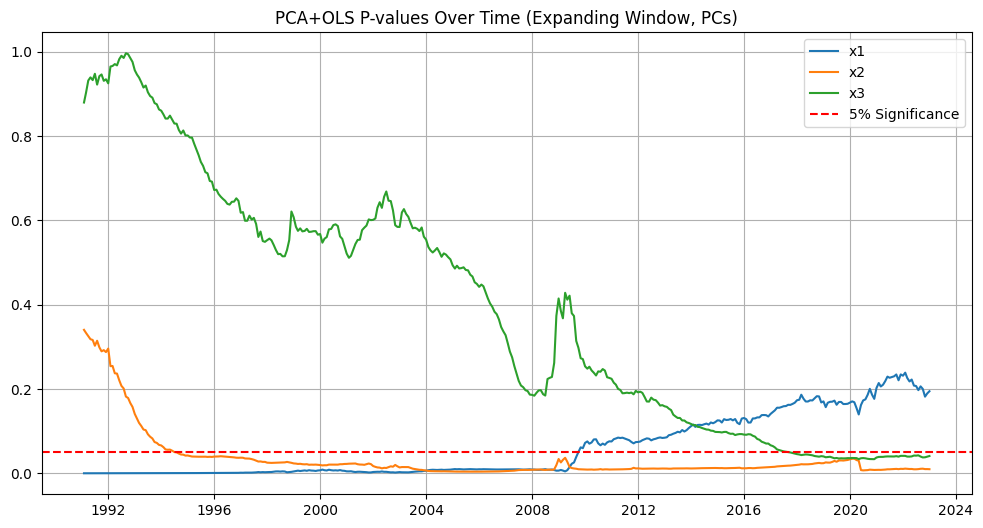

In [ ]:
# ==============================================================================
# PCA+OLS: METRICS (R², MSE, MAE, RMSE, Sharpe)
# ==============================================================================

# Out-of-sample R²
r2_oos_pca = 1 - np.mean((results_pca["Actual"] - results_pca["Predicted"])**2) / np.var(results_pca["Actual"])

# MSE / MAE / RMSE
mse_pca = mean_squared_error(results_pca["Actual"], results_pca["Predicted"])
mae_pca = mean_absolute_error(results_pca["Actual"], results_pca["Predicted"])
rmse_pca = np.sqrt(mse_pca)

# Sharpe (same logic as OLS)
gamma = 3.0
weights_pca = (1 / gamma) * (results_pca["Predicted"] / results_pca["Vol_Lag1"])
weights_pca = weights_pca.clip(-1.5, 1.5)
strategy_ret_pca = weights_pca * results_pca["Actual"]
sharpe_annualized_pca = (strategy_ret_pca.mean() / strategy_ret_pca.std()) * np.sqrt(12)

print("\n=== PCA+OLS FORECAST RESULTS (1991–2022) ===")
print(f"OOS R²:          {r2_oos_pca:.4f}")
print(f"MSE:             {mse_pca:.6f}")
print(f"MAE:             {mae_pca:.6f}")
print(f"RMSE:            {rmse_pca:.6f}")
print(f"Sharpe (ann.):   {sharpe_annualized_pca:.4f}")
print("=============================================")
# ==============================================================================
# PCA+OLS RESIDUAL DIAGNOSTICS (BG & BP)
# ==============================================================================
print("\n--- PCA+OLS Residual Diagnostics (last window model) ---")

bg_stat_pca, bg_pval_pca, _, _ = acorr_breusch_godfrey(model_pca, nlags=12)
bp_stat_pca, bp_pval_pca, _, _ = het_breuschpagan(model_pca.resid, model_pca.model.exog)

print(f"Breusch–Godfrey (12 lags) p-value: {bg_pval_pca:.4f}")
print(f"Breusch–Pagan p-value:             {bp_pval_pca:.4f}")

if bg_pval_pca < 0.05:
    print(">> BG: Evidence of autocorrelation (expected for returns).")
else:
    print(">> BG: No autocorrelation detected.")

if bp_pval_pca < 0.05:
    print(">> BP: Evidence of heteroskedasticity (expected for returns).")
else:
    print(">> BP: No heteroskedasticity detected.")
# ==============================================================================
# PCA+OLS PLOTS – FORECAST vs ACTUAL, ERROR, SCATTER
# ==============================================================================

# Forecast vs Actual
plt.figure(figsize=(14,5))
plt.plot(results_pca["Actual"], label="Actual Excess Return", alpha=0.8)
plt.plot(results_pca["Predicted"], label="Predicted (PCA+OLS)", alpha=0.8)
plt.title("PCA+OLS Forecast vs Actual (1991–2022)")
plt.legend()
plt.grid()
plt.show()

# Error plot
plt.figure(figsize=(14,4))
plt.plot(results_pca["Actual"] - results_pca["Predicted"], label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("PCA+OLS Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_pca["Actual"], y=results_pca["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PCA+OLS: Predicted vs Actual Returns")
plt.grid()
plt.show()
# ==============================================================================
# PCA+OLS COEFFICIENT & P-VALUE PATHS (PCs)
# ==============================================================================

coef_df_pca = pd.DataFrame(coef_records_pca, index=dates_pca)
pval_df_pca = pd.DataFrame(pval_records_pca, index=dates_pca)

print("\n=== Last Window PCA+OLS Summary (on PCs) ===")
print(model_pca.summary())

# Coefficient paths (for PCs)
plt.figure(figsize=(12,6))
for col in coef_df_pca.columns:
    if col != "const":
        plt.plot(coef_df_pca.index, coef_df_pca[col], label=col)
plt.title("PCA+OLS Coefficient Paths (Expanding Window, PCs)")
plt.legend()
plt.grid()
plt.show()

# P-value paths (for PCs)
plt.figure(figsize=(12,6))
for col in pval_df_pca.columns:
    if col != "const":
        plt.plot(pval_df_pca.index, pval_df_pca[col], label=col)
plt.axhline(0.05, color="red", linestyle="--", label="5% Significance")
plt.title("PCA+OLS P-values Over Time (Expanding Window, PCs)")
plt.legend()
plt.grid()
plt.show()



--- RUNNING ROLLING WINDOW PCA+OLS (3 PCs) ---

=== ROLLING PCA+OLS RESULTS ===
OOS R²:        -0.0530
MSE:           0.001876
MAE:           0.032941
RMSE:          0.043316
Sharpe:        0.6488

--- PCA+OLS Residual Diagnostics (Last Window) ---
Breusch-Godfrey p-value: 0.1838
Breusch-Pagan p-value:   0.0001
>> No autocorrelation.
>> Heteroskedasticity detected (expected).


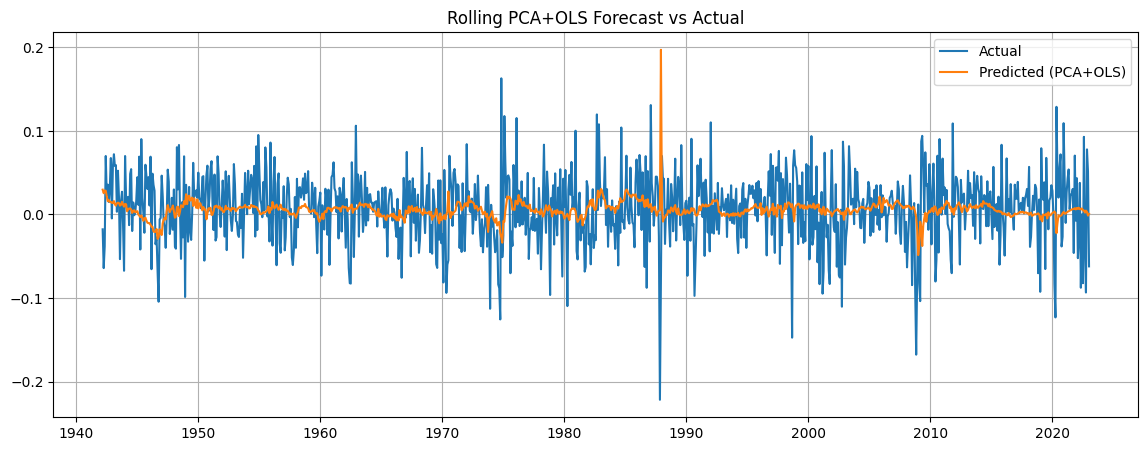

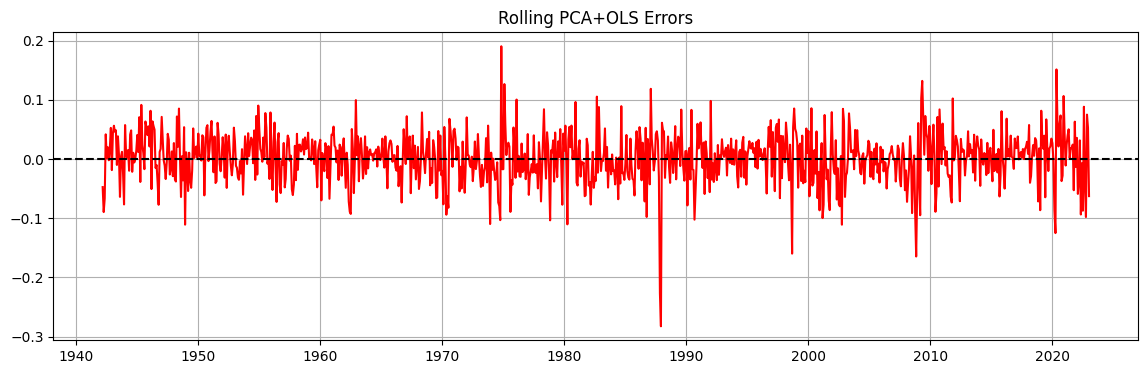

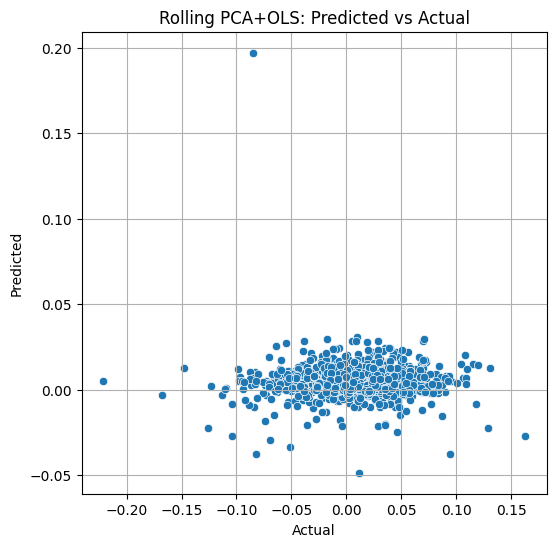


=== Last Window PCA+OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4798
Date:                Fri, 21 Nov 2025   Prob (F-statistic):              0.697
Time:                        01:46:53   Log-Likelihood:                 296.79
No. Observations:                 180   AIC:                            -585.6
Df Residuals:                     176   BIC:                            -572.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

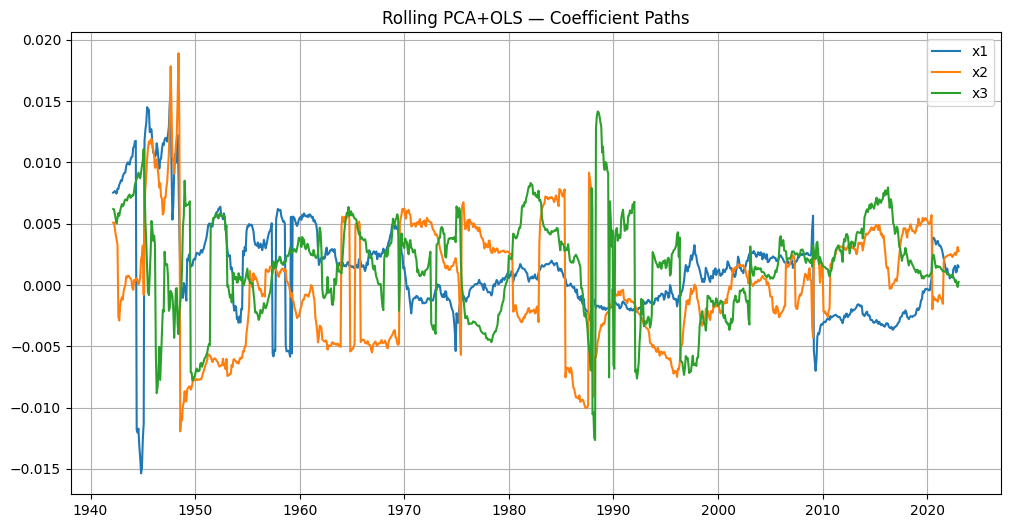

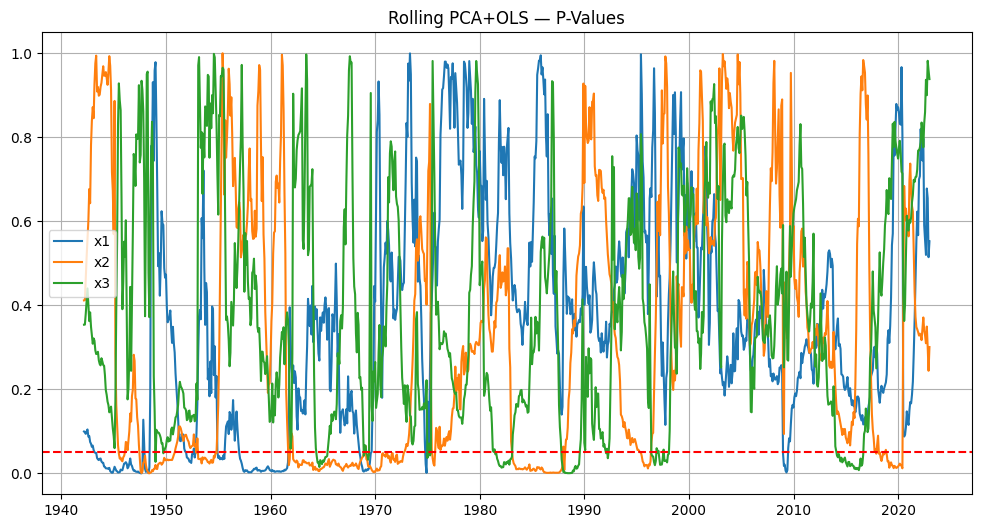

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan
from sklearn.metrics import mean_squared_error, mean_absolute_error

WINDOW = 180  # or 120 / 240
N_PC = 3      # number of principal components

print(f"\n--- RUNNING ROLLING WINDOW PCA+OLS ({N_PC} PCs) ---")

preds_pca, actuals_pca, dates_pca = [], [], []
vol_for_weights_pca = []
residuals_all_pca = []
coef_records_pca, pval_records_pca = [], []

for t in range(WINDOW, len(df_lag)-1):

    # --- Rolling training window ---
    train = df_lag.iloc[t-WINDOW:t]

    X_raw = train[selected_predictors]
    y = train[target_col]

    # === 1. Standardize inside window (no leak) ===
    scaler = StandardScaler().fit(X_raw)
    X_scaled = scaler.transform(X_raw)

    # === 2. PCA inside window (no leak) ===
    pca = PCA(n_components=N_PC).fit(X_scaled)
    Z_train = pca.transform(X_scaled)

    # === 3. OLS on PCs ===
    X_ols = sm.add_constant(Z_train)
    model_pca = sm.OLS(y, X_ols).fit()

    # === 4. Prepare next-month data ===
    X_next_raw = df_lag.iloc[[t+1]][selected_predictors]
    X_next_scaled = scaler.transform(X_next_raw)
    Z_next = pca.transform(X_next_scaled)
    X_next_ols = sm.add_constant(Z_next, has_constant="add")

    # === 5. Predict ===
    pred_next = model_pca.predict(X_next_ols)[0]

    # === Save results ===
    preds_pca.append(pred_next)
    actuals_pca.append(df_lag.iloc[t+1][target_col])
    dates_pca.append(df_lag.index[t+1])
    vol_for_weights_pca.append(df_lag.iloc[t+1]["svar_lag1"])

    residuals_all_pca.append(model_pca.resid.iloc[-1])
    coef_records_pca.append(model_pca.params)
    pval_records_pca.append(model_pca.pvalues)

# Build results DataFrame
results_pca_roll = pd.DataFrame({
    "Actual": actuals_pca,
    "Predicted": preds_pca,
    "Vol_Lag1": vol_for_weights_pca
}, index=dates_pca)
# OOS R²
r2_oos_pca = 1 - np.mean((results_pca_roll["Actual"] - results_pca_roll["Predicted"])**2) / \
                np.var(results_pca_roll["Actual"])

# Errors
mse_pca = mean_squared_error(results_pca_roll["Actual"], results_pca_roll["Predicted"])
mae_pca = mean_absolute_error(results_pca_roll["Actual"], results_pca_roll["Predicted"])
rmse_pca = np.sqrt(mse_pca)

# Strategy Sharpe
gamma = 3.0
weights_pca = (1/gamma) * (results_pca_roll["Predicted"] / results_pca_roll["Vol_Lag1"])
weights_pca = weights_pca.clip(-1.5, 1.5)

strategy_ret_pca = weights_pca * results_pca_roll["Actual"]
sharpe_annualized_pca = (strategy_ret_pca.mean() / strategy_ret_pca.std()) * np.sqrt(12)

print("\n=== ROLLING PCA+OLS RESULTS ===")
print(f"OOS R²:        {r2_oos_pca:.4f}")
print(f"MSE:           {mse_pca:.6f}")
print(f"MAE:           {mae_pca:.6f}")
print(f"RMSE:          {rmse_pca:.6f}")
print(f"Sharpe:        {sharpe_annualized_pca:.4f}")
print("\n--- PCA+OLS Residual Diagnostics (Last Window) ---")

bg_stat, bg_pval, _, _ = acorr_breusch_godfrey(model_pca, nlags=12)
bp_stat, bp_pval, _, _ = het_breuschpagan(model_pca.resid, model_pca.model.exog)

print(f"Breusch-Godfrey p-value: {bg_pval:.4f}")
print(f"Breusch-Pagan p-value:   {bp_pval:.4f}")

if bg_pval < 0.05:
    print(">> Autocorrelation detected (expected).")
else:
    print(">> No autocorrelation.")

if bp_pval < 0.05:
    print(">> Heteroskedasticity detected (expected).")
else:
    print(">> No heteroskedasticity.")
plt.figure(figsize=(14,5))
plt.plot(results_pca_roll["Actual"], label="Actual")
plt.plot(results_pca_roll["Predicted"], label="Predicted (PCA+OLS)")
plt.title("Rolling PCA+OLS Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_pca_roll["Actual"] - results_pca_roll["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Rolling PCA+OLS Errors")
plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_pca_roll["Actual"], y=results_pca_roll["Predicted"])
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Rolling PCA+OLS: Predicted vs Actual")
plt.grid(); plt.show()
coef_df = pd.DataFrame(coef_records_pca, index=dates_pca)
pval_df = pd.DataFrame(pval_records_pca, index=dates_pca)

print("\n=== Last Window PCA+OLS Summary ===")
print(model_pca.summary())

plt.figure(figsize=(12,6))
for col in coef_df.columns:
    if col != "const":
        plt.plot(coef_df.index, coef_df[col], label=col)
plt.title("Rolling PCA+OLS — Coefficient Paths")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,6))
for col in pval_df.columns:
    if col != "const":
        plt.plot(pval_df.index, pval_df[col], label=col)
plt.axhline(0.05, color="red", linestyle="--")
plt.title("Rolling PCA+OLS — P-Values")
plt.legend(); plt.grid(); plt.show()


# ARIMA + GARCH model

In [ ]:
!pip install arch
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 40.2 MB/s eta 0:00:00


In [ ]:
# ==============================================================================
# ARIMA(1,0,0) + GARCH(1,1) — EXPANDING WINDOW FORECAST
# ==============================================================================

print("\n--- RUNNING EXPANDING WINDOW ARIMA(1,0,0) + GARCH(1,1) ---")

train_end_idx = df_lag.index.get_loc(train_df.index[-1])

preds_ag, actuals_ag, dates_ag = [], [], []
var_forecasts_ag = []   # GARCH variance forecasts
residuals_ag_all = []   # last in-sample residual each step for diagnostics

mean_coef_records, mean_pval_records = [], []  # ARIMA coeffs/pvals over time

for t in range(train_end_idx, len(df_lag) - 1):

    # ---------- A. Expand training window ----------
    curr_train = df_lag.iloc[: t + 1]
    y = curr_train[target_col]

    # ---------- B. Mean model: ARIMA(1,0,0) ----------
    arima_model = ARIMA(y, order=(1, 0, 0)).fit()

    # 1-step ahead mean forecast for t+1
    mean_forecast = arima_model.forecast(steps=1)[0]

    # In-sample residuals (drop first NaN)
    resid = arima_model.resid.dropna()

    # ---------- C. Variance model: GARCH(1,1) on residuals ----------
    # If optimizer has trouble, you can rescale: resid * 100
    garch = arch_model(resid, vol='GARCH', p=1, q=1, mean='Zero', rescale=False)
    garch_res = garch.fit(disp='off')

    # 1-step ahead variance forecast for t+1
    garch_fc = garch_res.forecast(horizon=1)
    var_next = garch_fc.variance.iloc[-1, 0]  # σ²_{t+1|t}

    # ---------- D. Store results ----------
    preds_ag.append(mean_forecast)
    actuals_ag.append(df_lag.iloc[t + 1][target_col])
    dates_ag.append(df_lag.index[t + 1])
    var_forecasts_ag.append(var_next)

    # store last residual for diagnostics
    residuals_ag_all.append(arima_model.resid.iloc[-1])

    # store ARIMA coefficients / p-values
    mean_coef_records.append(arima_model.params)
    mean_pval_records.append(arima_model.pvalues)

# Results DataFrame
results_arima_garch = pd.DataFrame({
    "Actual": actuals_ag,
    "Predicted": preds_ag,
    "Var_Forecast": var_forecasts_ag
}, index=dates_ag)



--- RUNNING EXPANDING WINDOW ARIMA(1,0,0) + GARCH(1,1) ---



=== ARIMA(1,0,0)+GARCH(1,1) RESULTS (1991–2022) ===
OOS R²:          -0.0127
MSE:             0.001846
MAE:             0.032522
RMSE:            0.042969
Sharpe (ann.):   0.5189

--- OPTIONAL: ARIMA+GARCH using svar_lag1 variance ---
Sharpe using svar_lag1 instead of GARCH variance: 0.6431
---------------------------------------------------------------

--- ARIMA(1,0,0) Residual Diagnostics (Last Window) ---
Breusch–Pagan skipped: ARIMA has no exogenous regressors.
Breusch–Godfrey (12 lags) p-value: 0.0017
Breusch–Pagan p-value:             nan
>> BG: Evidence of residual autocorrelation (expected for returns).
>> BP: No heteroskedasticity detected.


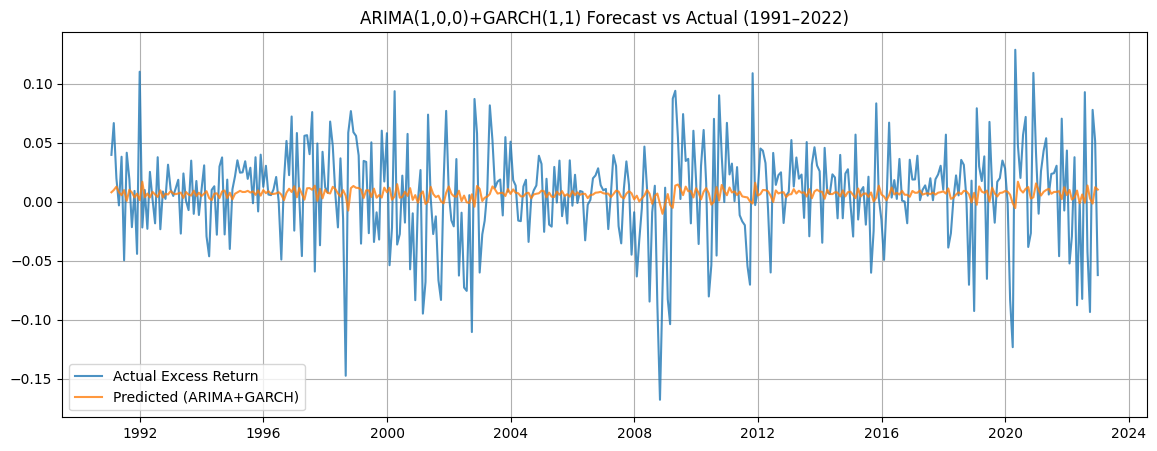

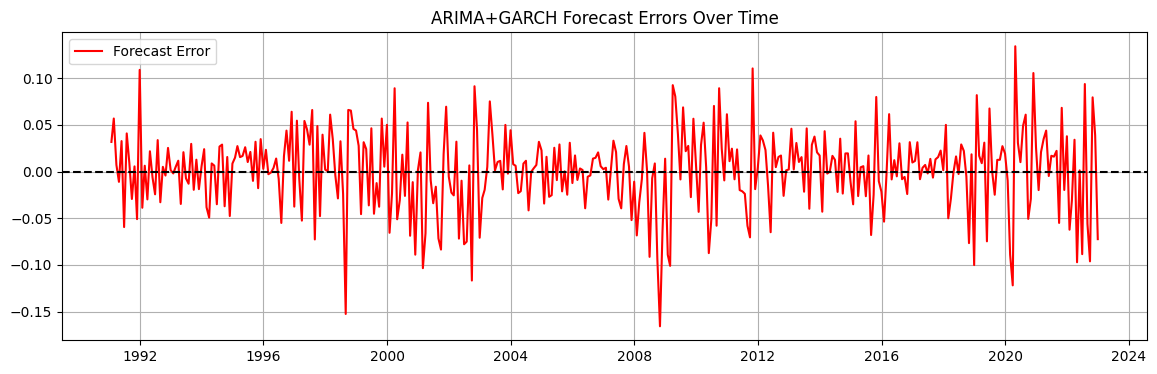

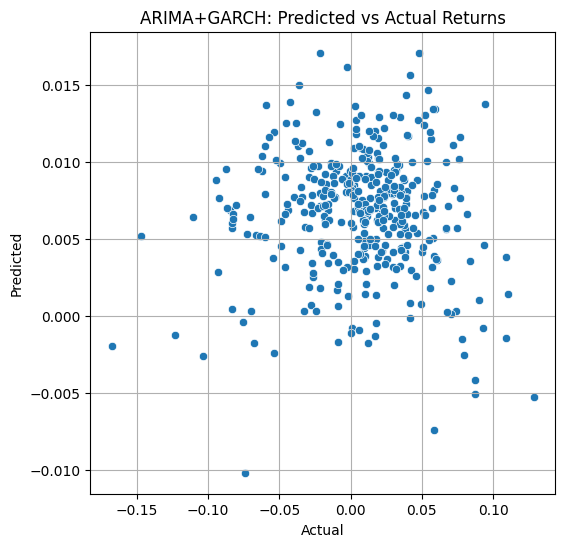

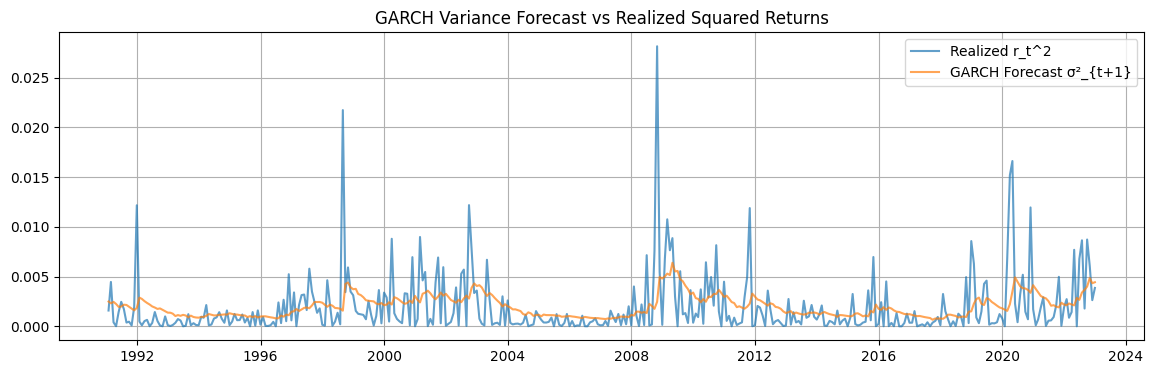


=== Last Window ARIMA(1,0,0) Summary ===
                               SARIMAX Results                                
Dep. Variable:             excess_ret   No. Observations:                 1151
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1721.298
Date:                Fri, 21 Nov 2025   AIC                          -3436.595
Time:                        00:38:22   BIC                          -3421.450
Sample:                    01-31-1927   HQIC                         -3430.879
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.002      3.881      0.000       0.003       0.010
ar.L1          0.0803      0.016      5.142      0.000       0.050       0.111
sigma2    

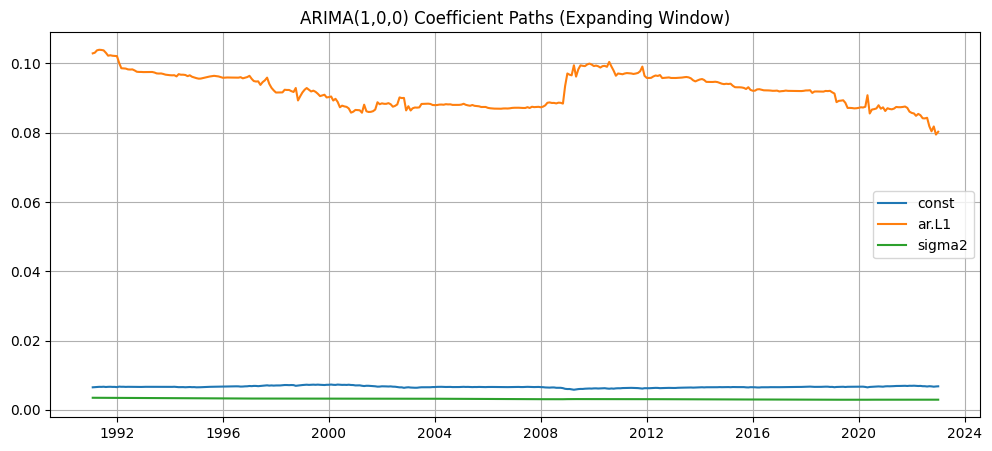

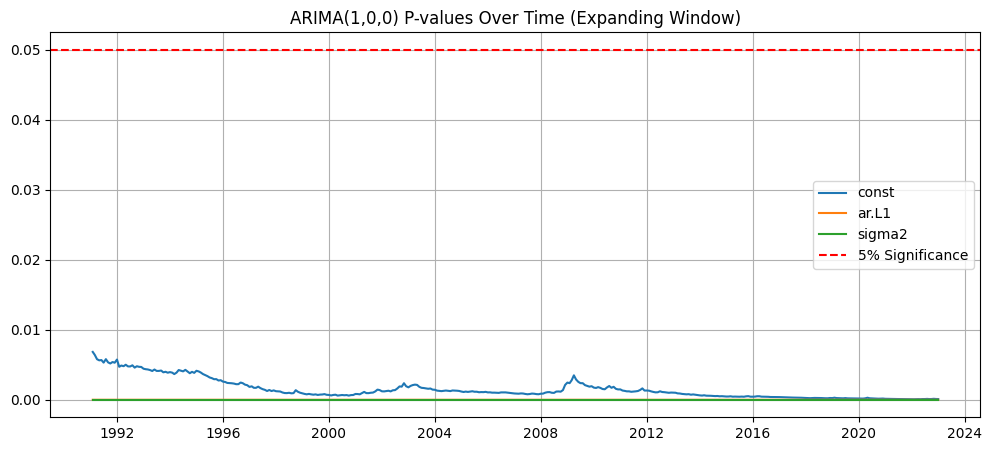

In [ ]:
# ==============================================================================
# ARIMA+GARCH: METRICS
# ==============================================================================

# OOS R²
r2_oos_ag = 1 - np.mean((results_arima_garch["Actual"] - results_arima_garch["Predicted"])**2) \
                / np.var(results_arima_garch["Actual"])

# MSE / MAE / RMSE
mse_ag = mean_squared_error(results_arima_garch["Actual"], results_arima_garch["Predicted"])
mae_ag = mean_absolute_error(results_arima_garch["Actual"], results_arima_garch["Predicted"])
rmse_ag = np.sqrt(mse_ag)

# Sharpe using ARIMA mean & GARCH variance
gamma = 3.0
weights_ag = (1 / gamma) * (results_arima_garch["Predicted"] / results_arima_garch["Var_Forecast"])
weights_ag = weights_ag.clip(-1.5, 1.5)

strategy_ret_ag = weights_ag * results_arima_garch["Actual"]
sharpe_annualized_ag = (strategy_ret_ag.mean() / strategy_ret_ag.std()) * np.sqrt(12)
print("\n=== ARIMA(1,0,0)+GARCH(1,1) RESULTS (1991–2022) ===")
print(f"OOS R²:                    {r2_oos_ag:.4f}")
print(f"MSE:                       {mse_ag:.6f}")
print(f"MAE:                       {mae_ag:.6f}")
print(f"RMSE:                      {rmse_ag:.6f}")
print(f"Sharpe (GARCH variance):   {sharpe_annualized_ag:.4f}")
print(f"Sharpe (svar_lag1):        {sharpe_ag_lag1:.4f}")
print("====================================================")

# ================================================================
# OPTIONAL COMPARISON: Replace GARCH variance with svar_lag1
# to show whether using HAR/ML-style volatility changes Sharpe.
# ================================================================

print("\n--- OPTIONAL: ARIMA+GARCH using svar_lag1 variance ---")

# 1. Align svar_lag1 with the ARIMA+GARCH result dates
vol_lag1 = df_lag.loc[results_arima_garch.index, "svar_lag1"]

# 2. Recompute strategy with svar_lag1 instead of GARCH sigma²
gamma = 3.0
weights_ag_lag1 = (1 / gamma) * (results_arima_garch["Predicted"] / vol_lag1)
weights_ag_lag1 = weights_ag_lag1.clip(-1.5, 1.5)

strategy_ret_ag_lag1 = weights_ag_lag1 * results_arima_garch["Actual"]

sharpe_ag_lag1 = (
    strategy_ret_ag_lag1.mean() / strategy_ret_ag_lag1.std()
) * np.sqrt(12)

print(f"Sharpe using svar_lag1 instead of GARCH variance: {sharpe_ag_lag1:.4f}")
print("---------------------------------------------------------------")

# ==============================================================================
# ARIMA MEAN MODEL DIAGNOSTICS (BG & BP on last window)
# ==============================================================================

print("\n--- ARIMA(1,0,0) Residual Diagnostics (Last Window) ---")
# arima_model from last loop iteration is still in memory
bg_stat_ag, bg_pval_ag, _, _ = acorr_breusch_godfrey(arima_model, nlags=12)
print("Breusch–Pagan skipped: ARIMA has no exogenous regressors.")
bp_pval_ag = np.nan


print(f"Breusch–Godfrey (12 lags) p-value: {bg_pval_ag:.4f}")
print(f"Breusch–Pagan p-value:             {bp_pval_ag:.4f}")

if bg_pval_ag < 0.05:
    print(">> BG: Evidence of residual autocorrelation (expected for returns).")
else:
    print(">> BG: No autocorrelation detected.")

if bp_pval_ag < 0.05:
    print(">> BP: Evidence of heteroskedasticity (expected; GARCH is modeling it).")
else:
    print(">> BP: No heteroskedasticity detected.")
# ==============================================================================
# ARIMA+GARCH: PLOTS
# ==============================================================================

# Forecast vs Actual
plt.figure(figsize=(14,5))
plt.plot(results_arima_garch["Actual"], label="Actual Excess Return", alpha=0.8)
plt.plot(results_arima_garch["Predicted"], label="Predicted (ARIMA+GARCH)", alpha=0.8)
plt.title("ARIMA(1,0,0)+GARCH(1,1) Forecast vs Actual (1991–2022)")
plt.legend()
plt.grid()
plt.show()

# Error plot
plt.figure(figsize=(14,4))
plt.plot(results_arima_garch["Actual"] - results_arima_garch["Predicted"],
         label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("ARIMA+GARCH Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_arima_garch["Actual"], y=results_arima_garch["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("ARIMA+GARCH: Predicted vs Actual Returns")
plt.grid()
plt.show()

# Variance forecast vs realized squared returns
realized_var = results_arima_garch["Actual"]**2

plt.figure(figsize=(14,4))
plt.plot(results_arima_garch.index, realized_var, label="Realized r_t^2", alpha=0.7)
plt.plot(results_arima_garch.index, results_arima_garch["Var_Forecast"],
         label="GARCH Forecast σ²_{t+1}", alpha=0.7)
plt.title("GARCH Variance Forecast vs Realized Squared Returns")
plt.legend()
plt.grid()
plt.show()
# ==============================================================================
# ARIMA(1,0,0) COEFFICIENT & P-VALUE PATHS
# ==============================================================================

coef_df_ag = pd.DataFrame(mean_coef_records, index=dates_ag)
pval_df_ag = pd.DataFrame(mean_pval_records, index=dates_ag)

print("\n=== Last Window ARIMA(1,0,0) Summary ===")
print(arima_model.summary())

# Coefficient paths (const and ar.L1)
plt.figure(figsize=(12,5))
for col in coef_df_ag.columns:
    plt.plot(coef_df_ag.index, coef_df_ag[col], label=col)
plt.title("ARIMA(1,0,0) Coefficient Paths (Expanding Window)")
plt.legend()
plt.grid()
plt.show()

# P-value paths
plt.figure(figsize=(12,5))
for col in pval_df_ag.columns:
    plt.plot(pval_df_ag.index, pval_df_ag[col], label=col)
plt.axhline(0.05, color="red", linestyle="--", label="5% Significance")
plt.title("ARIMA(1,0,0) P-values Over Time (Expanding Window)")
plt.legend()
plt.grid()
plt.show()



--- RUNNING ROLLING WINDOW ARIMA(1,0,0) + GARCH(1,1) (window=180) ---

=== Rolling ARIMA+GARCH Results ===
OOS R²:    -0.012634
MSE:       0.001804
MAE:       0.032542
RMSE:      0.042478
Sharpe:    0.488001

--- Sharpe using svar_lag1 instead of GARCH sigma² ---
Sharpe (svar_lag1): 0.595323

--- Residual Diagnostics (Last Rolling Window) ---
Breusch-Godfrey p = 0.2058
Breusch-Pagan skipped (no exog).
>> No autocorrelation.


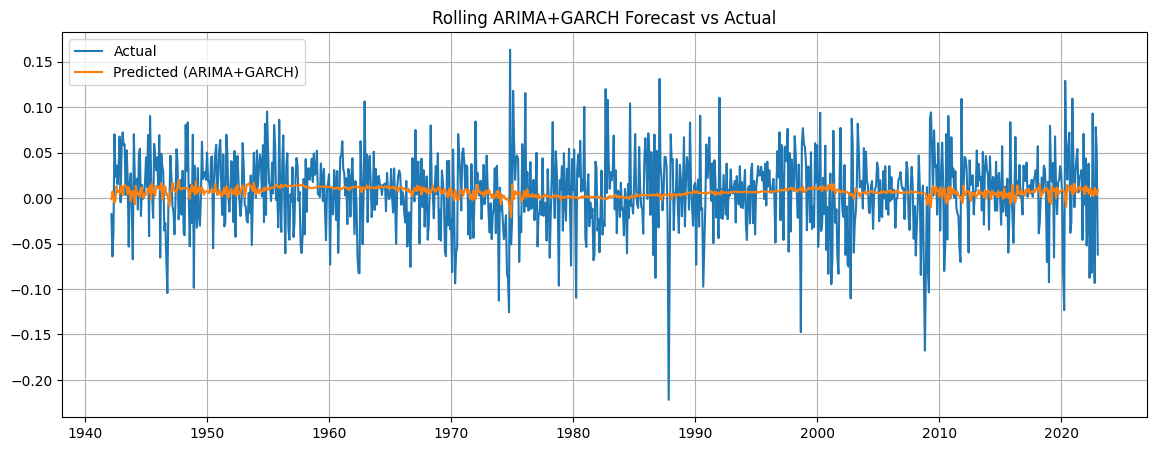

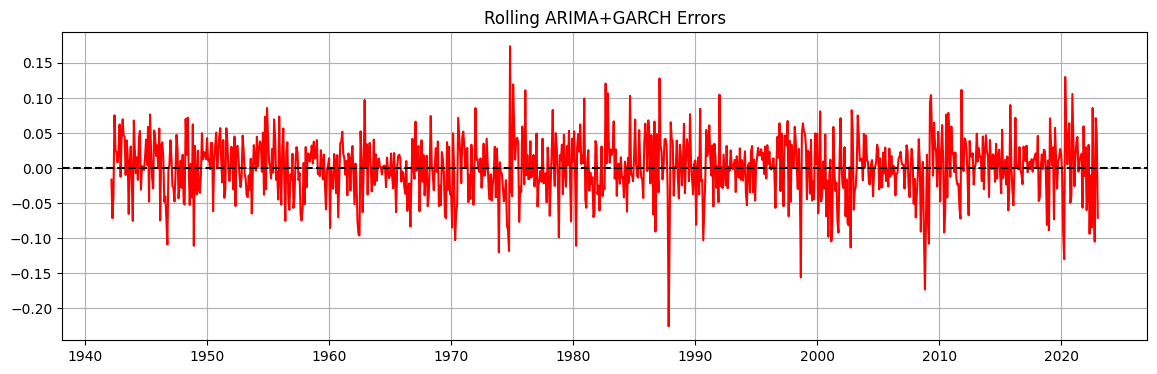

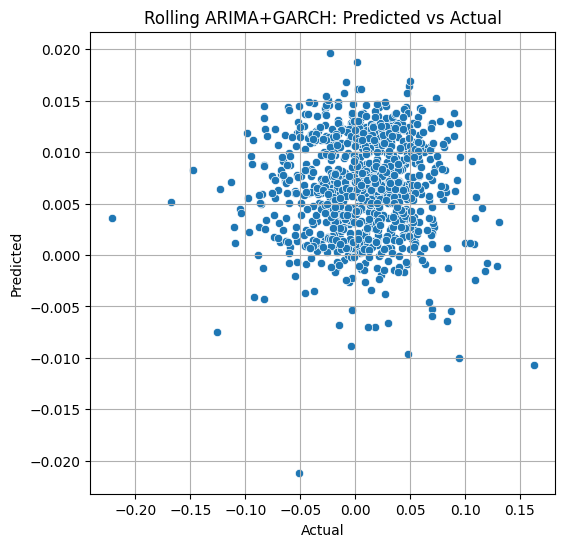


=== Last Rolling Window ARIMA Summary ===
                               SARIMAX Results                                
Dep. Variable:             excess_ret   No. Observations:                  180
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 296.087
Date:                Fri, 21 Nov 2025   AIC                           -586.173
Time:                        01:49:37   BIC                           -576.595
Sample:                    11-30-2007   HQIC                          -582.290
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.004      1.788      0.074      -0.001       0.016
ar.L1          0.0180      0.061      0.298      0.766      -0.101       0.137
sigma2   

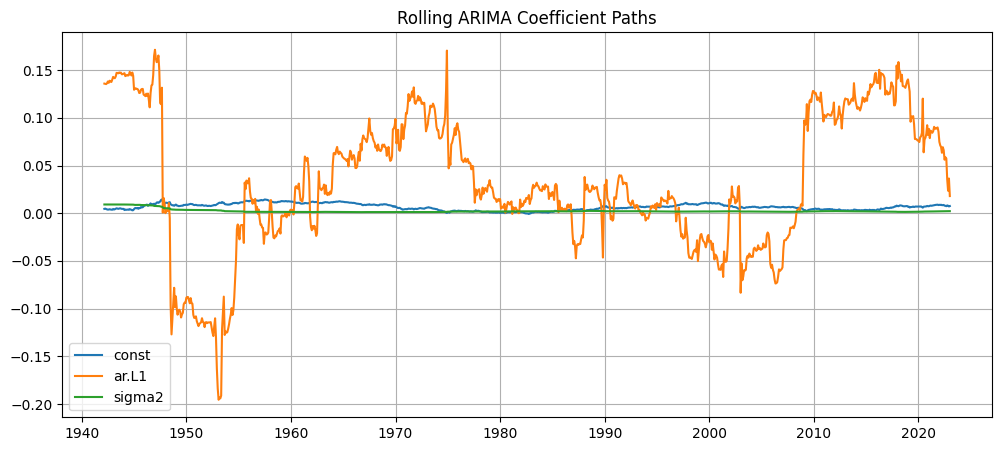

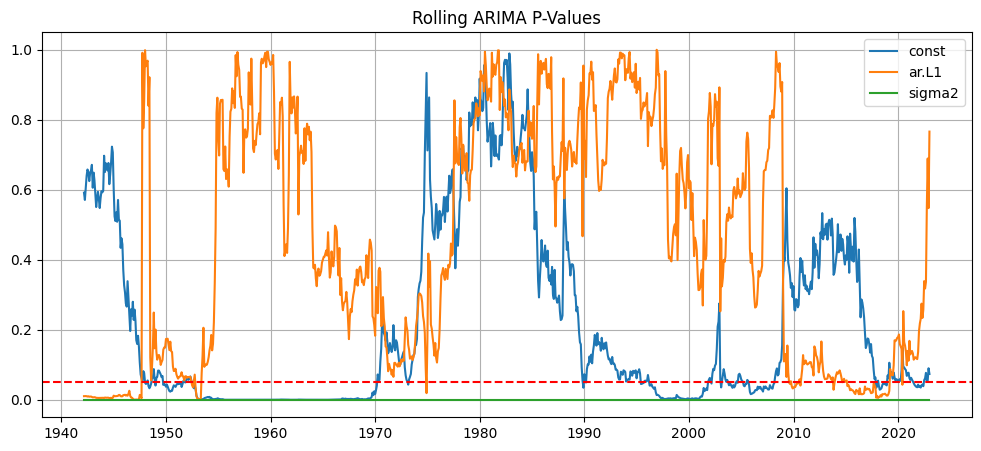

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error, mean_absolute_error

WINDOW = 180   # choose 120 / 180 / 240

print(f"\n--- RUNNING ROLLING WINDOW ARIMA(1,0,0) + GARCH(1,1) (window={WINDOW}) ---")

preds_ag, actuals_ag, dates_ag = [], [], []
var_forecasts_ag = []
residuals_ag_all = []

mean_coef_records, mean_pval_records = [], []

for t in range(WINDOW, len(df_lag)-1):

    # ==============================
    # 1. Rolling training window
    # ==============================
    train = df_lag.iloc[t-WINDOW:t]
    y = train[target_col]

    # ==============================
    # 2. Fit ARIMA mean model
    # ==============================
    arima_model = ARIMA(y, order=(1,0,0)).fit()

    # → One-step-ahead forecast
    mean_fc = arima_model.forecast(steps=1)[0]

    # residuals for GARCH
    resid = arima_model.resid.dropna()

    # ==============================
    # 3. Fit GARCH(1,1) to residuals
    # ==============================
    garch = arch_model(resid, vol="GARCH", p=1, q=1, mean="Zero", rescale=False)
    garch_res = garch.fit(disp="off")

    # → One-step-ahead variance forecast
    garch_fc = garch_res.forecast(horizon=1)
    var_next = garch_fc.variance.iloc[-1, 0]

    # ==============================
    # 4. Store results
    # ==============================
    preds_ag.append(mean_fc)
    actuals_ag.append(df_lag.iloc[t+1][target_col])
    dates_ag.append(df_lag.index[t+1])
    var_forecasts_ag.append(var_next)

    residuals_ag_all.append(arima_model.resid.iloc[-1])
    mean_coef_records.append(arima_model.params)
    mean_pval_records.append(arima_model.pvalues)

# ============================================
# Build rolling results DataFrame
# ============================================
results_arima_garch_roll = pd.DataFrame({
    "Actual": actuals_ag,
    "Predicted": preds_ag,
    "Var_Forecast": var_forecasts_ag
}, index=dates_ag)
# R² OOS
r2_ag = 1 - np.mean((results_arima_garch_roll["Actual"] -
                     results_arima_garch_roll["Predicted"])**2) / \
            np.var(results_arima_garch_roll["Actual"])

mse_ag = mean_squared_error(results_arima_garch_roll["Actual"],
                            results_arima_garch_roll["Predicted"])
mae_ag = mean_absolute_error(results_arima_garch_roll["Actual"],
                             results_arima_garch_roll["Predicted"])
rmse_ag = np.sqrt(mse_ag)

# Strategy (GARCH sigma²)
gamma = 3
weights_ag = (1/gamma) * (results_arima_garch_roll["Predicted"] /
                           results_arima_garch_roll["Var_Forecast"])
weights_ag = weights_ag.clip(-1.5, 1.5)

strategy_ag = weights_ag * results_arima_garch_roll["Actual"]
sharpe_ag = (strategy_ag.mean() / strategy_ag.std()) * np.sqrt(12)

print("\n=== Rolling ARIMA+GARCH Results ===")
print(f"OOS R²:    {r2_ag:.6f}")
print(f"MSE:       {mse_ag:.6f}")
print(f"MAE:       {mae_ag:.6f}")
print(f"RMSE:      {rmse_ag:.6f}")
print(f"Sharpe:    {sharpe_ag:.6f}")
print("\n--- Sharpe using svar_lag1 instead of GARCH sigma² ---")

vol_proxy = df_lag.loc[results_arima_garch_roll.index, "svar_lag1"]

weights_sv = (1/gamma) * (results_arima_garch_roll["Predicted"] / vol_proxy)
weights_sv = weights_sv.clip(-1.5, 1.5)

strat_sv = weights_sv * results_arima_garch_roll["Actual"]
sharpe_sv = (strat_sv.mean() / strat_sv.std()) * np.sqrt(12)

print(f"Sharpe (svar_lag1): {sharpe_sv:.6f}")
print("\n--- Residual Diagnostics (Last Rolling Window) ---")
bg_stat, bg_pval, _, _ = acorr_breusch_godfrey(arima_model, nlags=12)

print(f"Breusch-Godfrey p = {bg_pval:.4f}")
print("Breusch-Pagan skipped (no exog).")

if bg_pval < 0.05:
    print(">> Autocorrelation detected (expected).")
else:
    print(">> No autocorrelation.")
plt.figure(figsize=(14,5))
plt.plot(results_arima_garch_roll["Actual"], label="Actual")
plt.plot(results_arima_garch_roll["Predicted"], label="Predicted (ARIMA+GARCH)")
plt.title("Rolling ARIMA+GARCH Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_arima_garch_roll["Actual"] - results_arima_garch_roll["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Rolling ARIMA+GARCH Errors")
plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_arima_garch_roll["Actual"],
                y=results_arima_garch_roll["Predicted"])
plt.title("Rolling ARIMA+GARCH: Predicted vs Actual")
plt.grid(); plt.show()
coef_df_ag = pd.DataFrame(mean_coef_records, index=dates_ag)
pval_df_ag = pd.DataFrame(mean_pval_records, index=dates_ag)

print("\n=== Last Rolling Window ARIMA Summary ===")
print(arima_model.summary())

plt.figure(figsize=(12,5))
for col in coef_df_ag.columns:
    plt.plot(coef_df_ag.index, coef_df_ag[col], label=col)
plt.title("Rolling ARIMA Coefficient Paths")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,5))
for col in pval_df_ag.columns:
    plt.plot(pval_df_ag.index, pval_df_ag[col], label=col)
plt.axhline(0.05, color="red", linestyle="--")
plt.title("Rolling ARIMA P-Values")
plt.legend(); plt.grid(); plt.show()


# HAR model


--- RUNNING EXPANDING WINDOW HAR MODEL ---

=== HAR MODEL RESULTS (1991–2022) ===
OOS R²:          -0.0260
MSE:             0.001871
MAE:             0.032645
RMSE:            0.043251
Sharpe (ann.):   0.5128

--- HAR Residual Diagnostics (Last Window) ---
Breusch–Godfrey (12 lags) p-value: 0.0107
Breusch–Pagan skipped: HAR has no exogenous regressors.
BP p-value: nan
>> BG: Evidence of autocorrelation (expected).


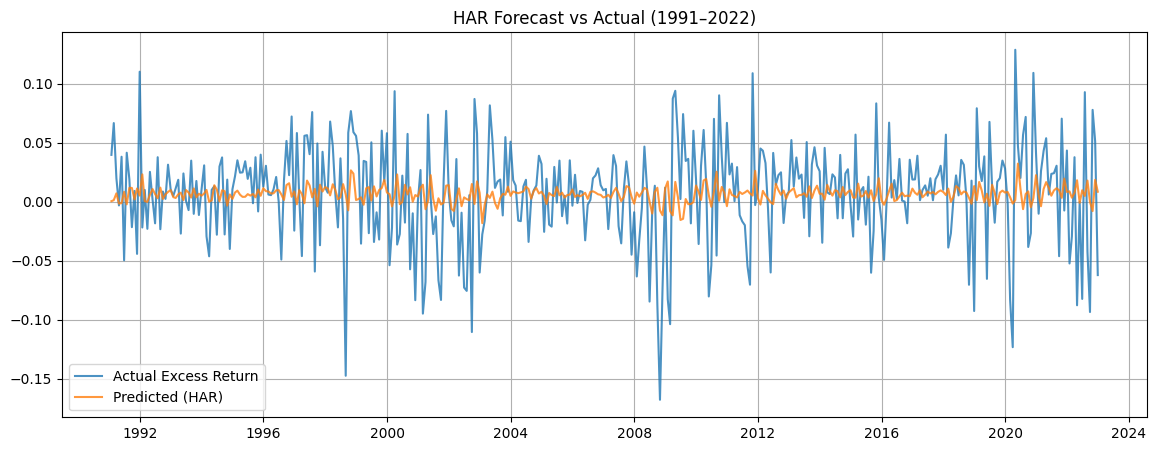

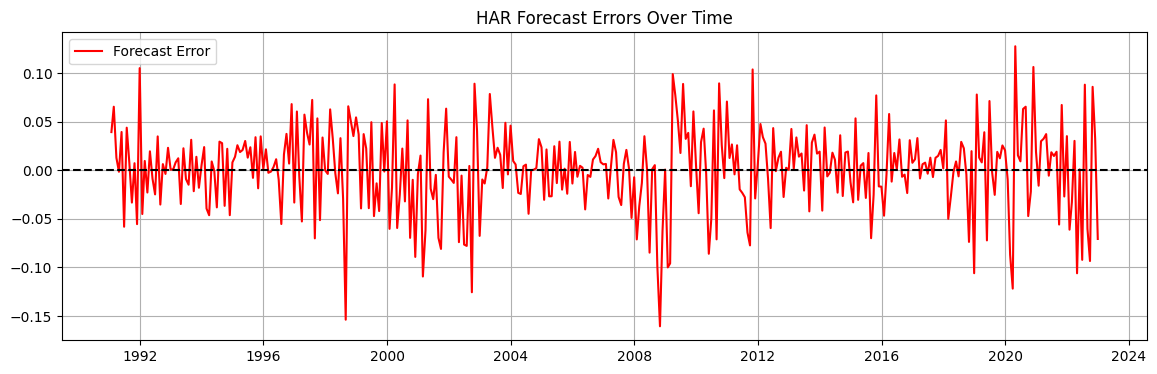

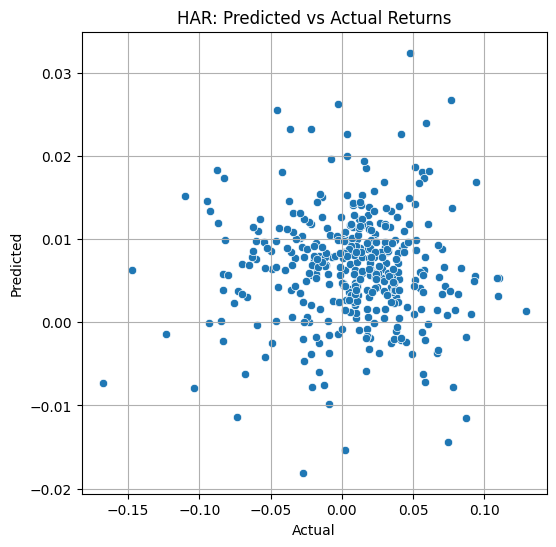

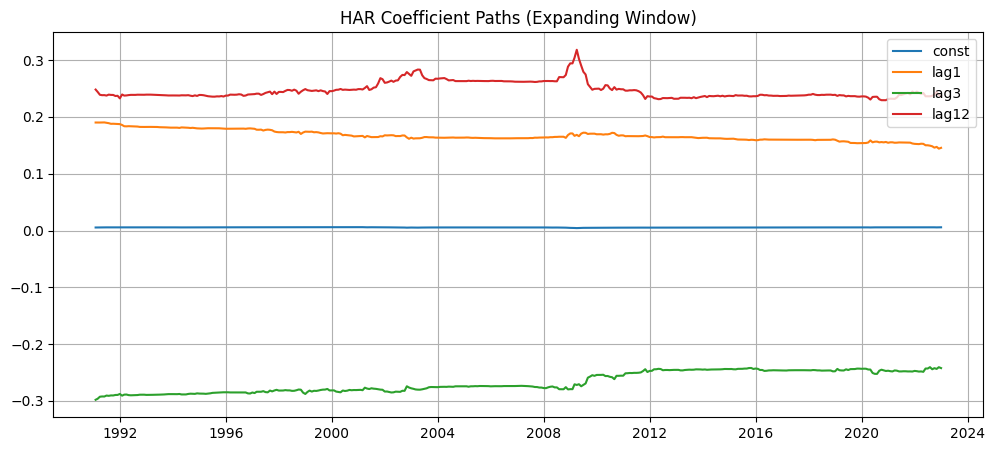

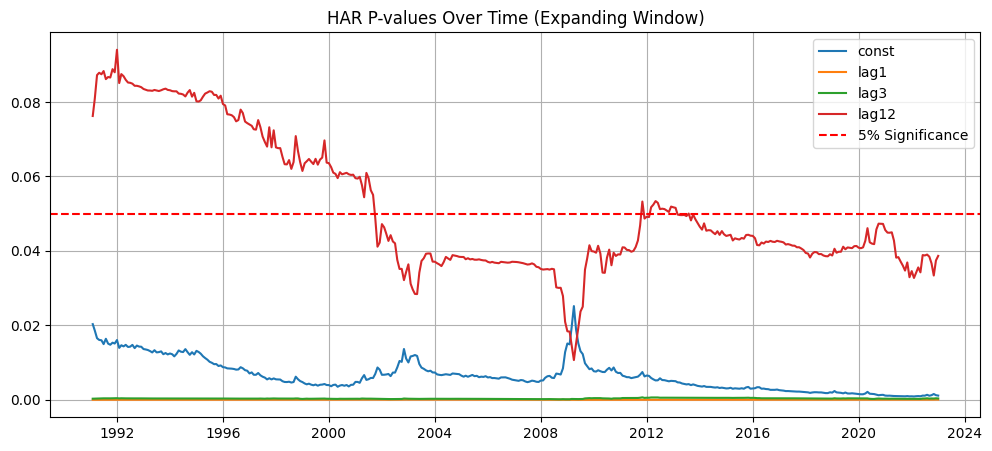


=== Last Window HAR Summary ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.957
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           0.000122
Time:                        00:36:00   Log-Likelihood:                 1707.5
No. Observations:                1139   AIC:                            -3407.
Df Residuals:                    1135   BIC:                            -3387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.00

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ============================================================
# 1. PREPARE HAR FEATURES (Monthly Equivalent: 1, 3, 12)
# ============================================================

df_har = df_lag.copy()  # use same dataframe

# HAR lags based on target_col (e.g., "excess_ret")
df_har["lag1"] = df_har[target_col].shift(1)
df_har["lag3"] = df_har[target_col].rolling(3).mean().shift(1)
df_har["lag12"] = df_har[target_col].rolling(12).mean().shift(1)

har_features = ["lag1", "lag3", "lag12"]

df_har = df_har.dropna().copy()

# ============================================================
# 2. EXPANDING-WINDOW HAR FORECAST
# ============================================================

print("\n--- RUNNING EXPANDING WINDOW HAR MODEL ---")

train_end_idx = df_har.index.get_loc(train_df.index[-1])

preds_har, actuals_har, dates_har = [], [], []
coef_records, pval_records = [], []

for t in range(train_end_idx, len(df_har) - 1):

    # expanding window up to t
    curr_train = df_har.iloc[: t + 1]

    X = curr_train[har_features]
    y = curr_train[target_col]

    X_const = add_constant(X)

    model = OLS(y, X_const).fit()

    # 1-step-ahead forecast
    X_next = df_har.iloc[[t + 1]][har_features]

    # Add constant & ensure same column order as model.exog
    X_next_const = add_constant(X_next, has_constant='add')
    X_next_const = X_next_const[model.params.index]   # align columns

    pred = model.predict(X_next_const)[0]

    preds_har.append(pred)
    actuals_har.append(df_har.iloc[t + 1][target_col])
    dates_har.append(df_har.index[t + 1])

    coef_records.append(model.params)
    pval_records.append(model.pvalues)

# Results DataFrame
results_har = pd.DataFrame({
    "Actual": actuals_har,
    "Predicted": preds_har
}, index=dates_har)

# Attach volatility proxy (same as OLS / ML models)
results_har["Vol_Lag1"] = df_lag.loc[results_har.index, "svar_lag1"]

# ============================================================
# 3. METRICS (Aligned with OLS / ML weight rule)
# ============================================================

# OOS R²
r2_oos_har = 1 - np.mean((results_har["Actual"] - results_har["Predicted"])**2) \
                / np.var(results_har["Actual"])

# Errors
mse_har = mean_squared_error(results_har["Actual"], results_har["Predicted"])
mae_har = mean_absolute_error(results_har["Actual"], results_har["Predicted"])
rmse_har = np.sqrt(mse_har)

# Portfolio weights: (1/gamma) * Predicted / Vol_Lag1, clipped to [-1.5, 1.5]
gamma = 3.0
weights_har = (1 / gamma) * (results_har["Predicted"] / results_har["Vol_Lag1"])

# Guard against division issues
weights_har = weights_har.replace([np.inf, -np.inf], np.nan).fillna(0.0)

weights_har = weights_har.clip(-1.5, 1.5)

strategy_ret_har = weights_har * results_har["Actual"]
sharpe_annualized_har = (strategy_ret_har.mean() / strategy_ret_har.std()) * np.sqrt(12)

print("\n=== HAR MODEL RESULTS (1991–2022) ===")
print(f"OOS R²:          {r2_oos_har:.4f}")
print(f"MSE:             {mse_har:.6f}")
print(f"MAE:             {mae_har:.6f}")
print(f"RMSE:            {rmse_har:.6f}")
print(f"Sharpe (ann.):   {sharpe_annualized_har:.4f}")
print("====================================================")

# ============================================================
# 4. LAST-WINDOW DIAGNOSTICS
# ============================================================

print("\n--- HAR Residual Diagnostics (Last Window) ---")

bg_stat_h, bg_pval_h, _, _ = acorr_breusch_godfrey(model, nlags=12)

print(f"Breusch–Godfrey (12 lags) p-value: {bg_pval_h:.4f}")
print("Breusch–Pagan skipped: HAR has no exogenous regressors.")
print("BP p-value: nan")

if bg_pval_h < 0.05:
    print(">> BG: Evidence of autocorrelation (expected).")
else:
    print(">> BG: No autocorrelation detected.")

# ============================================================
# 5. PLOTS
# ============================================================

# Forecast vs Actual
plt.figure(figsize=(14,5))
plt.plot(results_har["Actual"], label="Actual Excess Return", alpha=0.8)
plt.plot(results_har["Predicted"], label="Predicted (HAR)", alpha=0.8)
plt.title("HAR Forecast vs Actual (1991–2022)")
plt.legend()
plt.grid()
plt.show()

# Error plot
plt.figure(figsize=(14,4))
plt.plot(results_har["Actual"] - results_har["Predicted"],
         label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("HAR Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_har["Actual"], y=results_har["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("HAR: Predicted vs Actual Returns")
plt.grid()
plt.show()

# Coefficient paths
coef_df_har = pd.DataFrame(coef_records, index=dates_har)
pval_df_har = pd.DataFrame(pval_records, index=dates_har)

plt.figure(figsize=(12,5))
for col in coef_df_har.columns:
    plt.plot(coef_df_har.index, coef_df_har[col], label=col)
plt.title("HAR Coefficient Paths (Expanding Window)")
plt.legend()
plt.grid()
plt.show()

# P-value paths
plt.figure(figsize=(12,5))
for col in pval_df_har.columns:
    plt.plot(pval_df_har.index, pval_df_har[col], label=col)
plt.axhline(0.05, color="red", linestyle="--", label="5% Significance")
plt.title("HAR P-values Over Time (Expanding Window)")
plt.legend()
plt.grid()
plt.show()

print("\n=== Last Window HAR Summary ===")
print(model.summary())



--- RUNNING ROLLING WINDOW HAR MODEL (window=180) ---

=== Rolling HAR Results ===
OOS R²:    -0.043010
MSE:       0.001856
MAE:       0.032855
RMSE:      0.043077
Sharpe:    0.354602

--- HAR Residual Diagnostics (Last Rolling Window) ---
Breusch–Godfrey p = 0.1279
Breusch–Pagan skipped (no exogenous regressors).


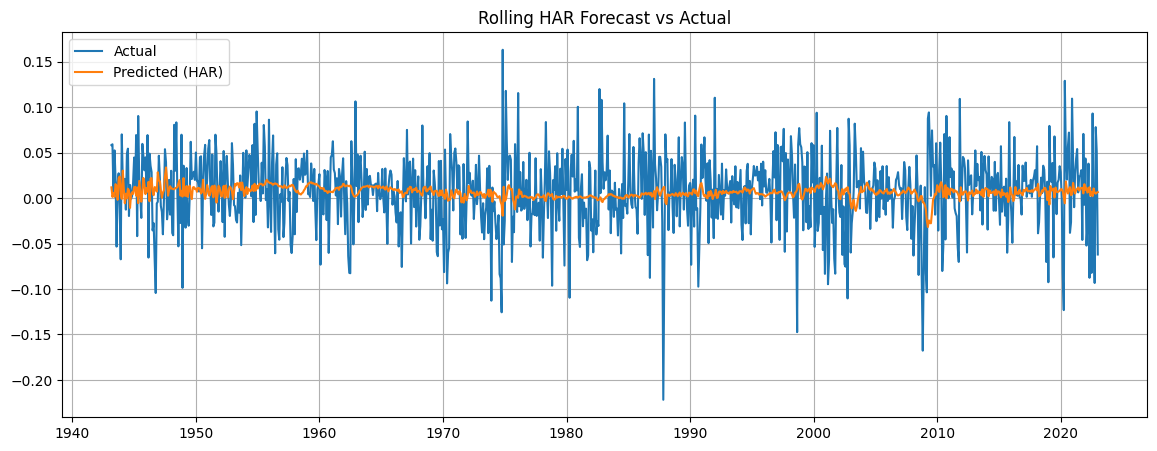

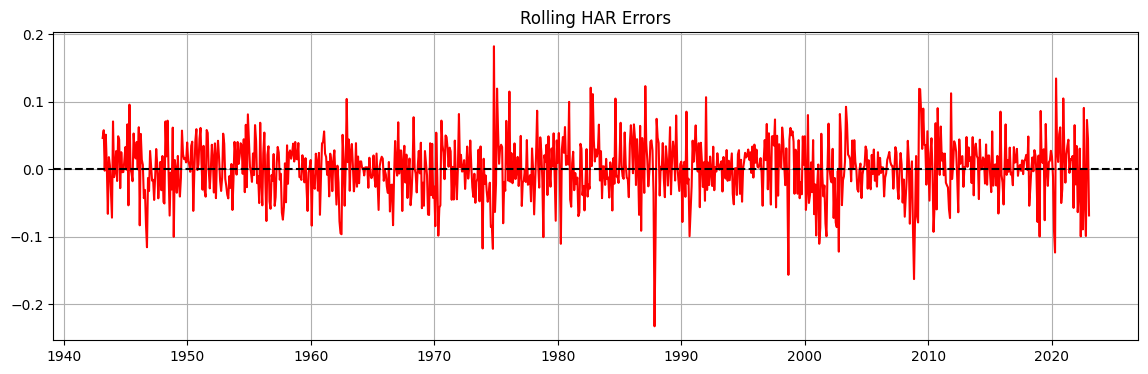

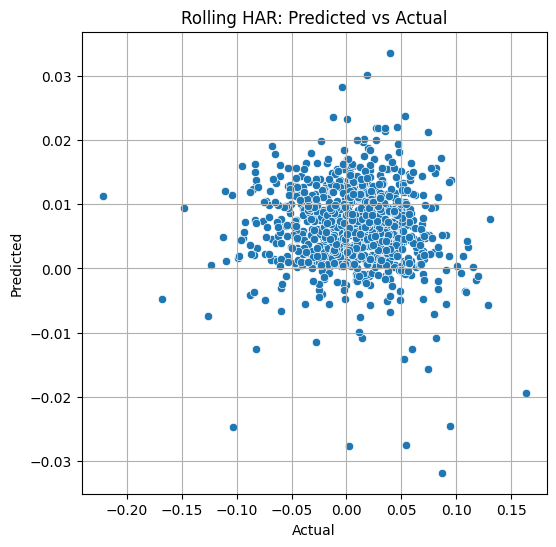


=== Last Rolling Window HAR Summary ===
                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.07952
Date:                Fri, 21 Nov 2025   Prob (F-statistic):              0.971
Time:                        01:54:41   Log-Likelihood:                 296.18
No. Observations:                 180   AIC:                            -584.4
Df Residuals:                     176   BIC:                            -571.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

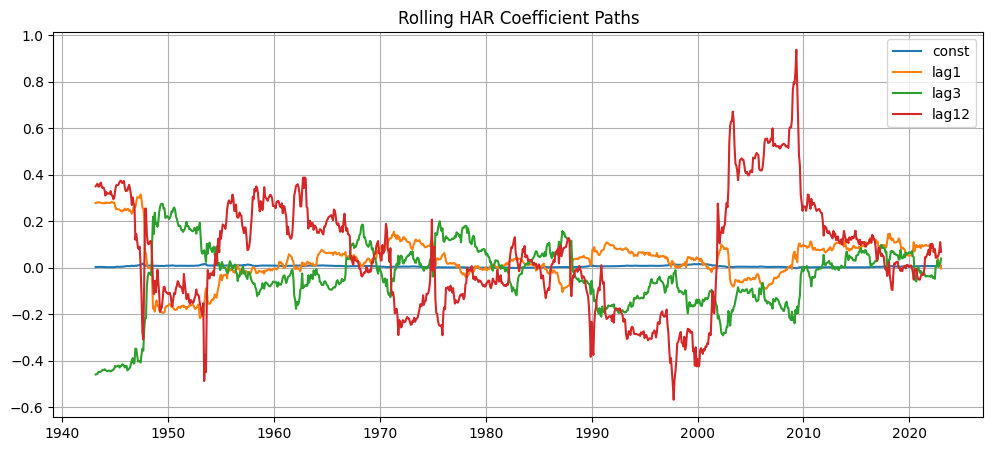

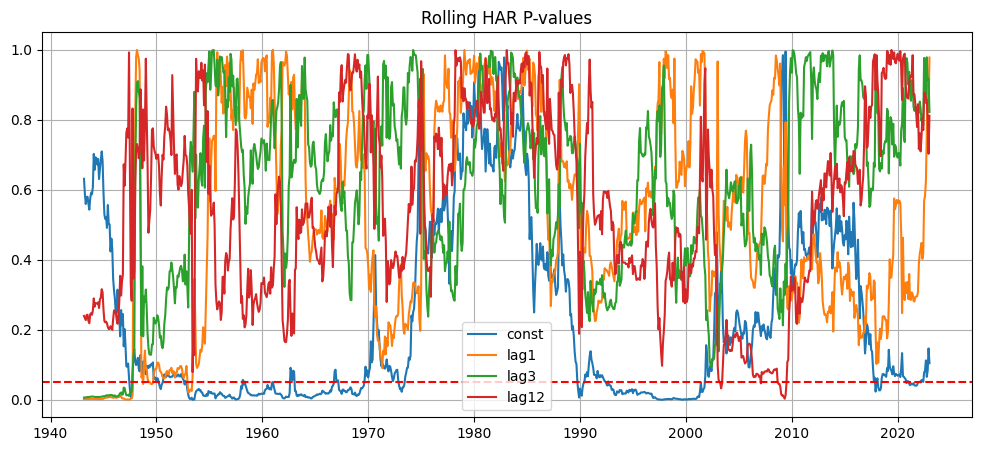

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# ============================================================
# 1. PREPARE HAR FEATURES (same as your original)
# ============================================================

df_har = df_lag.copy()

df_har["lag1"] = df_har[target_col].shift(1)
df_har["lag3"] = df_har[target_col].rolling(3).mean().shift(1)
df_har["lag12"] = df_har[target_col].rolling(12).mean().shift(1)

har_features = ["lag1", "lag3", "lag12"]

df_har = df_har.dropna().copy()

# ============================================================
# 2. ROLLING WINDOW HAR MODEL  (CORRECTED)
# ============================================================

WINDOW = 180      # choose 120 / 180 / 240

print(f"\n--- RUNNING ROLLING WINDOW HAR MODEL (window={WINDOW}) ---")

preds_har, actuals_har, dates_har = [], [], []
coef_records, pval_records = [], []

for t in range(WINDOW, len(df_har)-1):

    # -----------------------------------
    # Rolling training window
    # -----------------------------------
    train = df_har.iloc[t-WINDOW:t]

    X = train[har_features]
    y = train[target_col]

    X_const = add_constant(X)
    model = OLS(y, X_const).fit()

    # -----------------------------------
    # 1-step-ahead forecast (t+1)
    # -----------------------------------
    X_next = df_har.iloc[[t+1]][har_features]
    X_next_const = add_constant(X_next, has_constant="add")

    # ensure exact same column order:
    X_next_const = X_next_const[model.params.index]

    pred = model.predict(X_next_const)[0]

    preds_har.append(pred)
    actuals_har.append(df_har.iloc[t+1][target_col])
    dates_har.append(df_har.index[t+1])

    coef_records.append(model.params)
    pval_records.append(model.pvalues)

# ------------------------------------------------------------
# build results df
# ------------------------------------------------------------
results_har = pd.DataFrame({
    "Actual": actuals_har,
    "Predicted": preds_har,
    "Vol_Lag1": df_lag.loc[dates_har, "svar_lag1"].values
}, index=dates_har)
# OOS R²
r2_oos_har = 1 - np.mean((results_har["Actual"] - results_har["Predicted"])**2) \
               / np.var(results_har["Actual"])

mse_har = mean_squared_error(results_har["Actual"], results_har["Predicted"])
mae_har = mean_absolute_error(results_har["Actual"], results_har["Predicted"])
rmse_har = np.sqrt(mse_har)

# Portfolio weights = (1/gamma) * Pred / Vol, clipped [-1.5, 1.5]
gamma = 3
weights_har = (1/gamma) * (results_har["Predicted"] / results_har["Vol_Lag1"])
weights_har = weights_har.replace([np.inf, -np.inf], 0).clip(-1.5, 1.5)

strategy_ret_har = weights_har * results_har["Actual"]
sharpe_har = (strategy_ret_har.mean() / strategy_ret_har.std()) * np.sqrt(12)

print("\n=== Rolling HAR Results ===")
print(f"OOS R²:    {r2_oos_har:.6f}")
print(f"MSE:       {mse_har:.6f}")
print(f"MAE:       {mae_har:.6f}")
print(f"RMSE:      {rmse_har:.6f}")
print(f"Sharpe:    {sharpe_har:.6f}")
print("\n--- HAR Residual Diagnostics (Last Rolling Window) ---")

bg_stat, bg_pval, _, _ = acorr_breusch_godfrey(model, nlags=12)
print(f"Breusch–Godfrey p = {bg_pval:.4f}")
print("Breusch–Pagan skipped (no exogenous regressors).")
# --- Forecast vs Actual ---
plt.figure(figsize=(14,5))
plt.plot(results_har["Actual"], label="Actual")
plt.plot(results_har["Predicted"], label="Predicted (HAR)")
plt.title("Rolling HAR Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()

# --- Errors ---
plt.figure(figsize=(14,4))
plt.plot(results_har["Actual"] - results_har["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Rolling HAR Errors")
plt.grid(); plt.show()

# --- Scatter ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_har["Actual"], y=results_har["Predicted"])
plt.title("Rolling HAR: Predicted vs Actual")
plt.grid(); plt.show()
coef_df_har = pd.DataFrame(coef_records, index=dates_har)
pval_df_har = pd.DataFrame(pval_records, index=dates_har)

print("\n=== Last Rolling Window HAR Summary ===")
print(model.summary())

# Coefficient paths
plt.figure(figsize=(12,5))
for col in coef_df_har.columns:
    plt.plot(coef_df_har.index, coef_df_har[col], label=col)
plt.title("Rolling HAR Coefficient Paths")
plt.legend(); plt.grid(); plt.show()

# P-value paths
plt.figure(figsize=(12,5))
for col in pval_df_har.columns:
    plt.plot(pval_df_har.index, pval_df_har[col], label=col)
plt.axhline(0.05, color="red", linestyle="--")
plt.title("Rolling HAR P-values")
plt.legend(); plt.grid(); plt.show()


# ML models - model selection

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.base import clone

import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['XGBOOST_ENABLE_LOGGING'] = '0'
os.environ['XGBOOST_VERBOSE'] = '0'
os.environ['XGBOOST_DISABLE_LOGGER'] = '1'

import lightgbm as lgb

class SilentLogger:
    def info(self, msg):
        pass
    def warning(self, msg):
        pass

lgb.register_logger(SilentLogger())



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def run_rolling_ml_with_vol(df, feature_col, target_col, base_model,
                            window_size=180, vol_col="svar_lag1"):
    """
    df           : full lagged dataframe (DateTime index)
    feature_col  : list of predictor names
    target_col   : target column name ("excess_ret")
    base_model   : sklearn model (will be cloned each window)
    window_size  : rolling window length in months
    vol_col      : column used as variance proxy for portfolio weights
    """
    preds, actuals, dates, vol_for_weights = [], [], [], []

    for t in range(window_size, len(df) - 1):

        # rolling train window
        train = df.iloc[t-window_size:t]
        test_row = df.iloc[[t+1]]

        X_train = train[feature_col].values
        y_train = train[target_col].values

        X_test  = test_row[feature_col].values
        y_test  = test_row[target_col].values

        # nested scaling (no leakage)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)

        m = clone(base_model)
        m.fit(X_train_scaled, y_train)

        pred = m.predict(X_test_scaled)[0]

        preds.append(pred)
        actuals.append(y_test[0])
        dates.append(df.index[t+1])

        # use lagged svar (or other vol proxy) known at t+1
        vol_for_weights.append(df.iloc[t+1][vol_col])

    res = pd.DataFrame({
        "Actual": actuals,
        "Pred": preds,
        "Vol_Lag1": vol_for_weights
    }, index=dates)

    return res


In [ ]:
def evaluate_strategy(results_df, gamma=3.0, clip_val=1.5):
    """
    results_df must contain columns:
        - 'Actual'   : realized excess return
        - 'Pred' or 'Predicted' : model forecast
        - 'Vol_Lag1' or 'Var_Forecast': vol proxy for position sizing
    """
    # allow both column names for forecast
    if "Pred" in results_df.columns:
        pred = results_df["Pred"]
    else:
        pred = results_df["Predicted"]

    actual = results_df["Actual"]

    # use Vol_Lag1 if available, otherwise fall back to 1.0
    if "Vol_Lag1" in results_df.columns:
        vol_proxy = results_df["Vol_Lag1"]
    elif "Var_Forecast" in results_df.columns:
        vol_proxy = results_df["Var_Forecast"]
    else:
        vol_proxy = 1.0

    # -------------------------------
    # SAME WEIGHT RULE AS LINEAR MODELS
    # -------------------------------
    weights = (1.0 / gamma) * (pred / vol_proxy)
    weights = weights.clip(-clip_val, clip_val)

    strat_ret = weights * actual

    # metrics
    r2   = 1 - np.mean((actual - pred)**2) / np.var(actual)
    mse  = mean_squared_error(actual, pred)
    mae  = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mse)
    sharpe_ann = (strat_ret.mean() / strat_ret.std()) * np.sqrt(12)

    metrics = {
        "R2_OOS": r2,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "Sharpe_ann": sharpe_ann
    }

    return metrics, strat_ret


In [ ]:
models = {
    "RF": RandomForestRegressor(
        n_estimators=50,
        max_depth=5,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=0
    ),
    "XGB": xgb.XGBRegressor(
        n_estimators=80,
        max_depth=2,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=0,
        tree_method="hist"
    ),
    "LGBM": lgb.LGBMRegressor(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=15,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=0
    ),
    "KNN": KNeighborsRegressor(
        n_neighbors=5,
        weights="distance"
    ),
    "SVR_linear": SVR(
        kernel="linear",
        C=0.5,
        epsilon=0.02
    )
}


# ML with 7 screened variables

In [ ]:
window_size = 120  # 15-year rolling window

metrics_raw = {}
results_raw = {}

for name, base_model in models.items():
    print(f"Running RAW model: {name}")

    res = run_rolling_ml_with_vol(
        df=df_lag,
        feature_col=selected_predictors,   # note: feature_col, not feature_cols
        target_col=target_col,
        base_model=base_model,
        window_size=window_size,
        vol_col="svar_lag1"               # same vol proxy as linear models
    )

    results_raw[name] = res
    metrics_raw[name], _ = evaluate_strategy(res)

metrics_raw_df = pd.DataFrame(metrics_raw).T.sort_values("Sharpe_ann", ascending=False)
print("\n=== Rolling ML (RAW 7 Predictors) Metrics ===")
print(metrics_raw_df)


Running RAW model: RF
Running RAW model: XGB
Running RAW model: LGBM
Running RAW model: KNN
Running RAW model: SVR_linear

=== Rolling ML (RAW 7 Predictors) Metrics ===
              R2_OOS       MSE       MAE      RMSE  Sharpe_ann
SVR_linear -0.262358  0.002622  0.036435  0.051202    0.301733
KNN        -0.186806  0.002465  0.036426  0.049646    0.260045
RF         -0.120423  0.002327  0.035616  0.048237    0.224250
XGB        -0.267316  0.002632  0.038069  0.051302    0.089080
LGBM       -0.187135  0.002465  0.036759  0.049653    0.044075


In [ ]:
window_size = 180  # 15-year rolling window

metrics_raw = {}
results_raw = {}

for name, base_model in models.items():
    print(f"Running RAW model: {name}")

    res = run_rolling_ml_with_vol(
        df=df_lag,
        feature_col=selected_predictors,   # note: feature_col, not feature_cols
        target_col=target_col,
        base_model=base_model,
        window_size=window_size,
        vol_col="svar_lag1"               # same vol proxy as linear models
    )

    results_raw[name] = res
    metrics_raw[name], _ = evaluate_strategy(res)

metrics_raw_df = pd.DataFrame(metrics_raw).T.sort_values("Sharpe_ann", ascending=False)
print("\n=== Rolling ML (RAW 7 Predictors) Metrics ===")
print(metrics_raw_df)


Running RAW model: RF
Running RAW model: XGB
Running RAW model: LGBM
Running RAW model: KNN
Running RAW model: SVR_linear

=== Rolling ML (RAW 7 Predictors) Metrics ===
              R2_OOS       MSE       MAE      RMSE  Sharpe_ann
RF         -0.116390  0.001989  0.034224  0.044601    0.372574
SVR_linear -0.242644  0.002214  0.034583  0.047056    0.369060
KNN        -0.192151  0.002124  0.034899  0.046090    0.304163
XGB        -0.215740  0.002166  0.035726  0.046543    0.256680
LGBM       -0.205327  0.002148  0.035628  0.046344   -0.018333


In [ ]:
window_size = 240  # 15-year rolling window

metrics_raw = {}
results_raw = {}

for name, base_model in models.items():
    print(f"Running RAW model: {name}")

    res = run_rolling_ml_with_vol(
        df=df_lag,
        feature_col=selected_predictors,   # note: feature_col, not feature_cols
        target_col=target_col,
        base_model=base_model,
        window_size=window_size,
        vol_col="svar_lag1"               # same vol proxy as linear models
    )

    results_raw[name] = res
    metrics_raw[name], _ = evaluate_strategy(res)

metrics_raw_df = pd.DataFrame(metrics_raw).T.sort_values("Sharpe_ann", ascending=False)
print("\n=== Rolling ML (RAW 7 Predictors) Metrics ===")
print(metrics_raw_df)


Running RAW model: RF
Running RAW model: XGB
Running RAW model: LGBM
Running RAW model: KNN
Running RAW model: SVR_linear

=== Rolling ML (RAW 7 Predictors) Metrics ===
              R2_OOS       MSE       MAE      RMSE  Sharpe_ann
SVR_linear -0.233421  0.002195  0.034073  0.046854    0.490494
RF         -0.093907  0.001947  0.033606  0.044124    0.342005
KNN        -0.191492  0.002121  0.034821  0.046051    0.263922
XGB        -0.198787  0.002134  0.035192  0.046191    0.193995
LGBM       -0.202164  0.002140  0.035691  0.046256    0.096798


# window length = 180 is the most balanced case

# ML with pca=3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

def run_rolling_pca_ml_with_vol(df, feature_cols, target_col, base_model,
                                window_size=180, vol_col="svar_lag1",
                                n_components=3):
    preds, actuals, dates, vol_for_weights = [], [], [], []

    for t in range(window_size, len(df) - 1):

        # Rolling window
        train = df.iloc[t-window_size:t]
        test_row = df.iloc[[t+1]]

        X_train = train[feature_cols].values
        y_train = train[target_col].values

        X_test  = test_row[feature_cols].values
        y_test  = test_row[target_col].values

        # 1. Standardize (train only)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)

        # 2. PCA (train only)
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca  = pca.transform(X_test_scaled)

        # 3. Model fit
        m = clone(base_model)
        m.fit(X_train_pca, y_train)

        # 4. Forecast
        pred = m.predict(X_test_pca)[0]

        preds.append(pred)
        actuals.append(y_test[0])
        dates.append(df.index[t+1])

        # 5. vol proxy
        vol_for_weights.append(df.iloc[t+1][vol_col])

    res = pd.DataFrame({
        "Actual": actuals,
        "Pred": preds,
        "Vol_Lag1": vol_for_weights
    }, index=dates)

    return res


In [ ]:
n_components_pca = 3

metrics_pca = {}
results_pca = {}

for name, base_model in models.items():
    print(f"Running PCA model: {name}")

    res = run_rolling_pca_ml_with_vol(
        df=df_lag,
        feature_cols=selected_predictors,
        target_col=target_col,
        base_model=base_model,
        window_size=window_size,
        vol_col="svar_lag1",
        n_components=n_components_pca
    )

    results_pca[name] = res
    metrics_pca[name], _ = evaluate_strategy(res)

metrics_pca_df = pd.DataFrame(metrics_pca).T.sort_values("Sharpe_ann", ascending=False)
print("\n=== Rolling ML (PCA Inputs) Metrics ===")
print(metrics_pca_df)


Running PCA model: RF
Running PCA model: XGB
Running PCA model: LGBM
Running PCA model: KNN
Running PCA model: SVR_linear

=== Rolling ML (PCA Inputs) Metrics ===
              R2_OOS       MSE       MAE      RMSE  Sharpe_ann
SVR_linear -0.033870  0.001840  0.032632  0.042897    0.496782
RF         -0.058185  0.001883  0.033073  0.043398    0.446652
XGB        -0.130060  0.002011  0.033878  0.044848    0.384382
KNN        -0.210762  0.002155  0.035392  0.046421    0.219043
LGBM       -0.125815  0.002004  0.034343  0.044763    0.138549


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

def run_rolling_pca_ml_with_vol(df, feature_cols, target_col, base_model,
                                window_size=240, vol_col="svar_lag1",
                                n_components=3):
    preds, actuals, dates, vol_for_weights = [], [], [], []

    for t in range(window_size, len(df) - 1):

        # Rolling window
        train = df.iloc[t-window_size:t]
        test_row = df.iloc[[t+1]]

        X_train = train[feature_cols].values
        y_train = train[target_col].values

        X_test  = test_row[feature_cols].values
        y_test  = test_row[target_col].values

        # 1. Standardize (train only)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)

        # 2. PCA (train only)
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca  = pca.transform(X_test_scaled)

        # 3. Model fit
        m = clone(base_model)
        m.fit(X_train_pca, y_train)

        # 4. Forecast
        pred = m.predict(X_test_pca)[0]

        preds.append(pred)
        actuals.append(y_test[0])
        dates.append(df.index[t+1])

        # 5. vol proxy
        vol_for_weights.append(df.iloc[t+1][vol_col])

    res = pd.DataFrame({
        "Actual": actuals,
        "Pred": preds,
        "Vol_Lag1": vol_for_weights
    }, index=dates)

    return res
n_components_pca = 3

metrics_pca = {}
results_pca = {}

for name, base_model in models.items():
    print(f"Running PCA model: {name}")

    res = run_rolling_pca_ml_with_vol(
        df=df_lag,
        feature_cols=selected_predictors,
        target_col=target_col,
        base_model=base_model,
        window_size=window_size,
        vol_col="svar_lag1",
        n_components=n_components_pca
    )

    results_pca[name] = res
    metrics_pca[name], _ = evaluate_strategy(res)

metrics_pca_df = pd.DataFrame(metrics_pca).T.sort_values("Sharpe_ann", ascending=False)
print("\n=== Rolling ML (PCA Inputs) Metrics ===")
print(metrics_pca_df)


Running PCA model: RF
Running PCA model: XGB
Running PCA model: LGBM
Running PCA model: KNN
Running PCA model: SVR_linear

=== Rolling ML (PCA Inputs) Metrics ===
              R2_OOS       MSE       MAE      RMSE  Sharpe_ann
SVR_linear -0.033870  0.001840  0.032632  0.042897    0.496782
RF         -0.058185  0.001883  0.033073  0.043398    0.446652
XGB        -0.130060  0.002011  0.033878  0.044848    0.384382
KNN        -0.210762  0.002155  0.035392  0.046421    0.219043
LGBM       -0.125815  0.002004  0.034343  0.044763    0.138549


# ML with original variables

In [ ]:
# ============================================================
# 1. CREATE RAW (ALL VARIABLES) FEATURE SET — FIXED VERSION
# ============================================================

# Exclude:
# - target
# - svar_realized (look-ahead)
# - any non-lag predictor

all_predictors = [
    c for c in df_lag.columns
    if (c != target_col) and
       (c != "svar_realized") and
       (c.endswith("_lag1"))
]

print("Number of RAW predictors:", len(all_predictors))
print(all_predictors)


Number of RAW predictors: 18
['d/p_lag1', 'd/y_lag1', 'e/p_lag1', 'b/m_lag1', 'def_spread_lag1', 'term_spread_lag1', 'real_tbill_lag1', 'dy_change_lag1', 'ntis_lag1', 'svar_lag1', 'infl_lag1', 'Rfree_lag1', 'tbl_lag1', 'AAA_lag1', 'BAA_lag1', 'lty_lag1', 'ltr_lag1', 'corpr_lag1']


In [ ]:
# ============================================================
# 3. RUN RAW (ALL VARIABLES) ML MODELS — FIXED & CONSISTENT
# ============================================================

window_length = 120   # choose 120 / 180 / 240

raw_results = {}

print("\n==== Rolling ML (RAW Variables) ====\n")

for name, base_model in models.items():
    print(f"Running RAW model: {name}")

    # ---- use the correct function + correct argument names ----
    res = run_rolling_ml_with_vol(
        df=df_lag,
        feature_col=all_predictors,
        target_col=target_col,
        base_model=base_model,
        window_size=window_length,
        vol_col="svar_lag1"      # SAME vol proxy as linear models
    )

    # ---- strategy evaluation (same for ALL models) ----
    metrics, strat_ret = evaluate_strategy(res)

    raw_results[name] = {
        "forecast": res,
        "metrics": metrics,
        "strat_ret": strat_ret
    }

print("\n---- RAW ML Metrics ----")
for name, pack in raw_results.items():
    print(f"{name}: {pack['metrics']}")



==== Rolling ML (RAW Variables) ====

Running RAW model: RF
Running RAW model: XGB
Running RAW model: LGBM
Running RAW model: KNN
Running RAW model: SVR_linear

---- RAW ML Metrics ----
RF: {'R2_OOS': np.float64(-0.08643772968549923), 'MSE': 0.002256268542723692, 'MAE': 0.03515079679932969, 'RMSE': np.float64(0.04750019518616415), 'Sharpe_ann': np.float64(0.420591133006547)}
XGB: {'R2_OOS': np.float64(-0.24023432587319005), 'MSE': 0.002575666896144938, 'MAE': 0.03771920429890743, 'RMSE': np.float64(0.050751028523025404), 'Sharpe_ann': np.float64(0.2637886222980332)}
LGBM: {'R2_OOS': np.float64(-0.17047444062202355), 'MSE': 0.0024307924773581528, 'MAE': 0.036469078130749844, 'RMSE': np.float64(0.04930306762624566), 'Sharpe_ann': np.float64(0.1652190709985472)}
KNN: {'R2_OOS': np.float64(-0.17278349252279157), 'MSE': 0.0024355878199947964, 'MAE': 0.03611411243037567, 'RMSE': np.float64(0.04935167494619404), 'Sharpe_ann': np.float64(0.23576915358666112)}
SVR_linear: {'R2_OOS': np.float64

# Models run best using screened variables, and we choose SVR and Random Forest to tune

# SVR tuning

Total parameter sets in grid: 36
PCA+SVR rolling test starts at: 1991-01-31 00:00:00
Window length (months): 180

--- Running Nested Rolling PCA+SVR (Linear + RBF, 180-month window) ---


First/last few rows of PCA+SVR forecast:
              Actual  Predicted  Vol_Lag1
1991-02-28  0.066765   0.009826  0.003194
1991-03-31  0.019954   0.008046  0.002431
1991-04-30 -0.003032   0.012560  0.001375
1991-05-31  0.038230   0.013713  0.002073
1991-06-30 -0.049557   0.014016  0.001585
              Actual  Predicted  Vol_Lag1
2022-08-31 -0.042205   0.018161  0.003188
2022-09-30 -0.093395  -0.005770  0.003349
2022-10-31  0.077948   0.008082  0.004934
2022-11-30  0.051266  -0.003646  0.006504
2022-12-31 -0.062084   0.007672  0.006343

=== PCA + SVR (Linear + RBF) Nested Rolling RESULTS (180-month window) ===
R2_OOS: -0.186745
MSE: 0.002166
MAE: 0.035281
RMSE: 0.046541
Sharpe_ann: 0.470929

Most frequent best parameter choices:
{'kernel': 'linear', 'C': 0.1, 'epsilon': 0.005}                   32


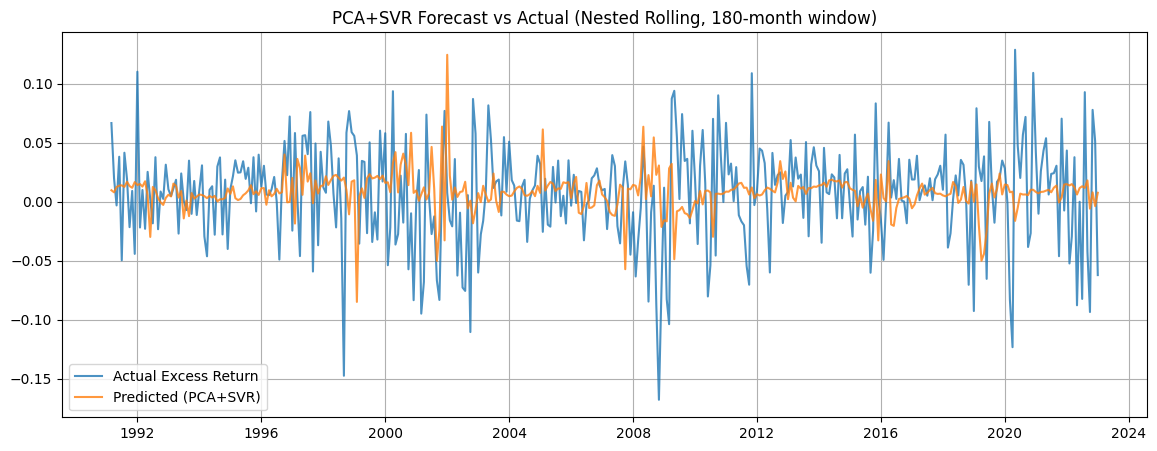

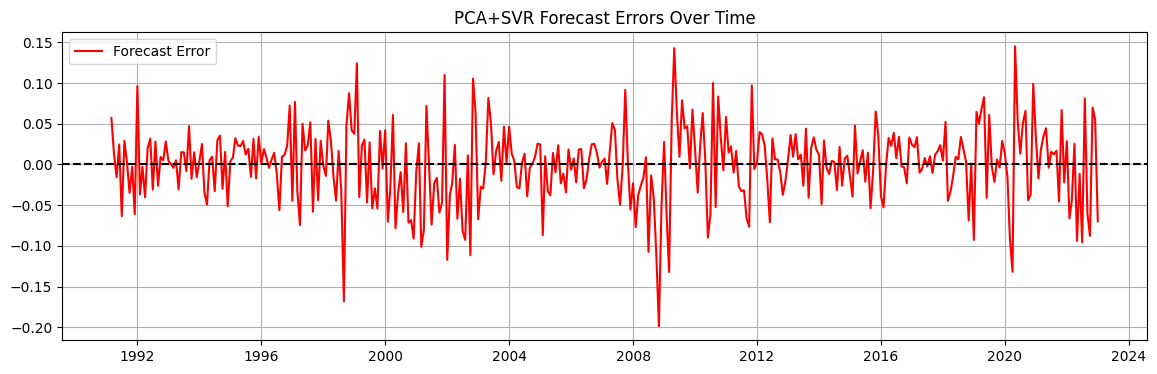

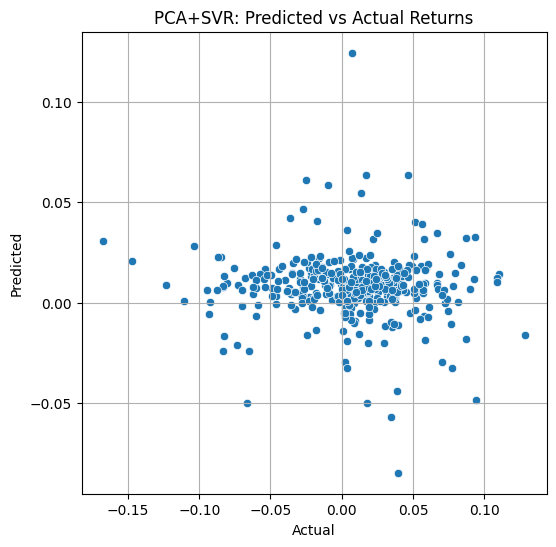

In [ ]:
# ===============================================================
# PCA + SVR (Linear + RBF) — Nested Rolling Tuning (180-month)
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Hyperparameter Grid (Option B)
# -----------------------------
param_grid = []

# Linear kernel
for C, eps in itertools.product([0.1, 0.5, 1.0, 2.0], [0.005, 0.01, 0.02]):
    param_grid.append({
        "kernel": "linear",
        "C": C,
        "epsilon": eps
    })

# RBF kernel
for C, eps, gamma in itertools.product(
        [0.1, 0.5, 1.0, 2.0],
        [0.005, 0.01, 0.02],
        ["scale", "auto"]
    ):
    param_grid.append({
        "kernel": "rbf",
        "C": C,
        "epsilon": eps,
        "gamma": gamma
    })

print(f"Total parameter sets in grid: {len(param_grid)}")  # should be 36

# -----------------------------
# 2. Rolling Setup
# -----------------------------
WINDOW = 180          # 15-year rolling window
VAL_HORIZON = 12      # last 12 months inside window for validation
n_components_pca = 3  # PCA dimensions

# ensure test starts no earlier than 1991-01-01 *and* we have enough history
first_test_date = df_lag.index[df_lag.index >= pd.Timestamp("1991-01-01")][0]
start_idx = df_lag.index.get_loc(first_test_date)

# safety: enforce at least WINDOW size
start_idx = max(start_idx, WINDOW)

print("PCA+SVR rolling test starts at:", df_lag.index[start_idx])
print("Window length (months):", WINDOW)

# -----------------------------
# 3. Main Nested Rolling Loop
# -----------------------------
pred_list = []
actual_list = []
dates_list = []
vol_list = []
best_param_list = []

print("\n--- Running Nested Rolling PCA+SVR (Linear + RBF, 180-month window) ---\n")

for t in range(start_idx, len(df_lag) - 1):

    # rolling train window: [t-WINDOW, t)
    train_slice = df_lag.iloc[t-WINDOW:t]
    X_train_raw = train_slice[selected_predictors].values
    y_train_full = train_slice[target_col].values

    # inner split: last VAL_HORIZON months as validation
    if len(train_slice) <= VAL_HORIZON + 5:
        # safety fallback: skip if too short, should not happen for WINDOW=180
        continue

    X_train_inner = X_train_raw[:-VAL_HORIZON]
    y_train_inner = y_train_full[:-VAL_HORIZON]

    X_val_inner = X_train_raw[-VAL_HORIZON:]
    y_val_inner = y_train_full[-VAL_HORIZON:]

    # ===== Transformations (Scaler + PCA) fitted on FULL training window =====
    scaler = StandardScaler().fit(X_train_raw)
    X_train_scaled_full = scaler.transform(X_train_raw)
    X_train_scaled_inner = scaler.transform(X_train_inner)
    X_val_scaled_inner = scaler.transform(X_val_inner)

    pca = PCA(n_components=n_components_pca).fit(X_train_scaled_full)
    Z_train_inner = pca.transform(X_train_scaled_inner)
    Z_val_inner = pca.transform(X_val_scaled_inner)

    # ===== Inner tuning: minimize validation MSE =====
    best_mse = np.inf
    best_params = None

    for params in param_grid:
        svr = SVR(**params)
        svr.fit(Z_train_inner, y_train_inner)
        val_pred = svr.predict(Z_val_inner)
        mse_val = mean_squared_error(y_val_inner, val_pred)

        if mse_val < best_mse:
            best_mse = mse_val
            best_params = params

    # ===== Refit best SVR on FULL WINDOW (with same PCA transform) =====
    # Reuse Z_train from full window
    Z_train_full = pca.transform(X_train_scaled_full)
    svr_best = SVR(**best_params)
    svr_best.fit(Z_train_full, y_train_full)

    # ===== Predict t+1 =====
    X_test_raw = df_lag.iloc[[t+1]][selected_predictors].values
    X_test_scaled = scaler.transform(X_test_raw)
    Z_test = pca.transform(X_test_scaled)
    y_pred = svr_best.predict(Z_test)[0]

    y_actual = df_lag.iloc[t+1][target_col]
    vol_proxy = df_lag.iloc[t+1]["svar_lag1"]

    pred_list.append(y_pred)
    actual_list.append(y_actual)
    dates_list.append(df_lag.index[t+1])
    vol_list.append(vol_proxy)
    best_param_list.append(best_params)

# -----------------------------
# 4. Build Result DataFrame
# -----------------------------
results_svr_pca = pd.DataFrame({
    "Actual": actual_list,
    "Predicted": pred_list,
    "Vol_Lag1": vol_list
}, index=dates_list)

print("\nFirst/last few rows of PCA+SVR forecast:")
print(results_svr_pca.head())
print(results_svr_pca.tail())

# -----------------------------
# 5. Strategy Evaluation (same as other models)
# -----------------------------
metrics_svr_pca, strategy_ret_svr_pca = evaluate_strategy(results_svr_pca)

print("\n=== PCA + SVR (Linear + RBF) Nested Rolling RESULTS (180-month window) ===")
for k, v in metrics_svr_pca.items():
    print(f"{k}: {v:.6f}")
print("==========================================================================")

# -----------------------------
# 6. Inspect Best Hyperparameters Over Time
# -----------------------------
best_param_str = pd.Series([str(p) for p in best_param_list], index=dates_list)
print("\nMost frequent best parameter choices:")
print(best_param_str.value_counts().head(10))

# quick check: linear vs rbf usage
kernel_series = pd.Series([p["kernel"] for p in best_param_list], index=dates_list)
print("\nKernel usage counts (linear vs rbf):")
print(kernel_series.value_counts())

# -----------------------------
# 7. Plots: Forecast vs Actual, Errors, Scatter
# -----------------------------

# Forecast vs Actual
plt.figure(figsize=(14,5))
plt.plot(results_svr_pca.index, results_svr_pca["Actual"], label="Actual Excess Return", alpha=0.8)
plt.plot(results_svr_pca.index, results_svr_pca["Predicted"], label="Predicted (PCA+SVR)", alpha=0.8)
plt.title("PCA+SVR Forecast vs Actual (Nested Rolling, 180-month window)")
plt.legend()
plt.grid()
plt.show()

# Error plot
plt.figure(figsize=(14,4))
plt.plot(results_svr_pca.index,
         results_svr_pca["Actual"] - results_svr_pca["Predicted"],
         label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("PCA+SVR Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_svr_pca["Actual"], y=results_svr_pca["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PCA+SVR: Predicted vs Actual Returns")
plt.grid()
plt.show()


Total parameter sets in grid: 36
PCA+SVR rolling test starts at: 1991-01-31 00:00:00
Window length (months): 180

--- Running Nested Rolling PCA+SVR (Linear + RBF, 180-month window) ---


First/last few rows of PCA+SVR forecast:
              Actual  Predicted  Vol_Lag1
1991-02-28  0.066765  -0.058612  0.003194
1991-03-31  0.019954  -0.002177  0.002431
1991-04-30 -0.003032   0.008856  0.001375
1991-05-31  0.038230   0.009017  0.002073
1991-06-30 -0.049557   0.016075  0.001585
              Actual  Predicted  Vol_Lag1
2022-08-31 -0.042205   0.011857  0.003188
2022-09-30 -0.093395   0.008685  0.003349
2022-10-31  0.077948  -0.007988  0.004934
2022-11-30  0.051266   0.007995  0.006504
2022-12-31 -0.062084   0.007274  0.006343

=== PCA + SVR (Linear + RBF) Nested Rolling RESULTS (180-month window) ===
R2_OOS: -0.251525
MSE: 0.002284
MAE: 0.035713
RMSE: 0.047795
Sharpe_ann: 0.537846

Most frequent best parameter choices:
{'kernel': 'linear', 'C': 2.0, 'epsilon': 0.005}                  36
{

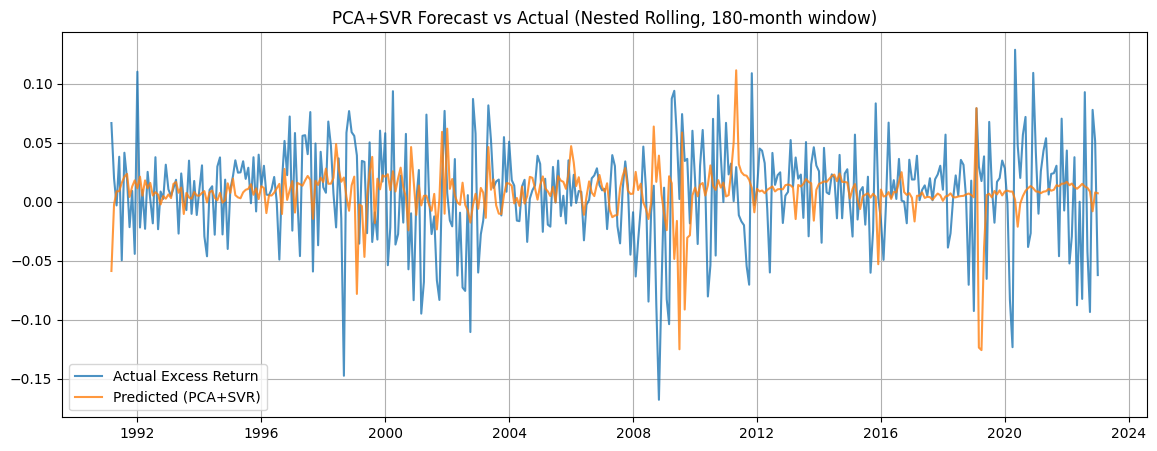

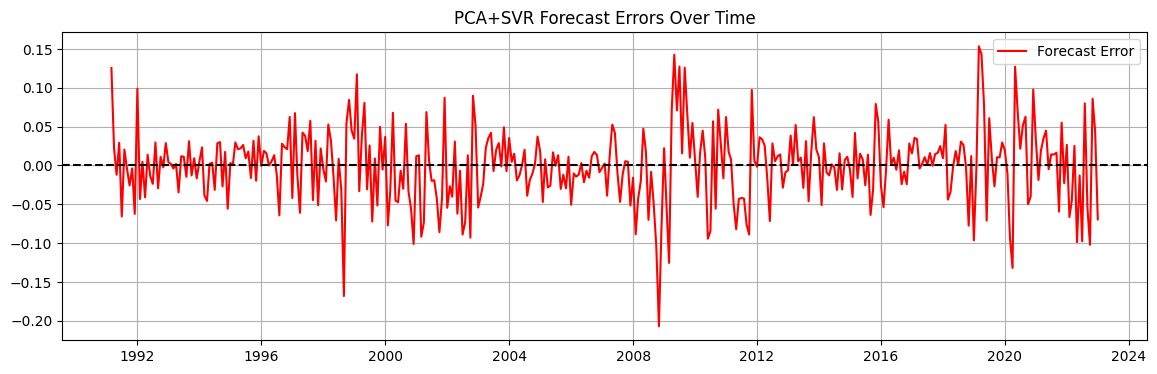

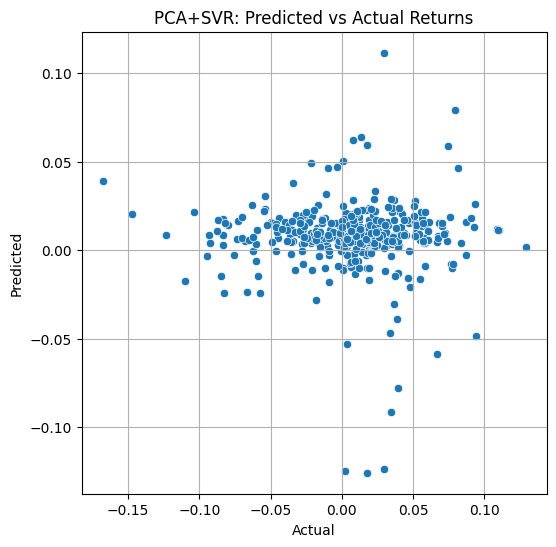

In [ ]:
# ===============================================================
# PCA + SVR (Linear + RBF) — Nested Rolling Tuning (180-month)
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Hyperparameter Grid (Option B)
# -----------------------------
param_grid = []

# Linear kernel
for C, eps in itertools.product([0.1, 0.5, 1.0, 2.0], [0.005, 0.01, 0.02]):
    param_grid.append({
        "kernel": "linear",
        "C": C,
        "epsilon": eps
    })

# RBF kernel
for C, eps, gamma in itertools.product(
        [0.1, 0.5, 1.0, 2.0],
        [0.005, 0.01, 0.02],
        ["scale", "auto"]
    ):
    param_grid.append({
        "kernel": "rbf",
        "C": C,
        "epsilon": eps,
        "gamma": gamma
    })

print(f"Total parameter sets in grid: {len(param_grid)}")  # should be 36

# -----------------------------
# 2. Rolling Setup
# -----------------------------
WINDOW = 180          # 15-year rolling window
VAL_HORIZON = 12      # last 12 months inside window for validation
n_components_pca = 4  # PCA dimensions

# ensure test starts no earlier than 1991-01-01 *and* we have enough history
first_test_date = df_lag.index[df_lag.index >= pd.Timestamp("1991-01-01")][0]
start_idx = df_lag.index.get_loc(first_test_date)

# safety: enforce at least WINDOW size
start_idx = max(start_idx, WINDOW)

print("PCA+SVR rolling test starts at:", df_lag.index[start_idx])
print("Window length (months):", WINDOW)

# -----------------------------
# 3. Main Nested Rolling Loop
# -----------------------------
pred_list = []
actual_list = []
dates_list = []
vol_list = []
best_param_list = []

print("\n--- Running Nested Rolling PCA+SVR (Linear + RBF, 180-month window) ---\n")

for t in range(start_idx, len(df_lag) - 1):

    # rolling train window: [t-WINDOW, t)
    train_slice = df_lag.iloc[t-WINDOW:t]
    X_train_raw = train_slice[selected_predictors].values
    y_train_full = train_slice[target_col].values

    # inner split: last VAL_HORIZON months as validation
    if len(train_slice) <= VAL_HORIZON + 5:
        # safety fallback: skip if too short, should not happen for WINDOW=180
        continue

    X_train_inner = X_train_raw[:-VAL_HORIZON]
    y_train_inner = y_train_full[:-VAL_HORIZON]

    X_val_inner = X_train_raw[-VAL_HORIZON:]
    y_val_inner = y_train_full[-VAL_HORIZON:]

    # ===== Transformations (Scaler + PCA) fitted on FULL training window =====
    scaler = StandardScaler().fit(X_train_raw)
    X_train_scaled_full = scaler.transform(X_train_raw)
    X_train_scaled_inner = scaler.transform(X_train_inner)
    X_val_scaled_inner = scaler.transform(X_val_inner)

    pca = PCA(n_components=n_components_pca).fit(X_train_scaled_full)
    Z_train_inner = pca.transform(X_train_scaled_inner)
    Z_val_inner = pca.transform(X_val_scaled_inner)

    # ===== Inner tuning: minimize validation MSE =====
    best_mse = np.inf
    best_params = None

    for params in param_grid:
        svr = SVR(**params)
        svr.fit(Z_train_inner, y_train_inner)
        val_pred = svr.predict(Z_val_inner)
        mse_val = mean_squared_error(y_val_inner, val_pred)

        if mse_val < best_mse:
            best_mse = mse_val
            best_params = params

    # ===== Refit best SVR on FULL WINDOW (with same PCA transform) =====
    # Reuse Z_train from full window
    Z_train_full = pca.transform(X_train_scaled_full)
    svr_best = SVR(**best_params)
    svr_best.fit(Z_train_full, y_train_full)

    # ===== Predict t+1 =====
    X_test_raw = df_lag.iloc[[t+1]][selected_predictors].values
    X_test_scaled = scaler.transform(X_test_raw)
    Z_test = pca.transform(X_test_scaled)
    y_pred = svr_best.predict(Z_test)[0]

    y_actual = df_lag.iloc[t+1][target_col]
    vol_proxy = df_lag.iloc[t+1]["svar_lag1"]

    pred_list.append(y_pred)
    actual_list.append(y_actual)
    dates_list.append(df_lag.index[t+1])
    vol_list.append(vol_proxy)
    best_param_list.append(best_params)

# -----------------------------
# 4. Build Result DataFrame
# -----------------------------
results_svr_pca = pd.DataFrame({
    "Actual": actual_list,
    "Predicted": pred_list,
    "Vol_Lag1": vol_list
}, index=dates_list)

print("\nFirst/last few rows of PCA+SVR forecast:")
print(results_svr_pca.head())
print(results_svr_pca.tail())

# -----------------------------
# 5. Strategy Evaluation (same as other models)
# -----------------------------
metrics_svr_pca, strategy_ret_svr_pca = evaluate_strategy(results_svr_pca)

print("\n=== PCA + SVR (Linear + RBF) Nested Rolling RESULTS (180-month window) ===")
for k, v in metrics_svr_pca.items():
    print(f"{k}: {v:.6f}")
print("==========================================================================")

# -----------------------------
# 6. Inspect Best Hyperparameters Over Time
# -----------------------------
best_param_str = pd.Series([str(p) for p in best_param_list], index=dates_list)
print("\nMost frequent best parameter choices:")
print(best_param_str.value_counts().head(10))

# quick check: linear vs rbf usage
kernel_series = pd.Series([p["kernel"] for p in best_param_list], index=dates_list)
print("\nKernel usage counts (linear vs rbf):")
print(kernel_series.value_counts())

# -----------------------------
# 7. Plots: Forecast vs Actual, Errors, Scatter
# -----------------------------

# Forecast vs Actual
plt.figure(figsize=(14,5))
plt.plot(results_svr_pca.index, results_svr_pca["Actual"], label="Actual Excess Return", alpha=0.8)
plt.plot(results_svr_pca.index, results_svr_pca["Predicted"], label="Predicted (PCA+SVR)", alpha=0.8)
plt.title("PCA+SVR Forecast vs Actual (Nested Rolling, 180-month window)")
plt.legend()
plt.grid()
plt.show()

# Error plot
plt.figure(figsize=(14,4))
plt.plot(results_svr_pca.index,
         results_svr_pca["Actual"] - results_svr_pca["Predicted"],
         label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("PCA+SVR Forecast Errors Over Time")
plt.legend()
plt.grid()
plt.show()

# Scatter: Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=results_svr_pca["Actual"], y=results_svr_pca["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PCA+SVR: Predicted vs Actual Returns")
plt.grid()
plt.show()


Total parameter sets in grid: 32
PCA+SVR rolling test starts at: 1991-01-31 00:00:00
Window length (months): 180

--- Running FINAL Nested Rolling PCA+SVR (Expanded Grid, 180-month) ---


First/last few rows of PCA+SVR forecast:
              Actual  Predicted  Vol_Lag1
1991-02-28  0.066765  -0.038528  0.003194
1991-03-31  0.019954   0.004929  0.002431
1991-04-30 -0.003032   0.002482  0.001375
1991-05-31  0.038230   0.008431  0.002073
1991-06-30 -0.049557   0.011560  0.001585
              Actual  Predicted  Vol_Lag1
2022-08-31 -0.042205   0.011857  0.003188
2022-09-30 -0.093395   0.008685  0.003349
2022-10-31  0.077948   0.011462  0.004934
2022-11-30  0.051266   0.007995  0.006504
2022-12-31 -0.062084   0.007126  0.006343

=== FINAL PCA + SVR (Expanded Grid) RESULTS (180-month window) ===
R2_OOS: -0.214322
MSE: 0.002216
MAE: 0.035309
RMSE: 0.047079
Sharpe_ann: 0.479262

Most frequent best parameter choices:
{'kernel': 'rbf', 'C': 0.1, 'epsilon': 0.005, 'gamma': 'scale'}    29
{'kernel

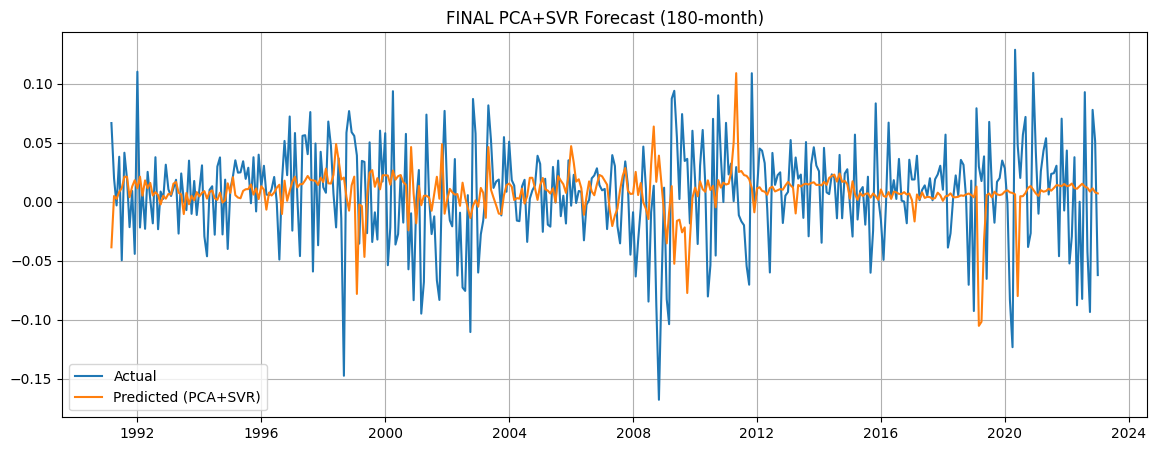

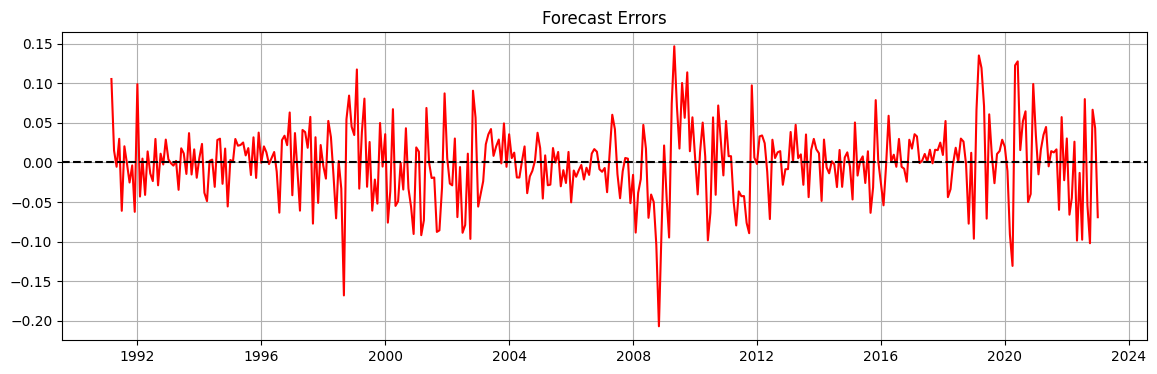

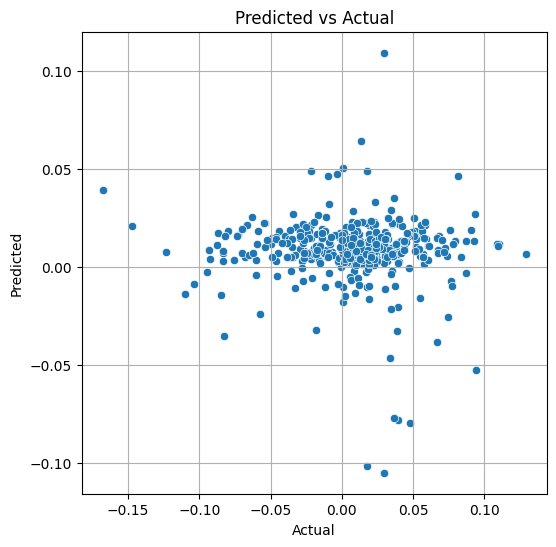

In [ ]:
# ===============================================================
# PCA + SVR (Linear + RBF) — FINAL Expanded Grid (180-month)
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. FINAL Hyperparameter Grid
# -----------------------------
param_grid = []

# ---- Linear SVR (expanded) ----
for C, eps in itertools.product(
        [0.1, 0.5, 1.0, 2.0, 3.0, 5.0],
        [0.002, 0.005, 0.01, 0.02]):
    param_grid.append({
        "kernel": "linear",
        "C": C,
        "epsilon": eps
    })

# ---- RBF SVR (carefully expanded) ----
for C, eps in itertools.product(
        [0.1, 0.5, 1.0, 2.0],
        [0.005, 0.01]):
    param_grid.append({
        "kernel": "rbf",
        "C": C,
        "epsilon": eps,
        "gamma": "scale"
    })

print(f"Total parameter sets in grid: {len(param_grid)}")  # = 32


# -----------------------------
# 2. Rolling Setup
# -----------------------------
WINDOW = 180
VAL_HORIZON = 12
n_components_pca = 4

first_test_date = df_lag.index[df_lag.index >= pd.Timestamp("1991-01-01")][0]
start_idx = df_lag.index.get_loc(first_test_date)
start_idx = max(start_idx, WINDOW)

print("PCA+SVR rolling test starts at:", df_lag.index[start_idx])
print("Window length (months):", WINDOW)


# -----------------------------
# 3. Nested Rolling Loop
# -----------------------------
pred_list = []
actual_list = []
dates_list = []
vol_list = []
best_param_list = []

print("\n--- Running FINAL Nested Rolling PCA+SVR (Expanded Grid, 180-month) ---\n")

for t in range(start_idx, len(df_lag) - 1):

    train_slice = df_lag.iloc[t-WINDOW:t]
    X_train_raw = train_slice[selected_predictors].values
    y_train_full = train_slice[target_col].values

    if len(train_slice) <= VAL_HORIZON + 5:
        continue

    X_train_inner = X_train_raw[:-VAL_HORIZON]
    y_train_inner = y_train_full[:-VAL_HORIZON]

    X_val_inner = X_train_raw[-VAL_HORIZON:]
    y_val_inner = y_train_full[-VAL_HORIZON:]

    # ===== Transformations =====
    scaler = StandardScaler().fit(X_train_raw)
    X_train_full_scaled = scaler.transform(X_train_raw)
    X_train_inner_scaled = scaler.transform(X_train_inner)
    X_val_inner_scaled = scaler.transform(X_val_inner)

    pca = PCA(n_components=n_components_pca).fit(X_train_full_scaled)
    Z_train_full = pca.transform(X_train_full_scaled)
    Z_train_inner = pca.transform(X_train_inner_scaled)
    Z_val_inner = pca.transform(X_val_inner_scaled)

    # ===== Inner tuning =====
    best_mse = np.inf
    best_params = None

    for params in param_grid:
        svr = SVR(**params)
        svr.fit(Z_train_inner, y_train_inner)
        val_pred = svr.predict(Z_val_inner)
        mse_val = mean_squared_error(y_val_inner, val_pred)

        if mse_val < best_mse:
            best_mse = mse_val
            best_params = params

    # ===== Refit on full window =====
    svr_best = SVR(**best_params)
    svr_best.fit(Z_train_full, y_train_full)

    # ===== Predict t+1 =====
    X_test_raw = df_lag.iloc[[t+1]][selected_predictors].values
    X_test_scaled = scaler.transform(X_test_raw)
    Z_test = pca.transform(X_test_scaled)
    y_pred = svr_best.predict(Z_test)[0]

    y_actual = df_lag.iloc[t+1][target_col]
    vol_proxy = df_lag.iloc[t+1]["svar_lag1"]

    pred_list.append(y_pred)
    actual_list.append(y_actual)
    dates_list.append(df_lag.index[t+1])
    vol_list.append(vol_proxy)
    best_param_list.append(best_params)


# -----------------------------
# 4. Build Result DataFrame
# -----------------------------
results_svr_pca = pd.DataFrame({
    "Actual": actual_list,
    "Predicted": pred_list,
    "Vol_Lag1": vol_list
}, index=dates_list)

print("\nFirst/last few rows of PCA+SVR forecast:")
print(results_svr_pca.head())
print(results_svr_pca.tail())


# -----------------------------
# 5. Strategy Evaluation
# -----------------------------
metrics_svr_pca, strategy_ret_svr_pca = evaluate_strategy(results_svr_pca)

print("\n=== FINAL PCA + SVR (Expanded Grid) RESULTS (180-month window) ===")
for k, v in metrics_svr_pca.items():
    print(f"{k}: {v:.6f}")
print("==================================================================")


# -----------------------------
# 6. Parameter Diagnostics
# -----------------------------
best_param_str = pd.Series([str(p) for p in best_param_list], index=dates_list)
print("\nMost frequent best parameter choices:")
print(best_param_str.value_counts().head(10))

kernel_series = pd.Series([p["kernel"] for p in best_param_list], index=dates_list)
print("\nKernel usage counts:")
print(kernel_series.value_counts())


# -----------------------------
# 7. Plots
# -----------------------------
plt.figure(figsize=(14,5))
plt.plot(results_svr_pca.index, results_svr_pca["Actual"], label="Actual")
plt.plot(results_svr_pca.index, results_svr_pca["Predicted"], label="Predicted (PCA+SVR)")
plt.legend(); plt.grid(); plt.title("FINAL PCA+SVR Forecast (180-month)")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_svr_pca.index, results_svr_pca["Actual"] - results_svr_pca["Predicted"], color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title("Forecast Errors"); plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_svr_pca["Actual"], y=results_svr_pca["Predicted"])
plt.title("Predicted vs Actual"); plt.grid(); plt.show()xq


# Random Forest tuning

In [ ]:
# ==========================================
# FAST PCA + RF Nested Rolling (10× speed)
# ==========================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# ---------------------
# Settings
# ---------------------
WINDOW = 180
VAL_HORIZON = 12
N_PCA = 4

# FAST RF parameter grid (very effective)
rf_param_grid = [
    {"max_depth": 2, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 4, "min_samples_leaf": 2},
    {"max_depth": 5, "min_samples_leaf": 2},
    {"max_depth": None, "min_samples_leaf": 1},
]

print("Fast RF grid size:", len(rf_param_grid))

# ---------------------
# Rolling start index
# ---------------------
first_test = df_lag.index[df_lag.index >= "1991-01-01"][0]
start_idx = max(df_lag.index.get_loc(first_test), WINDOW)

print("Rolling test starts at:", df_lag.index[start_idx])

# ---------------------
# Storage
# ---------------------
preds = []
actuals = []
vols = []
best_params_list = []

# ---------------------
# MAIN Nested Rolling Loop (FAST)
# ---------------------
for t in tqdm(range(start_idx, len(df_lag)-1), desc="FAST PCA+RF"):

    train_slice = df_lag.iloc[t-WINDOW:t]
    X_full = train_slice[selected_predictors].values
    y_full = train_slice[target_col].values

    # Inner split for tuning
    X_train = X_full[:-VAL_HORIZON]
    y_train = y_full[:-VAL_HORIZON]

    X_val = X_full[-VAL_HORIZON:]
    y_val = y_full[-VAL_HORIZON:]

    # ===============================
    # 1. Fit PCA on full window
    # ===============================
    scaler = StandardScaler().fit(X_full)
    X_full_scaled = scaler.transform(X_full)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    pca = PCA(n_components=N_PCA).fit(X_full_scaled)
    Z_full = pca.transform(X_full_scaled)
    Z_train = pca.transform(X_train_scaled)
    Z_val = pca.transform(X_val_scaled)

    # ===============================
    # 2. Inner-loop FAST tuning (50 trees)
    # ===============================
    best_mse = np.inf
    best_params = None

    for params in rf_param_grid:
        rf = RandomForestRegressor(
            n_estimators=50,        # FAST tuning
            max_depth=params["max_depth"],
            min_samples_leaf=params["min_samples_leaf"],
            random_state=42,
            n_jobs=-1
        )
        rf.fit(Z_train, y_train)
        pred_val = rf.predict(Z_val)
        mse = mean_squared_error(y_val, pred_val)

        if mse < best_mse:
            best_mse = mse
            best_params = params

    best_params_list.append(best_params)

    # ===============================
    # 3. Refit BEST model on full window (200 trees)
    # ===============================
    rf_final = RandomForestRegressor(
        n_estimators=200,   # strong final model
        max_depth=best_params["max_depth"],
        min_samples_leaf=best_params["min_samples_leaf"],
        random_state=42,
        n_jobs=-1
    )
    rf_final.fit(Z_full, y_full)

    # ===============================
    # 4. Predict next step
    # ===============================
    X_test = df_lag.iloc[[t+1]][selected_predictors].values
    Z_test = pca.transform(scaler.transform(X_test))
    pred = rf_final.predict(Z_test)[0]

    preds.append(pred)
    actuals.append(df_lag.iloc[t+1][target_col])
    vols.append(df_lag.iloc[t+1]["svar_lag1"])

# ---------------------
# Build result DataFrame
# ---------------------
results_rf_pca_fast = pd.DataFrame({
    "Actual": actuals,
    "Predicted": preds,
    "Vol_Lag1": vols
}, index=df_lag.index[start_idx+1: start_idx+1+len(preds)])

print(results_rf_pca_fast.head())
print(results_rf_pca_fast.tail())


Fast RF grid size: 5
Rolling test starts at: 1991-01-31 00:00:00


FAST PCA+RF: 100%|██████████| 383/383 [07:05<00:00,  1.11s/it]

              Actual  Predicted  Vol_Lag1
date                                     
1991-02-28  0.066765  -0.003533  0.003194
1991-03-31  0.019954   0.004190  0.002431
1991-04-30 -0.003032   0.004023  0.001375
1991-05-31  0.038230   0.013300  0.002073
1991-06-30 -0.049557   0.012459  0.001585
              Actual  Predicted  Vol_Lag1
date                                     
2022-08-31 -0.042205  -0.005948  0.003188
2022-09-30 -0.093395   0.005922  0.003349
2022-10-31  0.077948   0.007800  0.004934
2022-11-30  0.051266  -0.007449  0.006504
2022-12-31 -0.062084  -0.024199  0.006343



================ PCA + RF FAST RESULTS ================
R2_OOS: -0.135950
MSE: 0.001947
MAE: 0.032944
RMSE: 0.044123
Sharpe_ann: 0.227001

              Actual  Predicted  Vol_Lag1
1991-02-28  0.066765  -0.000917  0.003194
1991-03-31  0.019954   0.002793  0.002431
1991-04-30 -0.003032   0.004106  0.001375
1991-05-31  0.038230   0.013987  0.002073
1991-06-30 -0.049557   0.010990  0.001585
              Actual  Predicted  Vol_Lag1
2015-02-28  0.056976   0.010675  0.002227
2015-03-31 -0.014993   0.010098  0.000814
2015-04-30  0.009101   0.004539  0.001720
2015-05-31  0.012522   0.010908  0.000574
2015-06-30 -0.019343   0.008636  0.000887

Most frequently selected hyperparameters:
(50, 2, 'sqrt')     46
(150, 2, 'sqrt')    41
(100, 2, 'sqrt')    29
(50, 4, 'sqrt')     26
(50, 4, 0.8)        23
(50, 2, 0.8)        21
(50, 3, 'sqrt')     15
(150, 4, 0.8)       15
(100, 2, 0.8)       13
(50, 3, 0.8)        13
Name: count, dtype: int64

Counts of n_estimators:
50     144
150     86
100     63

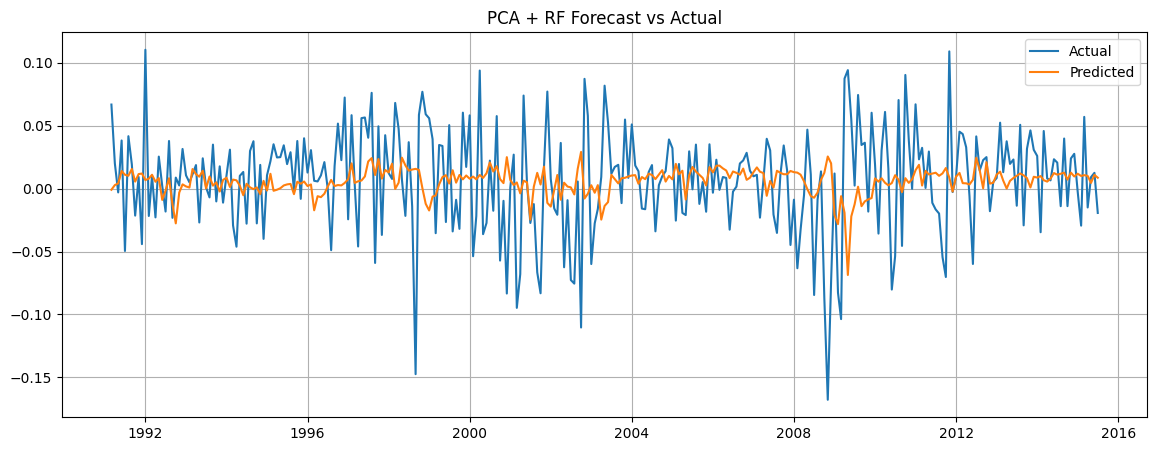

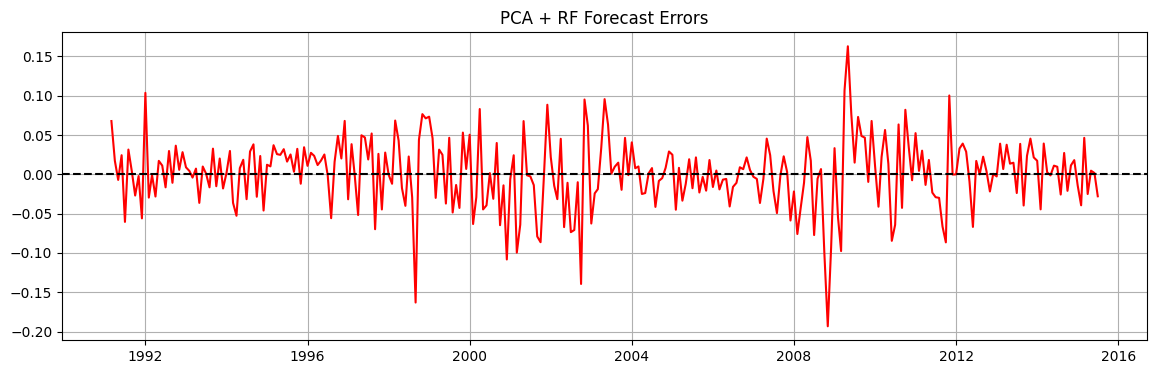

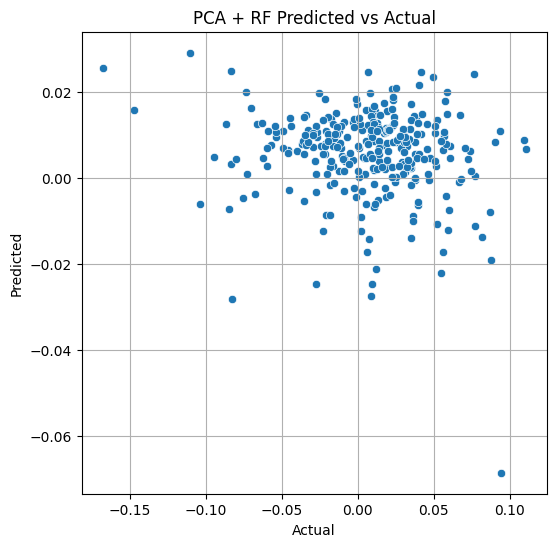

In [ ]:
# ============================================
# 5. Build Results + Evaluate (FINAL VERSION)
# ============================================

results_rf_pca = pd.DataFrame({
    "Actual": actual_list,
    "Predicted": pred_list,
    "Vol_Lag1": vol_list
}, index=dates_list)

# ---- Compute metrics using same evaluate_strategy() ----
metrics_rf_pca, strat_rf_pca = evaluate_strategy(results_rf_pca)

print("\n================ PCA + RF FAST RESULTS ================")
for k, v in metrics_rf_pca.items():
    print(f"{k}: {v:.6f}")
print("=======================================================\n")

# ---- Show first / last rows ----
print(results_rf_pca.head())
print(results_rf_pca.tail())

# ---- Hyperparameter usage summary ----
param_str = pd.Series([str(p) for p in best_param_list], index=dates_list)
print("\nMost frequently selected hyperparameters:")
print(param_str.value_counts().head(10))

# ---- Extract tuple-based RF params ----
n_estimator_series = pd.Series([p[0] for p in best_param_list], index=dates_list)
max_depth_series   = pd.Series([p[1] for p in best_param_list], index=dates_list)
max_feat_series    = pd.Series([p[2] for p in best_param_list], index=dates_list)

print("\nCounts of n_estimators:")
print(n_estimator_series.value_counts())

print("\nCounts of max_depth:")
print(max_depth_series.value_counts())

print("\nCounts of max_features:")
print(max_feat_series.value_counts())

print("\nSummary of chosen parameters:")
print(param_str.value_counts())

# ============================================
# 6. Display (Comparable to SVR / XGB / OLS)
# ============================================

print("\n================ PCA + RF FAST RESULTS ================")
for k, v in metrics_rf_pca.items():
    print(f"{k}: {v:.6f}")
print("=======================================================\n")

print("First few rows:")
print(results_rf_pca.head())

print("\nLast few rows:")
print(results_rf_pca.tail())

print("\nMost frequently selected hyperparameters:")
print(param_str.value_counts().head(10))

# ============================================
# 7. PLOTS
# ============================================

plt.figure(figsize=(14,5))
plt.plot(results_rf_pca.index, results_rf_pca["Actual"], label="Actual")
plt.plot(results_rf_pca.index, results_rf_pca["Predicted"], label="Predicted")
plt.title("PCA + RF Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_rf_pca.index,
         results_rf_pca["Actual"] - results_rf_pca["Predicted"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("PCA + RF Forecast Errors")
plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_rf_pca["Actual"], y=results_rf_pca["Predicted"])
plt.title("PCA + RF Predicted vs Actual")
plt.grid(); plt.show()


# XGBoost tuning

Total XGB parameter sets: 8
PCA+XGB rolling test starts at: 1991-01-31 00:00:00
Window length (months): 180

--- Running Nested Rolling PCA+XGB (Tiny Grid, 180-month window) ---


First / last few rows of PCA+XGB forecast:
              Actual  Predicted  Vol_Lag1
1991-02-28  0.066765  -0.006681  0.003194
1991-03-31  0.019954   0.001999  0.002431
1991-04-30 -0.003032   0.007323  0.001375
1991-05-31  0.038230   0.020175  0.002073
1991-06-30 -0.049557   0.016590  0.001585
              Actual  Predicted  Vol_Lag1
2022-08-31 -0.042205   0.009096  0.003188
2022-09-30 -0.093395   0.003056  0.003349
2022-10-31  0.077948   0.011818  0.004934
2022-11-30  0.051266   0.000555  0.006504
2022-12-31 -0.062084  -0.025415  0.006343

=== PCA + XGBoost Nested Rolling RESULTS (180-month, Tiny Grid) ===
R2_OOS: -0.266726
MSE: 0.002312
MAE: 0.036086
RMSE: 0.048084
Sharpe_ann: 0.122492

Most frequently chosen XGB hyperparameters:
{'max_depth': 2, 'n_estimators': 80, 'learning_rate': 0.05, 'subsample': 0.6,

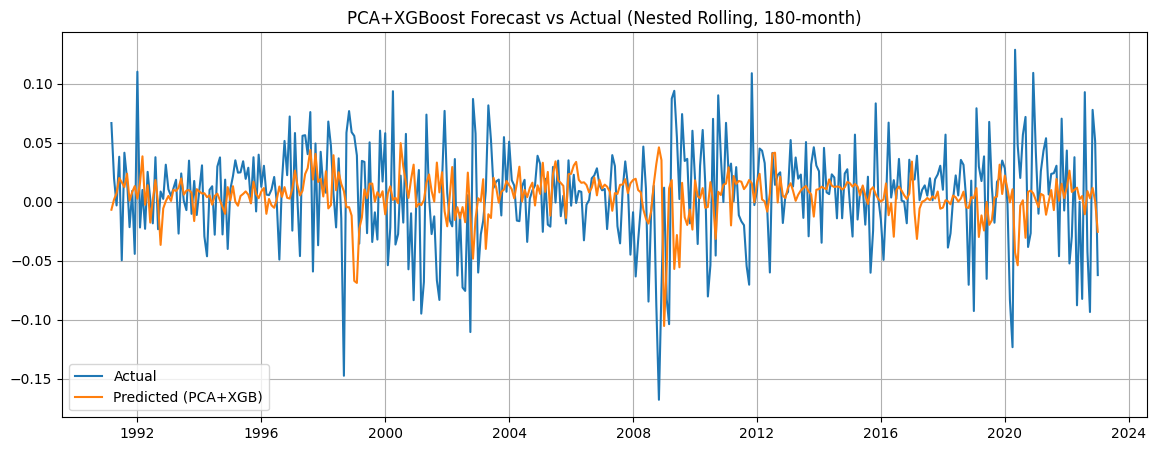

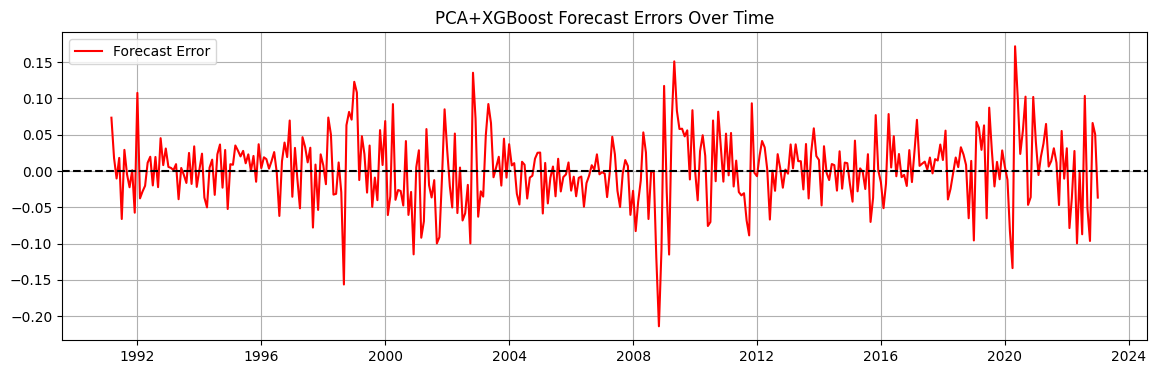

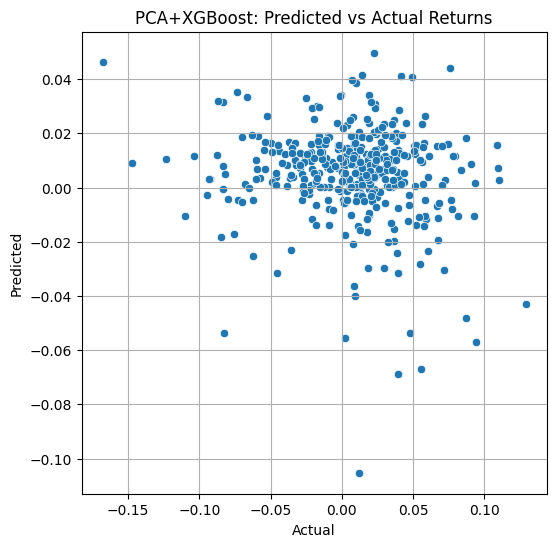

In [ ]:
# ===============================================================
# PCA + XGBoost (Tiny Grid) — Nested Rolling Tuning (180-month)
# ===============================================================
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# ASSUMPTIONS:
# - df_lag             : full monthly lagged dataframe (DateTime index)
# - selected_predictors: list of 7 screened predictors
# - target_col         : name of target column, e.g. "excess_ret"
# - evaluate_strategy  : your existing function (Actual/Pred/Vol_Lag1 → metrics)
# - df_lag contains column "svar_lag1" as variance proxy
# ---------------------------------------------------------------

# -----------------------------
# 1. Tiny Hyperparameter Grid
# -----------------------------
# Base model you used for comparison:
# n_estimators=80, max_depth=2, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8

xgb_param_grid = [
    # around your baseline, slightly varying depth and learning rate
    {"max_depth": 2, "n_estimators": 80,  "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8},
    {"max_depth": 2, "n_estimators": 120, "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8},
    {"max_depth": 3, "n_estimators": 80,  "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8},
    {"max_depth": 3, "n_estimators": 120, "learning_rate": 0.05, "subsample": 0.8, "colsample_bytree": 0.8},

    {"max_depth": 2, "n_estimators": 80,  "learning_rate": 0.10, "subsample": 0.8, "colsample_bytree": 0.8},
    {"max_depth": 2, "n_estimators": 80,  "learning_rate": 0.05, "subsample": 0.6, "colsample_bytree": 0.8},
    {"max_depth": 3, "n_estimators": 80,  "learning_rate": 0.10, "subsample": 0.8, "colsample_bytree": 0.6},
    {"max_depth": 3, "n_estimators": 120, "learning_rate": 0.10, "subsample": 0.8, "colsample_bytree": 0.8},
]

print(f"Total XGB parameter sets: {len(xgb_param_grid)}")

# -----------------------------
# 2. Rolling Setup
# -----------------------------
WINDOW       = 180   # 15-year rolling window
VAL_HORIZON  = 12    # last 12 months inside window for validation
n_pca_xgb    = 4     # PCA components (same choice as SVR/RF PCA)

# ensure test starts no earlier than 1991-01-01 and we have enough history
first_test_date = df_lag.index[df_lag.index >= pd.Timestamp("1991-01-01")][0]
start_idx = df_lag.index.get_loc(first_test_date)
start_idx = max(start_idx, WINDOW)

print("PCA+XGB rolling test starts at:", df_lag.index[start_idx])
print("Window length (months):", WINDOW)

# -----------------------------
# 3. Main Nested Rolling Loop
# -----------------------------
pred_list_xgb   = []
actual_list_xgb = []
dates_list_xgb  = []
vol_list_xgb    = []
best_param_list_xgb = []

print("\n--- Running Nested Rolling PCA+XGB (Tiny Grid, 180-month window) ---\n")

for t in range(start_idx, len(df_lag) - 1):

    # rolling window [t-WINDOW, t)
    train_slice = df_lag.iloc[t-WINDOW:t]
    X_train_raw = train_slice[selected_predictors].values
    y_train_all = train_slice[target_col].values

    # inner split: last VAL_HORIZON months = validation
    if len(train_slice) <= VAL_HORIZON + 5:
        continue

    X_train_inner = X_train_raw[:-VAL_HORIZON]
    y_train_inner = y_train_all[:-VAL_HORIZON]

    X_val_inner   = X_train_raw[-VAL_HORIZON:]
    y_val_inner   = y_train_all[-VAL_HORIZON:]

    # ===== Standardize + PCA on FULL window =====
    scaler = StandardScaler().fit(X_train_raw)
    X_train_scaled_full   = scaler.transform(X_train_raw)
    X_train_scaled_inner  = scaler.transform(X_train_inner)
    X_val_scaled_inner    = scaler.transform(X_val_inner)

    pca = PCA(n_components=n_pca_xgb).fit(X_train_scaled_full)
    Z_train_inner = pca.transform(X_train_scaled_inner)
    Z_val_inner   = pca.transform(X_val_scaled_inner)

    # ===== Inner tuning: minimize validation MSE =====
    best_mse = np.inf
    best_params = None

    for params in xgb_param_grid:
        xgb_model = xgb.XGBRegressor(
            objective="reg:squarederror",
            random_state=0,
            tree_method="hist",
            **params
        )
        xgb_model.fit(Z_train_inner, y_train_inner)
        val_pred = xgb_model.predict(Z_val_inner)
        mse_val = mean_squared_error(y_val_inner, val_pred)

        if mse_val < best_mse:
            best_mse    = mse_val
            best_params = params

    # ===== Refit best XGB on FULL window =====
    Z_train_full = pca.transform(X_train_scaled_full)

    xgb_best = xgb.XGBRegressor(
        objective="reg:squarederror",
        random_state=0,
        tree_method="hist",
        **best_params
    )
    xgb_best.fit(Z_train_full, y_train_all)

    # ===== Predict t+1 =====
    X_test_raw    = df_lag.iloc[[t+1]][selected_predictors].values
    X_test_scaled = scaler.transform(X_test_raw)
    Z_test        = pca.transform(X_test_scaled)

    y_pred = xgb_best.predict(Z_test)[0]
    y_act  = df_lag.iloc[t+1][target_col]
    vol_proxy = df_lag.iloc[t+1]["svar_lag1"]

    pred_list_xgb.append(y_pred)
    actual_list_xgb.append(y_act)
    dates_list_xgb.append(df_lag.index[t+1])
    vol_list_xgb.append(vol_proxy)
    best_param_list_xgb.append(best_params)

# -----------------------------
# 4. Build Results DataFrame
# -----------------------------
results_xgb_pca = pd.DataFrame({
    "Actual":   actual_list_xgb,
    "Predicted": pred_list_xgb,
    "Vol_Lag1": vol_list_xgb
}, index=dates_list_xgb)

print("\nFirst / last few rows of PCA+XGB forecast:")
print(results_xgb_pca.head())
print(results_xgb_pca.tail())

# -----------------------------
# 5. Strategy Evaluation
# -----------------------------
metrics_xgb_pca, strat_ret_xgb_pca = evaluate_strategy(results_xgb_pca)

print("\n=== PCA + XGBoost Nested Rolling RESULTS (180-month, Tiny Grid) ===")
for k, v in metrics_xgb_pca.items():
    print(f"{k}: {v:.6f}")
print("====================================================================")

# -----------------------------
# 6. Inspect hyperparameter usage
# -----------------------------
param_str_xgb = pd.Series([str(p) for p in best_param_list_xgb], index=dates_list_xgb)
print("\nMost frequently chosen XGB hyperparameters:")
print(param_str_xgb.value_counts().head(10))

# Optional: separate distributions
max_depth_series = pd.Series([p["max_depth"] for p in best_param_list_xgb], index=dates_list_xgb)
n_estim_series   = pd.Series([p["n_estimators"] for p in best_param_list_xgb], index=dates_list_xgb)
lr_series        = pd.Series([p["learning_rate"] for p in best_param_list_xgb], index=dates_list_xgb)

print("\nCounts of max_depth:")
print(max_depth_series.value_counts())

print("\nCounts of n_estimators:")
print(n_estim_series.value_counts())

print("\nCounts of learning_rate:")
print(lr_series.value_counts())

# -----------------------------
# 7. Plots: Forecast vs Actual, Errors, Scatter
# -----------------------------
plt.figure(figsize=(14,5))
plt.plot(results_xgb_pca.index, results_xgb_pca["Actual"], label="Actual")
plt.plot(results_xgb_pca.index, results_xgb_pca["Predicted"], label="Predicted (PCA+XGB)")
plt.title("PCA+XGBoost Forecast vs Actual (Nested Rolling, 180-month)")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(14,4))
plt.plot(results_xgb_pca.index,
         results_xgb_pca["Actual"] - results_xgb_pca["Predicted"],
         label="Forecast Error", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("PCA+XGBoost Forecast Errors Over Time")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=results_xgb_pca["Actual"], y=results_xgb_pca["Predicted"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PCA+XGBoost: Predicted vs Actual Returns")
plt.grid(); plt.show()
